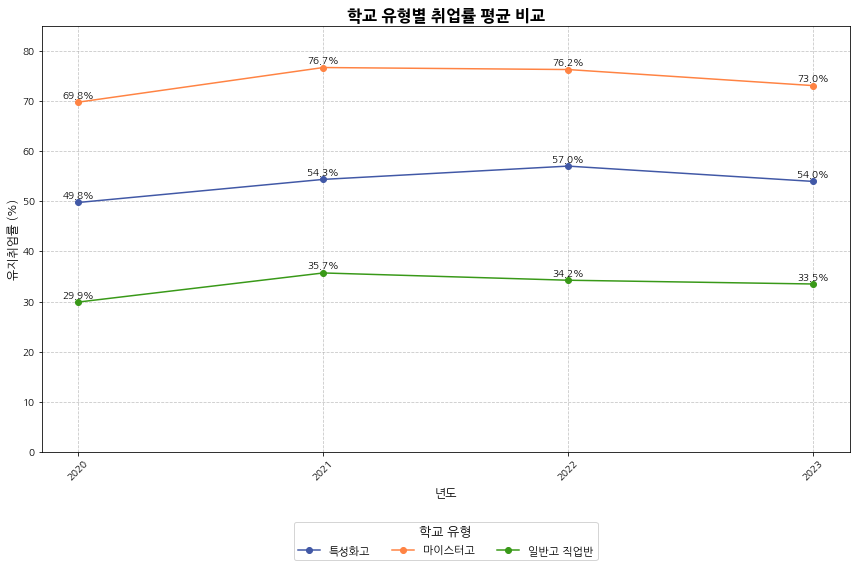

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 데이터 생성
data = {
    '학교유형': ['특성화고', '마이스터고', '일반고 직업반'],
    '2020_1차 유지취업률 (%)': [49.2, 70.5, 30.3],
    '2020_2차 유지취업률 (%)': [50.3, 69.0, 29.5],
    '2021_1차 유지취업률 (%)': [53.4, 74.6, 35.7],
    '2021_2차 유지취업률 (%)': [55.3, 78.7, 35.7],
    '2022_1차 유지취업률 (%)': [56.0, 75.5, 36.5],
    '2022_2차 유지취업률 (%)': [58.0, 77.0, 32.0],
    '2023_1차 유지취업률 (%)': [53.3, 73.6, 37.0],
    '2023_2차 유지취업률 (%)': [54.6, 72.5, 30.0]
}

df = pd.DataFrame(data)
df.set_index('학교유형', inplace=True)

# 년도별로 1차 및 2차 유지취업률의 평균 계산
df_avg = df.groupby(df.columns.str[:4], axis=1).mean()

# 라인 차트 시각화
plt.figure(figsize=(12, 8))

# 색상 정의
colors = {
    '특성화고': '#4158A6',    # 파란색
    '마이스터고': '#FF8343',  # 주황색
    '일반고 직업반': '#399918' # 초록색
}

# 라인 차트 그리기 및 퍼센트 값 주석 추가
for school_type in df.index:
    plt.plot(df_avg.columns, df_avg.loc[school_type], marker='o', color=colors[school_type], label=school_type)
    
    # 각 점에 퍼센트 값을 주석으로 추가
    for x, y in zip(df_avg.columns, df_avg.loc[school_type]):
        plt.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0,5), ha='center')

# 그래프 설정
plt.title('학교 유형별 취업률 평균 비교', fontsize=16, fontweight='bold')
plt.xlabel('년도', fontsize=12)
plt.ylabel('유지취업률 (%)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 85)  # y축 범위를 0에서 85로 설정
plt.grid(True, linestyle='--', alpha=0.7)

# 범례 위치를 아래로 이동
plt.legend(title='학교 유형', title_fontsize='13', fontsize='11', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()

# 현재의 figure를 파일로 저장
plt.savefig('유지취업률_년도별_학교유형별_비교_라인_차트.png', dpi=300, bbox_inches='tight')
plt.show()


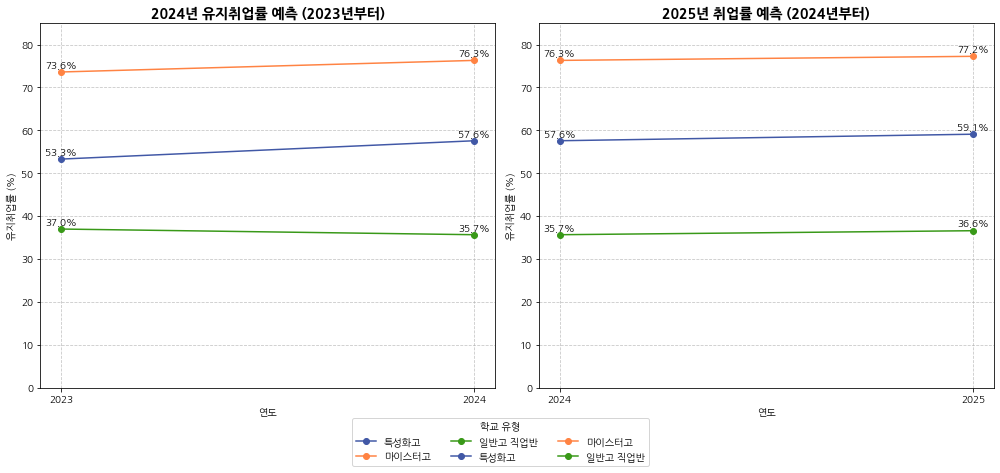

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 생성
data = {
    '학교유형': ['특성화고', '마이스터고', '일반고 직업반'],
    '2020_1차 유지취업률 (%)': [49.2, 70.5, 30.3],
    '2020_2차 유지취업률 (%)': [50.3, 69.0, 29.5],
    '2021_1차 유지취업률 (%)': [53.4, 74.6, 35.7],
    '2021_2차 유지취업률 (%)': [55.3, 78.7, 35.7],
    '2022_1차 유지취업률 (%)': [56.0, 75.5, 36.5],
    '2022_2차 유지취업률 (%)': [58.0, 77.0, 32.0],
    '2023_1차 유지취업률 (%)': [53.3, 73.6, 37.0],
    '2023_2차 유지취업률 (%)': [54.6, 72.5, 30.0]
}

df = pd.DataFrame(data)
df.set_index('학교유형', inplace=True)

# 색상 정의 (색상 변경을 쉽게 하기 위해 변수로 정의)
colors = {
    '특성화고': '#4158A6',  
    '마이스터고': '#FF8343',  
    '일반고 직업반': '#399918' 
}

# 데이터 시각화 (선 그래프)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 예측 데이터 생성
years = np.array([2020, 2021, 2022, 2023]).reshape(-1, 1)
predict_years = np.array([2024, 2025]).reshape(-1, 1)

# 예측할 열 목록
columns = ['1차 유지취업률 (%)', '2차 유지취업률 (%)']

# 예측값 저장을 위한 DataFrame 생성
predicted_df = pd.DataFrame(index=df.index, columns=[f'2024_{column}' for column in columns] + [f'2025_{column}' for column in columns])

# 선형 회귀 모델을 통한 예측
for column in columns:
    y = df.filter(like=column).values.T  # Transpose to match the shape for fitting
    
    model = LinearRegression()
    model.fit(years, y)
    
    future_years = np.concatenate((years, predict_years), axis=0)
    predicted = model.predict(future_years)
    
    predicted_df[f'2024_{column}'] = predicted[4]
    predicted_df[f'2025_{column}'] = predicted[5]

# 1차와 2차 유지취업률의 평균값을 계산
predicted_df['2024_평균 유지취업률 (%)'] = predicted_df[['2024_1차 유지취업률 (%)', '2024_2차 유지취업률 (%)']].mean(axis=1)
predicted_df['2025_평균 유지취업률 (%)'] = predicted_df[['2025_1차 유지취업률 (%)', '2025_2차 유지취업률 (%)']].mean(axis=1)

# 데이터 준비
school_types = df.index

# 그래프 생성
for i, school_type in enumerate(school_types):
    # 2023년부터 2024년까지의 데이터
    years_to_plot_2024 = [2023, 2024]
    y_values_2024 = [
        df.loc[school_type, '2023_1차 유지취업률 (%)'], 
        predicted_df.loc[school_type, '2024_평균 유지취업률 (%)']
    ]
    # 레이블 추가
    axs[0].plot(years_to_plot_2024, y_values_2024, marker='o', label=school_type, color=colors[school_type])
    
    # 각 꼭짓점에 퍼센트 표시
    for year, y_value in zip(years_to_plot_2024, y_values_2024):
        axs[0].annotate(f'{y_value:.1f}%', (year, y_value), textcoords="offset points", xytext=(0,5), ha='center')

    # 2024년부터 2025년까지의 데이터
    years_to_plot_2025 = [2024, 2025]
    y_values_2025 = [
        predicted_df.loc[school_type, '2024_평균 유지취업률 (%)'], 
        predicted_df.loc[school_type, '2025_평균 유지취업률 (%)']
    ]
    # 레이블 추가
    axs[1].plot(years_to_plot_2025, y_values_2025, marker='o', label=school_type, color=colors[school_type])

    # 각 꼭짓점에 퍼센트 표시
    for year, y_value in zip(years_to_plot_2025, y_values_2025):
        axs[1].annotate(f'{y_value:.1f}%', (year, y_value), textcoords="offset points", xytext=(0,5), ha='center')

# 2024년 유지취업률
axs[0].set_title('2024년 유지취업률 예측 (2023년부터)', fontsize=14, fontweight='bold')
axs[0].set_xlabel('연도', fontsize=10)
axs[0].set_ylabel('유지취업률 (%)', fontsize=10)
axs[0].set_xticks([2023, 2024])
axs[0].set_xticklabels([2023, 2024])
axs[0].set_ylim(0, 85)  # y축 범위를 85까지 설정
axs[0].grid(axis='both', linestyle='--', alpha=0.7)
#axs[0].set_yscale('log')
# 2025년 유지취업률
axs[1].set_title('2025년 취업률 예측 (2024년부터)', fontsize=14, fontweight='bold')
axs[1].set_xlabel('연도', fontsize=10)
axs[1].set_ylabel('유지취업률 (%)', fontsize=10)
axs[1].set_xticks([2024, 2025])
axs[1].set_xticklabels([2024, 2025])
axs[1].set_ylim(0, 85)  # y축 범위를 85까지 설정
axs[1].grid(axis='both', linestyle='--', alpha=0.7)
# 눈금선 추가
axs[1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# 범례를 아래쪽으로 이동
fig.legend(title='학교 유형', loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.tight_layout()

# 현재의 figure를 파일로 저장
plt.savefig('유지취업률_2024_2025_예측_평균_선_그래프.png', dpi=300, bbox_inches='tight')
plt.show()


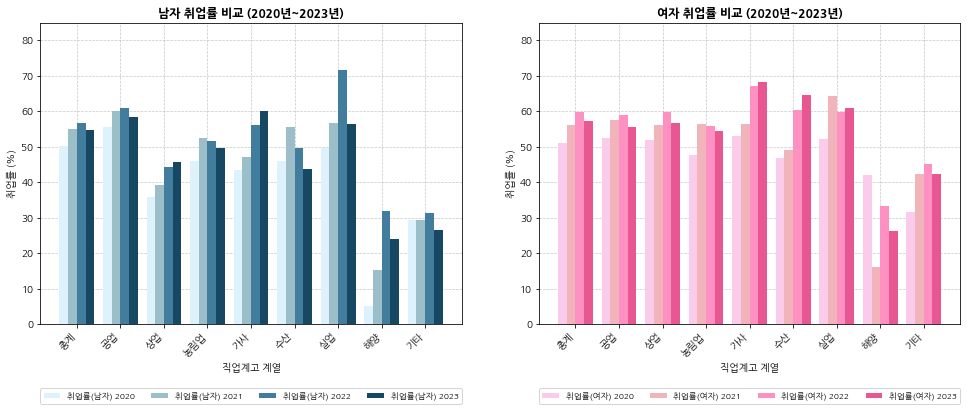

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2020년부터 2023년까지의 데이터 준비
data_2020 = {
    '직업계고 계열별(1)': ['총계', '공업', '상업', '농림업', '가사', '수산', '실업', '해양', '기타'],
    '2020.2': [50.7, 55.1, 47.6, 46.6, 50.0, 46.0, 51.1, 8.0, 30.4],  # 취업률(소계)
    '2020.3': [50.3, 55.5, 35.7, 46.0, 43.4, 45.9, 49.6, 5.2, 29.3],  # 취업률(남자)
    '2020.4': [51.2, 52.6, 51.9, 47.6, 53.1, 46.8, 52.2, 42.1, 31.6],  # 취업률(여자)
}

df_2020 = pd.DataFrame(data_2020)
df_2020.columns = ['직업계고 계열', '취업률(소계) 2020', '취업률(남자) 2020', '취업률(여자) 2020']

data_2021 = {
    '직업계고 계열별(1)': ['총계', '공업', '상업', '농림업', '가사', '수산', '실업', '해양', '기타'],
    '2021.4': [55.4, 59.8, 51.7, 53.9, 53.2, 54.4, 61.5, 15.2, 35.2],  # 취업률(소계)
    '2021.5': [54.9, 60.1, 39.3, 52.6, 47.1, 55.5, 56.6, 15.1, 29.4],  # 취업률(남자)
    '2021.6': [56.1, 57.6, 56.2, 56.3, 56.5, 49.0, 64.2, 16.0, 42.3],  # 취업률(여자)
}

df_2021 = pd.DataFrame(data_2021)
df_2021.columns = ['직업계고 계열', '취업률(소계) 2021', '취업률(남자) 2021', '취업률(여자) 2021']

data_2022 = {
    '직업계고 계열별(1)': ['총계', '공업', '상업', '농림업', '가사', '수산', '실업', '해양', '기타'],
    '취업률(소계)': [57.8, 60.6, 55.6, 53.2, 63.4, 51.3, 64.4, 32.0, 37.6],
    '취업률(남자)': [56.6, 60.8, 44.3, 51.5, 56.1, 49.6, 71.6, 31.9, 31.3],
    '취업률(여자)': [59.7, 59.1, 59.7, 55.9, 67.0, 60.4, 59.8, 33.3, 45.2],
}

df_2022 = pd.DataFrame(data_2022)
df_2022.columns = ['직업계고 계열', '취업률(소계) 2022', '취업률(남자) 2022', '취업률(여자) 2022']

data_2023 = {
    '직업계고 계열별(1)': ['총계', '공업', '상업', '농림업', '가사', '수산', '실업', '해양', '기타'],
    '2023.4': [55.7, 58.0, 53.6, 51.6, 65.3, 46.3, 58.8, 24.3, 33.0],  # 취업률(소계)
    '2023.5': [54.6, 58.5, 45.6, 49.7, 60.0, 43.6, 56.3, 24.1, 26.6],  # 취업률(남자)
    '2023.6': [57.3, 55.5, 56.8, 54.5, 68.2, 64.7, 60.8, 26.1, 42.4],  # 취업률(여자)
}

df_2023 = pd.DataFrame(data_2023)
df_2023.columns = ['직업계고 계열', '취업률(소계) 2023', '취업률(남자) 2023', '취업률(여자) 2023']

# 데이터 통합
df_merged = pd.merge(df_2020, df_2021, on='직업계고 계열')
df_merged = pd.merge(df_merged, df_2022, on='직업계고 계열')
df_merged = pd.merge(df_merged, df_2023, on='직업계고 계열')

# 시각화
plt.figure(figsize=(14, 10))  # 그래프 크기 조정

# 색상 정의
colors = {
    '남자': {
        '2020': '#DDF2FD',  # 연한 파란색
        '2021': '#9BBEC8',  # 연한 청록색
        '2022': '#427D9D',  # 중간 파란색
        '2023': '#164863'   # 어두운 파란색
    },
    '여자': {
        '2020': '#FACBEA',  # 연한 복숭아색
        '2021': '#F1B4BB',  # 연한 분홍색
        '2022': '#FF90C2',  # 중간 핑크색
        '2023': '#E95793'   # 어두운 핑크색
    }
}

# 막대 그래프 스타일 정의
def plot_bar(ax, df, column_prefix, title, ylim):
    bar_width = 0.2  # 막대 폭 조정
    index = np.arange(len(df['직업계고 계열']))
    
    for i, year in enumerate(['2020', '2021', '2022', '2023']):
        col_name = f'{column_prefix} {year}'
        bars = ax.bar(index + i * bar_width, df[col_name], bar_width, label=f'{column_prefix} {year}', color=colors['남자' if '남자' in column_prefix else '여자'][year], zorder=3)
        
    ax.set_xlabel('직업계고 계열')
    ax.set_ylabel('취업률 (%)')
    ax.set_title(title, fontweight='bold')  # 제목을 굵게 설정
    ax.set_xticks(index + bar_width * 1.5)  # 마지막 막대 위치에 맞게 설정
    ax.set_xticklabels(df['직업계고 계열'], rotation=45, ha='right')
    ax.set_ylim(0, ylim)  # Y축 상한값을 ylim으로 설정
    
    # 범례를 가운데 위치로 조정
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize='small')
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7, zorder=1)  # zorder 추가

# 남자 취업률 비교
plt.subplot(2, 2, 1)
plot_bar(plt.gca(), df_merged, '취업률(남자)', '남자 취업률 비교 (2020년~2023년)', 85)

# 여자 취업률 비교
plt.subplot(2, 2, 2)
plot_bar(plt.gca(), df_merged, '취업률(여자)', '여자 취업률 비교 (2020년~2023년)', 85)

plt.tight_layout()
plt.show()


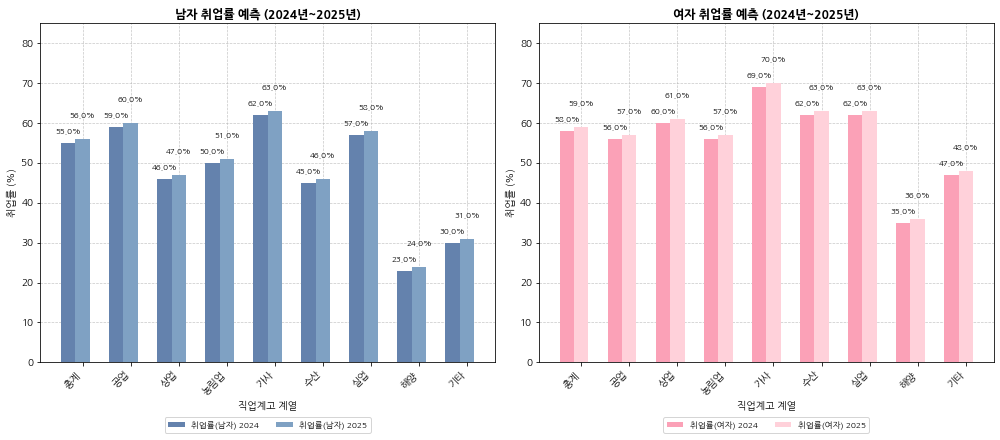

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
data_2020 = {
    '직업계고 계열별(1)': ['총계', '공업', '상업', '농림업', '가사', '수산', '실업', '해양', '기타'],
    '2020.2': [50.7, 55.1, 47.6, 46.6, 50.0, 46.0, 51.1, 8.0, 30.4],  
    '2020.3': [50.3, 55.5, 35.7, 46.0, 43.4, 45.9, 49.6, 5.2, 29.3],  
    '2020.4': [51.2, 52.6, 51.9, 47.6, 53.1, 46.8, 52.2, 42.1, 31.6],  
}

df_2020 = pd.DataFrame(data_2020)
df_2020.columns = ['직업계고 계열', '취업률(소계) 2020', '취업률(남자) 2020', '취업률(여자) 2020']

data_2021 = {
    '직업계고 계열별(1)': ['총계', '공업', '상업', '농림업', '가사', '수산', '실업', '해양', '기타'],
    '2021.4': [55.4, 59.8, 51.7, 53.9, 53.2, 54.4, 61.5, 15.2, 35.2],  
    '2021.5': [54.9, 60.1, 39.3, 52.6, 47.1, 55.5, 56.6, 15.1, 29.4],  
    '2021.6': [56.1, 57.6, 56.2, 56.3, 56.5, 49.0, 64.2, 16.0, 42.3],  
}

df_2021 = pd.DataFrame(data_2021)
df_2021.columns = ['직업계고 계열', '취업률(소계) 2021', '취업률(남자) 2021', '취업률(여자) 2021']

data_2022 = {
    '직업계고 계열별(1)': ['총계', '공업', '상업', '농림업', '가사', '수산', '실업', '해양', '기타'],
    '취업률(소계)': [57.8, 60.6, 55.6, 53.2, 63.4, 51.3, 64.4, 32.0, 37.6],
    '취업률(남자)': [56.6, 60.8, 44.3, 51.5, 56.1, 49.6, 71.6, 31.9, 31.3],
    '취업률(여자)': [59.7, 59.1, 59.7, 55.9, 67.0, 60.4, 59.8, 33.3, 45.2],
}

df_2022 = pd.DataFrame(data_2022)
df_2022.columns = ['직업계고 계열', '취업률(소계) 2022', '취업률(남자) 2022', '취업률(여자) 2022']

data_2023 = {
    '직업계고 계열별(1)': ['총계', '공업', '상업', '농림업', '가사', '수산', '실업', '해양', '기타'],
    '2023.4': [55.7, 58.0, 53.6, 51.6, 65.3, 46.3, 58.8, 24.3, 33.0],  
    '2023.5': [54.6, 58.5, 45.6, 49.7, 60.0, 43.6, 56.3, 24.1, 26.6],  
    '2023.6': [57.3, 55.5, 56.8, 54.5, 68.2, 64.7, 60.8, 26.1, 42.4],  
}

df_2023 = pd.DataFrame(data_2023)
df_2023.columns = ['직업계고 계열', '취업률(소계) 2023', '취업률(남자) 2023', '취업률(여자) 2023']

df_merged = pd.merge(df_2020, df_2021, on='직업계고 계열')
df_merged = pd.merge(df_merged, df_2022, on='직업계고 계열')
df_merged = pd.merge(df_merged, df_2023, on='직업계고 계열')

forecast_data = {
    '직업계고 계열': ['총계', '공업', '상업', '농림업', '가사', '수산', '실업', '해양', '기타'],
    '취업률(남자) 2024': [55.0, 59.0, 46.0, 50.0, 62.0, 45.0, 57.0, 23.0, 30.0],
    '취업률(남자) 2025': [56.0, 60.0, 47.0, 51.0, 63.0, 46.0, 58.0, 24.0, 31.0],
    '취업률(여자) 2024': [58.0, 56.0, 60.0, 56.0, 69.0, 62.0, 62.0, 35.0, 47.0],
    '취업률(여자) 2025': [59.0, 57.0, 61.0, 57.0, 70.0, 63.0, 63.0, 36.0, 48.0],
}

df_forecast = pd.DataFrame(forecast_data)

plt.figure(figsize=(14, 7))  

colors = {
    '남자': {
        '2024': '#6482AD',  
        '2025': '#7FA1C3'   
    },
    '여자': {
        '2024': '#FBA1B7',  
        '2025': '#FFD1DA'
    }
}

def plot_bar(ax, df, column_prefix, title, ylim, label_positions):
    bar_width = 0.3  
    index = np.arange(len(df['직업계고 계열']))
    
    for i, year in enumerate(['2024', '2025']):
        col_name = f'{column_prefix} {year}'
        bars = ax.bar(index + i * bar_width, df[col_name], bar_width, label=f'{column_prefix} {year}', color=colors['남자' if '남자' in column_prefix else '여자'][year], zorder=3)
        
        # 라벨 위치 조정
        label_position = label_positions[year]
        
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + label_position, f'{yval:.1f}%', ha='center', va='bottom', fontsize=8, color='black', zorder=4)
        
    ax.set_xlabel('직업계고 계열')
    ax.set_ylabel('취업률 (%)')
    ax.set_title(title, fontweight='bold')  
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(df['직업계고 계열'], rotation=45, ha='right')
    ax.set_ylim(0, ylim)  
    ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7, zorder=1)  

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize='small')

# 남자 취업률 예측
ax1 = plt.subplot(1, 2, 1)
plot_bar(ax1, df_forecast, '취업률(남자)', '남자 취업률 예측 (2024년~2025년)', 85, {'2024': 2, '2025': 5})

# 여자 취업률 예측
ax2 = plt.subplot(1, 2, 2)
plot_bar(ax2, df_forecast, '취업률(여자)', '여자 취업률 예측 (2024년~2025년)', 85, {'2024': 2, '2025': 5})

plt.tight_layout(rect=[0, 0, 1, 0.9])  

plt.show()


In [6]:
import pandas as pd

xlsx = '2022년 학과별 고등교육기관 취업통계_20240112.xlsx' 

df22 = pd.read_excel(xlsx, header=4)


df22 = df22.reset_index(drop=True)


In [7]:
import pandas as pd

xlsx = '2021년 학과별 고등교육기관 취업통계.xlsx' 

df21 = pd.read_excel(xlsx, header=4)


df21 = df21.reset_index(drop=True)



In [8]:
import pandas as pd

xlsx = '2020년 학과별 고등교육기관 취업통계.xlsx' 

df20 = pd.read_excel(xlsx, header=4)


df20 = df20.reset_index(drop=True)



In [9]:
import pandas as pd

xlsx = '2019년 학과별 고등교육기관 취업통계.xlsx' 

df19 = pd.read_excel(xlsx, header=4)


df19 = df19.reset_index(drop=True)


In [10]:
import pandas as pd

xlsx = '2018년 학과별 고등교육기관 졸업자 취업통계.xlsx' 

df18 = pd.read_excel(xlsx, header=4)


df18 = df18.reset_index(drop=True)

In [11]:
import pandas as pd

xlsx = '2017년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df17 = pd.read_excel(xlsx, header=4)


df17 = df17.reset_index(drop=True)


In [12]:
import pandas as pd

xlsx = '2016년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df16 = pd.read_excel(xlsx, header=4)


df16 = df16.reset_index(drop=True)


In [13]:
import pandas as pd

xlsx = '2015년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df15 = pd.read_excel(xlsx, header=4)


df15 = df15.reset_index(drop=True)

In [14]:
import pandas as pd

xlsx = '2014년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df14 = pd.read_excel(xlsx, header=4)


df14 = df14.reset_index(drop=True)

In [15]:
import pandas as pd

xlsx = '2013년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df13 = pd.read_excel(xlsx, header=4)

df13 = df13.reset_index(drop=True)

In [16]:
# 졸업자 수가 100명 이상이면서 일반 대학인 데이터만 따로 뽑아내기 ( 왜냐면 졸업자수가 적으면 취업률이 100프로만 나와서 )


ill_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교')]

ill_df22['학과명']


1861     국어국문학과
1862    국어국문학전공
1863      문예창작과
1864     문예창작학과
1866     한국어문학과
         ...   
5881       성악전공
5888        작곡과
5896      교회음악과
5900      실용음악과
5902     실용음악학과
Name: 학과명, Length: 551, dtype: object

In [17]:
# 취업률을 내림차순으로 sort한 후에, 5개만 따로 출력. 

sorted_ill_df22 = ill_df22.sort_values('취업률_계', ascending=False)

ill_max_rate5 = sorted_ill_df22[['대계열','학과명','취업률_계','학제']]

ill_max_rate5 = ill_max_rate5.reset_index(drop=True)

ill_max_rate5.head(5)

,대계열,학과명,취업률_계,학제
0,사회계열,군사학과,97.5,대학교
1,사회계열,국제통상·금융투자학과,95.6,대학교
2,의약계열,약학부,95.0,대학교
3,의약계열,한의학과,94.8,대학교
4,의약계열,의학과,94.5,대학교


In [18]:
# 졸업자 수가 100명 이상이면서 일반 대학인이고, 사회계열만 따로 뽑아내기 


illsa_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '사회계열')]

illsa_df22

,조사기준일,학제,과정구분,대계열,중계열,소계열,학과코드,학과명,학위구분,졸업자_계,...,3차 유지취업률_여,4차 유지취업자_계,4차 유지취업자_남,4차 유지취업자_여,4차 유지취업률_계,4차 유지취업률_남,4차 유지취업률_여,입학당시 기취업자_계,입학당시 기취업자_남,입학당시 기취업자_여
2386,2022.12.31,대학교,대학과정,사회계열,경영ㆍ경제,경영학,U02010100009,경영경제학부,NaN,118,...,76.9,55,36,19,79.7,83.7,73.1,2,1,1
2390,2022.12.31,대학교,대학과정,사회계열,경영ㆍ경제,경영학,U02010100031,경영정보학과,NaN,608,...,73.3,254,160,94,77.9,82.1,71.8,10,5,5
2391,2022.12.31,대학교,대학과정,사회계열,경영ㆍ경제,경영학,U02010100033,경영정보학전공,NaN,205,...,70.0,73,53,20,76.8,81.5,66.7,8,5,3
2393,2022.12.31,대학교,대학과정,사회계열,경영ㆍ경제,경영학,U02010100035,경영학과,NaN,7957,...,81.5,3323,1894,1429,83.0,85.0,80.4,259,132,127
2394,2022.12.31,대학교,대학과정,사회계열,경영ㆍ경제,경영학,U02010100038,경영학부,NaN,4884,...,82.0,2017,1114,903,82.6,84.3,80.6,145,83,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161,2022.12.31,대학교,대학과정,사회계열,사회과학,행정학,U02030700168,공공행정학과,NaN,103,...,78.6,40,29,11,78.4,78.4,78.6,2,1,1
3180,2022.12.31,대학교,대학과정,사회계열,사회과학,행정학,U02030700234,공공인재학부,NaN,325,...,65.2,86,45,41,71.7,83.3,62.1,0,0,0
3181,2022.12.31,대학교,대학과정,사회계열,사회과학,행정학,U02030700235,공공관리학과,NaN,103,...,81.8,52,25,27,80.0,78.1,81.8,14,5,9
3193,2022.12.31,대학교,대학과정,사회계열,사회과학,행정학,U02030700267,행정경찰공공학과,NaN,119,...,70.0,41,27,14,80.4,87.1,70.0,1,1,0


In [19]:
# 취업률을 내림차순으로 sort한 후에, 5개만 따로 출력. 

sorted_illsa_df22 = illsa_df22.sort_values('취업률_계', ascending=False)

max_illsa_df22 = sorted_illsa_df22[['대계열','학과명','취업률_계','학제']]

max_illsa_df22 = max_illsa_df22.reset_index(drop=True)

max_illsa_df22

,대계열,학과명,취업률_계,학제
0,사회계열,군사학과,97.5,대학교
1,사회계열,국제통상·금융투자학과,95.6,대학교
2,사회계열,지식경영학부,91.7,대학교
3,사회계열,기업경영전공,90.2,대학교
4,사회계열,디자인경영융합학부,89.3,대학교
...,...,...,...,...
130,사회계열,경찰행정학전공,47.4,대학교
131,사회계열,경찰학부,47.2,대학교
132,사회계열,경제금융전공,46.9,대학교
133,사회계열,법학전공,45.1,대학교


In [20]:
#  일반대학 계열별로 취업률 평균


illdae_df = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교')]

average22 = illdae_df.groupby('대계열')['취업률_계'].mean()

average22_df = average22.reset_index()

average22_df.columns = ['계열', '취업률']

average22_df['학제'] = '일반대학'

average22_df = average22_df[['학제', '계열', '취업률']]


average22_df

,학제,계열,취업률
0,일반대학,공학계열,70.302532
1,일반대학,교육계열,48.493750
2,일반대학,사회계열,65.282222
3,일반대학,예체능계열,66.090909
4,일반대학,의약계열,83.880952
5,일반대학,인문계열,58.539683
6,일반대학,자연계열,62.350769


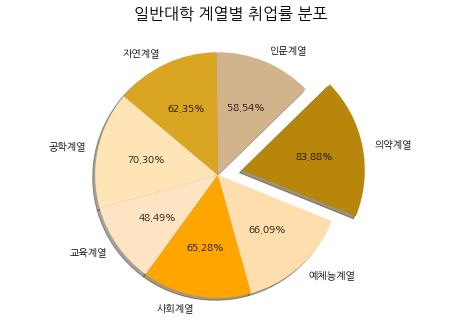

In [21]:
#  average2_df 를 pie chart로 나타내기 

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
import matplotlib.font_manager as fm

font_path = 'NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()    
rc('font',family=font_name)
# plt.rc('font',family='Malgun Gothic') 

labels1 = average22_df['계열']
sizes1 = average22_df['취업률']
explodes1 = [0, 0, 0, 0, 0.2, 0, 0]
colors1 = ['moccasin','bisque','orange','navajowhite','darkgoldenrod','tan','goldenrod']

#def format_autopct(pct, allvalues):
#    absolute = int(pct/100.*sum(allvalues))
#    return "{:.1f}%\n({:.2f})".format(pct, absolute)

def format_autopct(pct, allvalues):
    absolute = pct / 100.0 * sum(allvalues)
    return "{:.2f}%".format(absolute)


plt.figure(figsize=(8, 5))
plt.pie(sizes1, labels=labels1, colors=colors1, explode=explodes1 ,autopct=lambda pct: format_autopct(pct, sizes1),shadow=True,startangle=140)
plt.title('일반대학 계열별 취업률 분포',pad=20, fontsize = 16)
plt.axis('equal')  

plt.savefig ('대학 계열별 취업률 분포.png')

    
plt.show()

대학에서 계열별로 top5 취업률 학과 뽑아내기

일반대학 - 의약계열 top5

In [22]:
illeui_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '의약계열')]

illeui_df22

sorted_illeui_df22 = illeui_df22.sort_values('취업률_계', ascending=False)

illeui22 = sorted_illeui_df22[['학제','대계열','학과명','취업률_계']]

illeui22= illeui22.reset_index(drop=True)

illeui22_5 = illeui22.head(5)

illeui22_5

,학제,대계열,학과명,취업률_계
0,대학교,의약계열,약학부,95.0
1,대학교,의약계열,한의학과,94.8
2,대학교,의약계열,의학과,94.5
3,대학교,의약계열,약학과(2+4년제),94.1
4,대학교,의약계열,약학과(6년제),92.7


일반대학 - 공학계열 top5

In [23]:
illgong_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '공학계열')]

illgong_df22['학과명'] = illgong_df22['학과명'].replace('건축학부 건축학전공(5년제)', '건축학전공(5년제)')

sorted_illgong_df22 = illgong_df22.sort_values('취업률_계', ascending=False)

illgong = sorted_illgong_df22[['학제','대계열','학과명','취업률_계']]

illgong= illgong.reset_index(drop=True)

illgong5 = illgong.head(5)

illgong5

C:\Users\user\AppData\Local\Temp\ipykernel_20168\3571707541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illgong_df22['학과명'] = illgong_df22['학과명'].replace('건축학부 건축학전공(5년제)', '건축학전공(5년제)')


,학제,대계열,학과명,취업률_계
0,대학교,공학계열,화학공학/고분자공학부,93.0
1,대학교,공학계열,기관시스템공학부,89.9
2,대학교,공학계열,건축학과(5),89.4
3,대학교,공학계열,건축학전공(5년제),88.8
4,대학교,공학계열,전기ㆍ전자ㆍ통신공학부,86.2


In [24]:
illye_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '예체능계열')]

illye_df22

sorted_illye_df22 = illye_df22.sort_values('취업률_계', ascending=False)

illye = sorted_illye_df22[['학제','대계열','학과명','취업률_계']]

illye= illye.reset_index(drop=True)

illye5 = illye.head(5)

illye5

,학제,대계열,학과명,취업률_계
0,대학교,예체능계열,영상학과,81.9
1,대학교,예체능계열,레저스포츠학과,76.6
2,대학교,예체능계열,무용과,76.4
3,대학교,예체능계열,스포츠과학과,76.4
4,대학교,예체능계열,생활체육학과,75.9


일반대학 - 사회계열 top5

In [25]:
illsa_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '사회계열')]

illsa_df22

sorted_illsa_df22 = illsa_df22.sort_values('취업률_계', ascending=False)

illsa = sorted_illsa_df22[['학제','대계열','학과명','취업률_계']]

illsa= illsa.reset_index(drop=True)

illsa5 = illsa.head(5)

illsa5

,학제,대계열,학과명,취업률_계
0,대학교,사회계열,군사학과,97.5
1,대학교,사회계열,국제통상·금융투자학과,95.6
2,대학교,사회계열,지식경영학부,91.7
3,대학교,사회계열,기업경영전공,90.2
4,대학교,사회계열,디자인경영융합학부,89.3


일반대학 - 인문계열 top5

In [26]:
illin_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '인문계열')]

illin_df22 = illin_df22[illin_df22['학과명'] != '자유전공학부']

sorted_illin_df22 = illin_df22.sort_values('취업률_계', ascending=False)

illin = sorted_illin_df22[['학제','대계열','학과명','취업률_계']]

illin= illin.reset_index(drop=True)

illin5 = illin.head(5)

illin5

,학제,대계열,학과명,취업률_계
0,대학교,인문계열,국제비즈니스어학부,75.9
1,대학교,인문계열,문화콘텐츠학과,67.8
2,대학교,인문계열,크리에이티브인문학부,67.8
3,대학교,인문계열,영어영문학부,67.1
4,대학교,인문계열,문화인류학과,64.8


일반대학 - 자연계열 top5

In [27]:
illja_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '자연계열')]

illja_df22

sorted_illja_df22 = illja_df22.sort_values('취업률_계', ascending=False)

illja = sorted_illja_df22[['학제','대계열','학과명','취업률_계']]

illja= illja.reset_index(drop=True)

illja5 = illja.head(5)

illja5

,학제,대계열,학과명,취업률_계
0,대학교,자연계열,수의학과,90.4
1,대학교,자연계열,호텔조리학과,87.4
2,대학교,자연계열,제약생명공학과,80.6
3,대학교,자연계열,융합생명공학과,75.8
4,대학교,자연계열,의류산업학과,75.5


일반대학 - 교육계열 top5

In [28]:
illgyo_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '교육계열')]

illgyo_df22

sorted_illgyo_df22 = illgyo_df22.sort_values('취업률_계', ascending=False)

illgyo = sorted_illgyo_df22[['학제','대계열','학과명','취업률_계']]

illgyo= illgyo.reset_index(drop=True)

illgyo5 = illgyo.head(5)

illgyo5

,학제,대계열,학과명,취업률_계
0,대학교,교육계열,아동보육학과,78.0
1,대학교,교육계열,언어치료학과,71.3
2,대학교,교육계열,유아교육학과,63.7
3,대학교,교육계열,유아교육과,63.2
4,대학교,교육계열,초등교육과,62.8


전체를 그래프로 그려보기

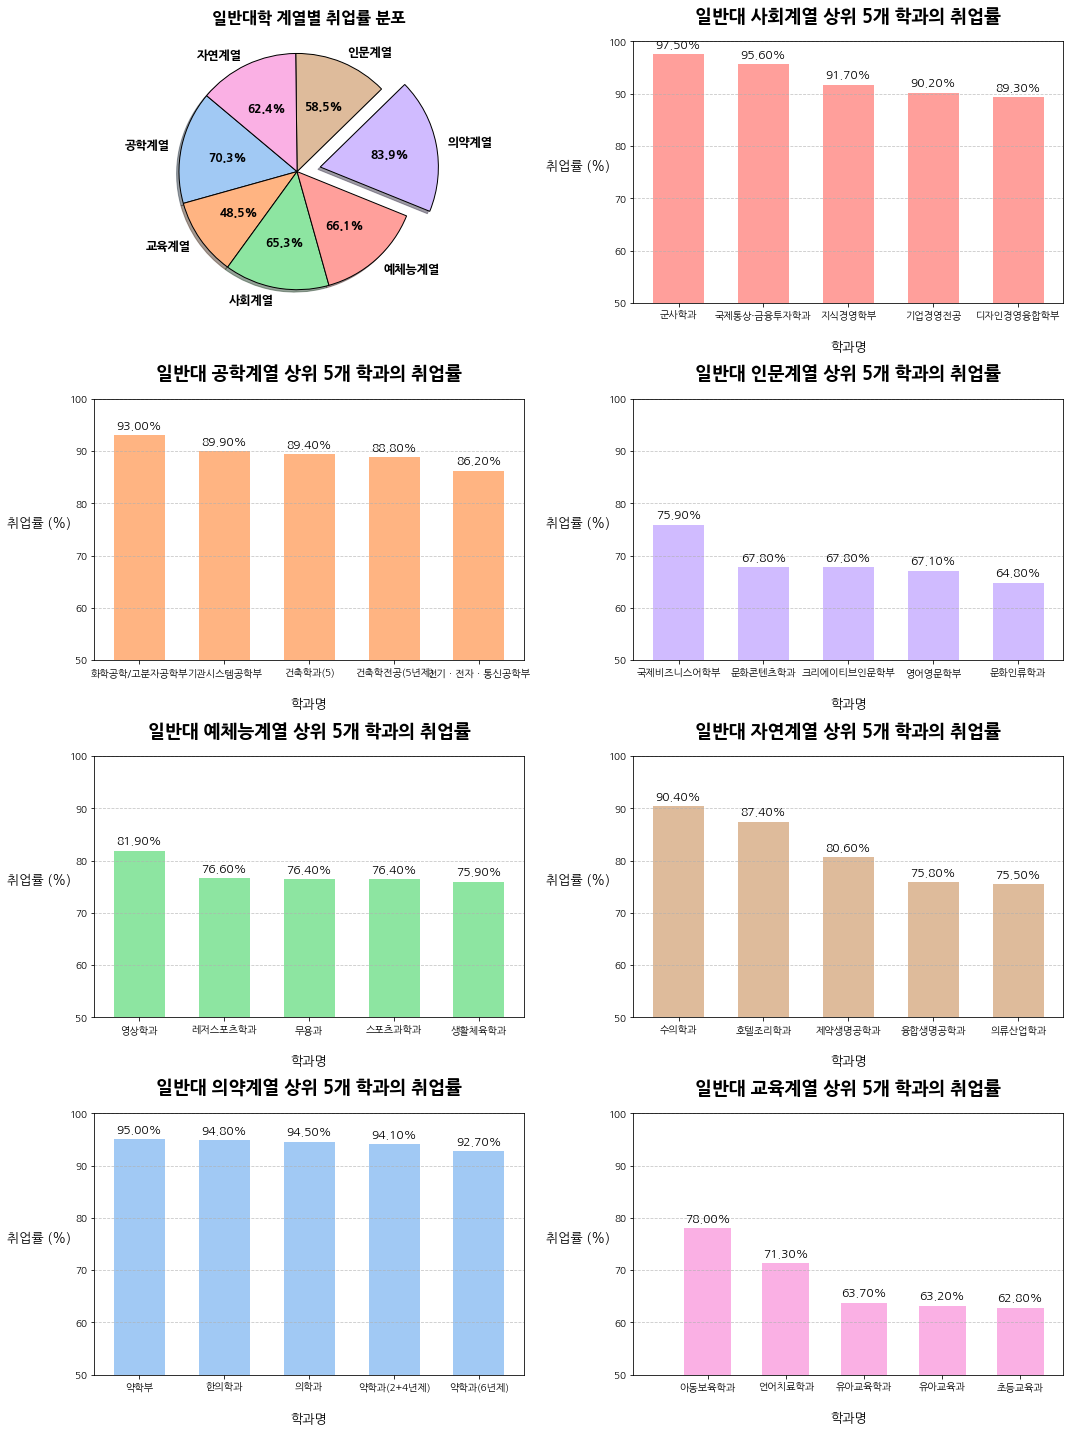

In [29]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 폰트 설정
font_path = 'NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()    
rc('font', family=font_name)

# 데이터 설정
labels1 = average22_df['계열']
sizes1 = average22_df['취업률']
explodes1 = [0, 0, 0, 0, 0.2, 0, 0]

# Seaborn 색상 팔레트 사용
colors1 = sns.color_palette("pastel")[0:len(labels1)]

def format_autopct(pct, allvalues):
    absolute = pct * sum(allvalues) / 100.0  # 절대값 계산
    percentage = absolute  # 원래 데이터 값 기반 퍼센티지 계산
    return "{:.1f}%".format(percentage, absolute)

# 서브플롯 생성
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# 첫 번째 서브플롯 - 파이 차트
wedges, texts, autotexts = axs[0, 0].pie(sizes1, labels=labels1, colors=colors1, explode=explodes1,
                                         autopct=lambda pct: format_autopct(pct, sizes1), shadow=True, startangle=140,
                                         wedgeprops={'edgecolor': 'black'})

# 제목 설정
axs[0, 0].set_title('일반대학 계열별 취업률 분포', pad=20, fontsize=16,fontweight='bold')

# 텍스트 스타일 조정
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)


axs[0, 0].axis('equal')

bar_width = 0.6
palette = sns.color_palette("pastel")
bar_color = sns.color_palette("deep")[0]

# 나머지 서브플롯에 대한 막대 그래프 코드
# 첫 번째 그래프
axs[3,0].bar(illeui22_5['학과명'], illeui22_5['취업률_계'], width=bar_width, color=palette[0])
axs[3,0].set_xlabel('학과명', labelpad=20, fontsize=13)
axs[3,0].set_ylabel('취업률 (%)', rotation=0, labelpad=30, fontsize=13)
axs[3,0].set_title('일반대 의약계열 상위 5개 학과의 취업률', pad=20, fontsize=18,fontweight='bold')
axs[3,0].set_ylim(50, 100)
axs[3,0].grid(True, axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(illeui22_5['취업률_계']):
    axs[3,0].text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# 두 번째 그래프 
axs[1,0].bar(illgong5['학과명'], illgong5['취업률_계'], width=bar_width, color=palette[1])
axs[1,0].set_xlabel('학과명', labelpad=20, fontsize=13)
axs[1,0].set_ylabel('취업률 (%)', rotation=0, labelpad=30, fontsize=13)
axs[1,0].set_title('일반대 공학계열 상위 5개 학과의 취업률', pad=20, fontsize=18,fontweight='bold')
axs[1,0].set_ylim(50, 100)
axs[1,0].grid(True, axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(illgong5['취업률_계']):
    axs[1,0].text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# 세 번째 그래프 
axs[2,0].bar(illye5['학과명'], illye5['취업률_계'], width=bar_width, color=palette[2])
axs[2,0].set_xlabel('학과명', labelpad=20, fontsize=13)
axs[2,0].set_ylabel('취업률 (%)', rotation=0, labelpad=30, fontsize=13)
axs[2,0].set_title('일반대 예체능계열 상위 5개 학과의 취업률', pad=20, fontsize=18,fontweight='bold')
axs[2,0].set_ylim(50, 100)
axs[2,0].grid(True, axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(illye5['취업률_계']):
    axs[2,0].text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# 네 번째 그래프    
axs[0,1].bar(illsa5['학과명'], illsa5['취업률_계'], width=bar_width, color=palette[3])
axs[0,1].set_xlabel('학과명', labelpad=20, fontsize=13)
axs[0,1].set_ylabel('취업률 (%)', rotation=0, labelpad=30, fontsize=13)
axs[0,1].set_title('일반대 사회계열 상위 5개 학과의 취업률', pad=20, fontsize=18,fontweight='bold')
axs[0,1].set_ylim(50, 100)
axs[0,1].grid(True, axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(illsa5['취업률_계']):
    axs[0,1].text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# 다섯 번째 그래프    
axs[1,1].bar(illin5['학과명'], illin5['취업률_계'], width=bar_width, color=palette[4])
axs[1,1].set_xlabel('학과명', labelpad=20, fontsize=13)
axs[1,1].set_ylabel('취업률 (%)', rotation=0, labelpad=30, fontsize=13)
axs[1,1].set_title('일반대 인문계열 상위 5개 학과의 취업률', pad=20, fontsize=18,fontweight='bold')
axs[1,1].set_ylim(50, 100)
axs[1,1].grid(True, axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(illin5['취업률_계']):
    axs[1,1].text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# 여섯 번째 그래프  
axs[2,1].bar(illja5['학과명'], illja5['취업률_계'], width=bar_width, color=palette[5])
axs[2,1].set_xlabel('학과명', labelpad=20, fontsize=13)
axs[2,1].set_ylabel('취업률 (%)', rotation=0, labelpad=30, fontsize=13)
axs[2,1].set_title('일반대 자연계열 상위 5개 학과의 취업률', pad=20, fontsize=18,fontweight='bold')
axs[2,1].set_ylim(50, 100)
axs[2,1].grid(True, axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(illja5['취업률_계']):
    axs[2,1].text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# 일곱 번째 그래프  
axs[3,1].bar(illgyo5['학과명'], illgyo5['취업률_계'], width=bar_width, color=palette[6])
axs[3,1].set_xlabel('학과명', labelpad=20, fontsize=13)
axs[3,1].set_ylabel('취업률 (%)', rotation=0, labelpad=30, fontsize=13)
axs[3,1].set_title('일반대 교육계열 상위 5개 학과의 취업률', pad=20, fontsize=18,fontweight='bold')
axs[3,1].set_ylim(50, 100)
axs[3,1].grid(True, axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(illgyo5['취업률_계']):
    axs[3,1].text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12, color='black')


plt.subplots_adjust(hspace=1)

plt.tight_layout()

plt.savefig ('대학 계열별 취업률 분포 - 계열별 top5 학과.png')

plt.show()


In [30]:
#  2022년도  일반대학 계열별 취업자수와 졸업자수 
ill22_df = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교')]
sum22 = ill22_df.groupby('대계열')[['취업률_계', '졸업자_계']].mean().reset_index()
sum22


#  2021년도  일반대학 계열별 취업자수와 졸업자수 
ill21_df = df21[(df21['졸업자_계'] >= 100) & (df21['학제'] == '대학교')]
sum21 = ill21_df.groupby('대계열')[['취업률_계', '졸업자_계']].mean().reset_index()
sum21


#  2020년도  일반대학 계열별 취업자수와 졸업자수 
ill20_df = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교')]
sum20 = ill20_df.groupby('대계열')[['취업률_계', '졸업자_계']].mean().reset_index()
sum20

#  2019년도  일반대학 계열별 취업자수와 졸업자수 
ill19_df = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교')]
sum19 = ill19_df.groupby('대계열')[['취업률_계', '졸업자_계']].mean().reset_index()
sum19

#  2018년도  일반대학 계열별 취업자수와 졸업자수 
ill18_df = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교')]
sum18 = ill18_df.groupby('대계열')[['취업률_계', '졸업자_계']].mean().reset_index()
sum18

#  2017년도  일반대학 계열별 취업자수와 졸업자수 
ill17_df = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교')]
sum17 = ill17_df.groupby('대계열')[['취업률_계', '졸업자_계']].mean().reset_index()
sum17

#  2016년도  일반대학 계열별 취업자수와 졸업자수 
ill16_df = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교')]
sum16 = ill16_df.groupby('대계열')[['취업률_계', '졸업자_계']].mean().reset_index()
sum16

#  2015년도  일반대학 계열별 취업자수와 졸업자수 
ill15_df = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교')]
sum15 = ill15_df.groupby('대계열')[['취업률_계', '졸업자_계']].mean().reset_index()
sum15

#  2014년도  일반대학 계열별 취업자수와 졸업자수 
ill14_df = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교')]
sum14 = ill14_df.groupby('대계열')[['취업률_계', '졸업자_계']].mean().reset_index()
sum14

#2013년도  일반대학 계열별 취업자수와 졸업자수 
ill13_df = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교')]
sum13 = ill13_df.groupby('대계열')[['취업률_계', '졸업자_계']].mean().reset_index()
sum13

,대계열,취업률_계,졸업자_계
0,공학계열,76.664706,368.125000
1,교육계열,53.554839,420.000000
2,사회계열,63.359524,586.253968
3,예체능계열,60.810294,266.147059
4,의약계열,79.926316,670.210526
5,인문계열,58.741791,430.582090
6,자연계열,60.592308,397.692308


In [31]:
# 각 연도별 데이터프레임에 'Year' 열 추가    (공 학 계 열)
sum13['Year'] = 13
sum14['Year'] = 14
sum15['Year'] = 15
sum16['Year'] = 16
sum17['Year'] = 17
sum18['Year'] = 18
sum19['Year'] = 19
sum20['Year'] = 20
sum21['Year'] = 21
sum22['Year'] = 22


df_combined_gonghak = pd.concat([sum13, sum14, sum15, sum16, sum17, sum18, sum19, sum20, sum21, sum22])
# print(df_combined.columns)

df_combined_gonghak = df_combined_gonghak.sort_values(by=['Year', '취업률_계','졸업자_계']).reset_index(drop=True)

df_gonghak = df_combined_gonghak[df_combined_gonghak['대계열'] == '공학계열'].reset_index(drop=True)

df_gonghak

,대계열,취업률_계,졸업자_계,Year
0,공학계열,76.664706,368.125000,13
1,공학계열,74.609848,379.757576,14
2,공학계열,72.012687,401.686567,15
3,공학계열,70.881507,394.609589,16
4,공학계열,68.997973,400.047297,17
5,공학계열,70.724444,416.792593,18
6,공학계열,69.262676,398.753521,19
7,공학계열,65.490909,375.883117,20
8,공학계열,68.403067,358.619632,21
9,공학계열,70.302532,373.196203,22


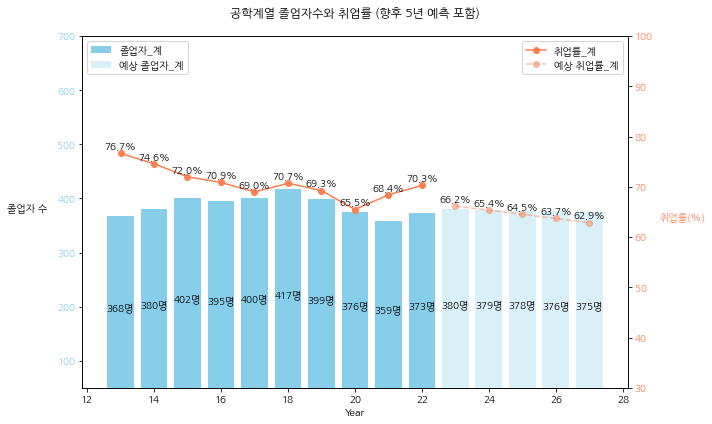

In [32]:
############################# 공학계열 졸업자수와 취업률 (향후 5년 예측 포함)   ###########################################



import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 기존 데이터 로드
labels = df_gonghak['Year']
graduates = df_gonghak['졸업자_계']
employment_rate = df_gonghak['취업률_계']

# 선형 회귀 모델 학습 - 졸업자 수
graduate_model = LinearRegression()
graduate_model.fit(labels.values.reshape(-1, 1), graduates)

# 선형 회귀 모델 학습 - 취업률
employment_model = LinearRegression()
employment_model.fit(labels.values.reshape(-1, 1), employment_rate)

# 향후 5년간의 연도 생성
future_years = np.arange(labels.iloc[-1] + 1, labels.iloc[-1] + 6).reshape(-1, 1)

# 예측 값 생성
predicted_graduates = graduate_model.predict(future_years)
predicted_employment_rate = employment_model.predict(future_years)

# 예측 데이터를 포함한 새로운 DataFrame 생성
future_data = pd.DataFrame({
    'Year': future_years.flatten(),
    '졸업자_계': predicted_graduates,
    '취업률_계': predicted_employment_rate
})


df_combined = pd.concat([df_gonghak, future_data], ignore_index=True)


historical_data_len = len(df_gonghak)

fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(df_combined['Year'][:historical_data_len], df_combined['졸업자_계'][:historical_data_len], color='skyblue', label='졸업자_계')
bars_future = ax1.bar(df_combined['Year'][historical_data_len:], df_combined['졸업자_계'][historical_data_len:], color='skyblue', alpha=0.3, label='예상 졸업자_계')

ax1.set_xlabel('Year')
ax1.set_ylabel('졸업자 수', color='black', rotation=0, labelpad=30)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_ylim(50, 700)

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.0f}명',
                 xy=(bar.get_x() + bar.get_width() / 2, height/2),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

for bar in bars_future:
    height = bar.get_height()
    ax1.annotate(f'{height:.0f}명',
                 xy=(bar.get_x() + bar.get_width() / 2, height/2),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

ax2 = ax1.twinx()
line1, = ax2.plot(df_combined['Year'][:historical_data_len], df_combined['취업률_계'][:historical_data_len], color='coral', marker='o', label='취업률_계')
line2, = ax2.plot(df_combined['Year'][historical_data_len:], df_combined['취업률_계'][historical_data_len:], color='coral', linestyle='dashed', marker='o', alpha=0.5, label='예상 취업률_계')

ax2.set_ylabel('취업률(%)', color='coral', rotation=0, labelpad=30)
ax2.tick_params(axis='y', labelcolor='coral')
ax2.set_ylim(30, 100)

for i, value in enumerate(df_combined['취업률_계'][:historical_data_len]):
    ax2.annotate(f'{value:.1f}%',
                 xy=(df_combined['Year'].iloc[i], value),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

for i, value in enumerate(df_combined['취업률_계'][historical_data_len:]):
    idx = historical_data_len + i
    ax2.annotate(f'{value:.1f}%',
                 xy=(df_combined['Year'].iloc[idx], value),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('공학계열 졸업자수와 취업률 (향후 5년 예측 포함)', pad=20)
fig.tight_layout()

lines, labels = ax1.get_legend_handles_labels()  # 첫 번째 y축의 범례
lines2, labels2 = ax2.get_legend_handles_labels()  # 두 번째 y축의 범례
ax1.legend(lines, labels, loc='upper left')  # 졸업자 수에 대한 범례는 왼쪽 상단에 유지
ax2.legend(lines2, labels2, loc='upper right')  # 취업률에 대한 범례는 오른쪽 상단에 위치

plt.show()


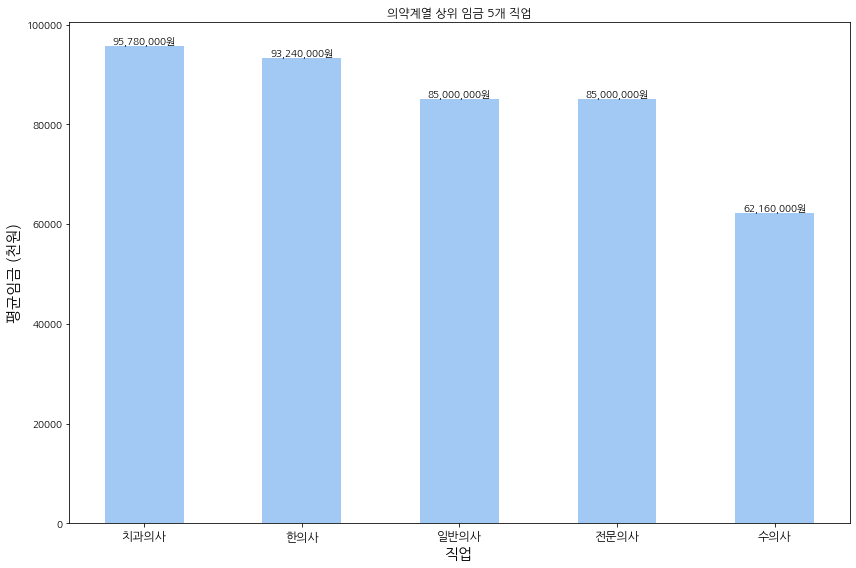

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns


palette = sns.color_palette('pastel')

font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 엑셀 파일에서 데이터 읽기
xlsx = '계열별직업임금최종본.xlsx'
df = pd.read_excel(xlsx)
# '중위임금(천원)' 열의 쉼표 제거하고 실수형으로 변환
df['평균임금'] = df['평균임금'].replace(',', '', regex=True).astype(float)

# '계열' 컬럼이 '의약계열'인 경우만 필터링
manufacturing_jobs = df[df['계열'] == '의약계열']

# 중위임금으로 정렬
sorted_df = manufacturing_jobs.sort_values('평균임금', ascending=False)

# 상위 5개 직업만 선택
manufacturing_jobs5 = sorted_df.head(5).reset_index(drop=True)

# 제조업에서 직업별 중위임금 시각화
plt.figure(figsize=(12, 8))

bar_width = 0.5  
bars = plt.bar(manufacturing_jobs5['직업'], manufacturing_jobs5['평균임금'], color=palette[0], width=bar_width)

# 막대 위에 수치 표시
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*1000:,}원', ha='center', va='bottom', fontsize=10)

plt.title('의약계열 상위 임금 5개 직업')
plt.xlabel('직업', fontsize=15)
plt.ylabel('평균임금 (천원)', fontsize=15)
plt.xticks(fontsize=12) 
plt.tight_layout()
plt.show()

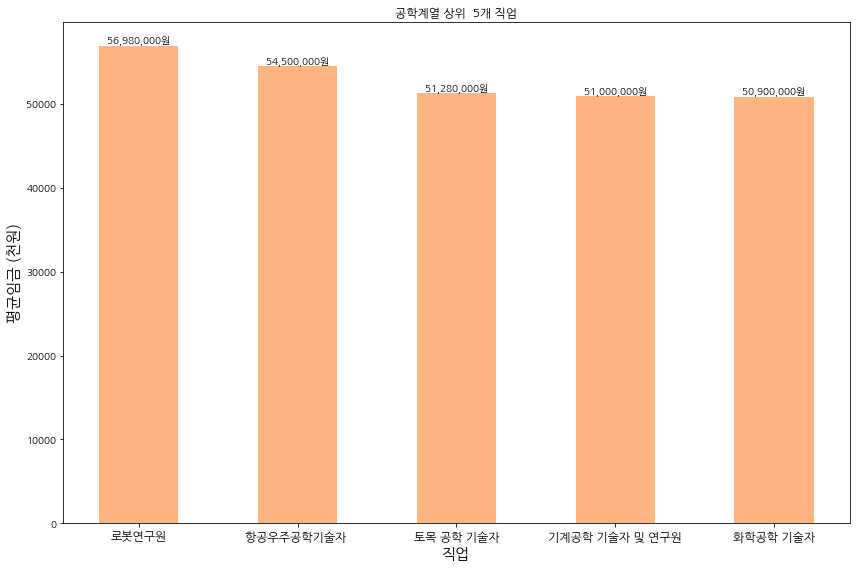

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

palette = sns.color_palette('pastel')
font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 엑셀 파일에서 데이터 읽기
xlsx = '계열별직업임금최종본.xlsx'
df = pd.read_excel(xlsx)
# '중위임금(천원)' 열의 쉼표 제거하고 실수형으로 변환
df['평균임금'] = df['평균임금'].replace(',', '', regex=True).astype(float)

# '계열' 컬럼이 '의약계열'인 경우만 필터링
manufacturing_jobs = df[df['계열'] == '공학계열']

# 중위임금으로 정렬
sorted_df = manufacturing_jobs.sort_values('평균임금', ascending=False)

# 상위 5개 직업만 선택
manufacturing_jobs5 = sorted_df.head(5).reset_index(drop=True)

# 제조업에서 직업별 중위임금 시각화
plt.figure(figsize=(12, 8))

bar_width = 0.5  
bars = plt.bar(manufacturing_jobs5['직업'], manufacturing_jobs5['평균임금'], color=palette[1], width=bar_width)

# 막대 위에 수치 표시
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*1000:,}원', ha='center', va='bottom', fontsize=10)

plt.title('공학계열 상위  5개 직업')
plt.xlabel('직업', fontsize=15)
plt.ylabel('평균임금 (천원)', fontsize=15)
plt.xticks(fontsize=12) 
plt.tight_layout()
plt.show()

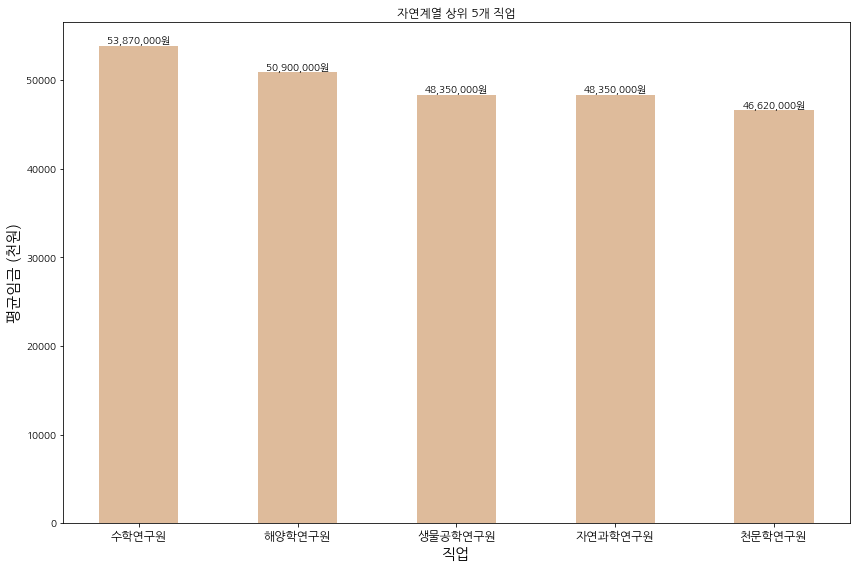

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


palette = sns.color_palette('pastel')
font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 엑셀 파일에서 데이터 읽기
xlsx = '계열별직업임금최종본.xlsx'
df = pd.read_excel(xlsx)
# '중위임금(천원)' 열의 쉼표 제거하고 실수형으로 변환
df['평균임금'] = df['평균임금'].replace(',', '', regex=True).astype(float)

# '계열' 컬럼이 '의약계열'인 경우만 필터링
manufacturing_jobs = df[df['계열'] == '자연계열']

# 중위임금으로 정렬
sorted_df = manufacturing_jobs.sort_values('평균임금', ascending=False)

# 상위 5개 직업만 선택
manufacturing_jobs5 = sorted_df.head(5).reset_index(drop=True)

# 제조업에서 직업별 중위임금 시각화
plt.figure(figsize=(12, 8))

bar_width = 0.5  
bars = plt.bar(manufacturing_jobs5['직업'], manufacturing_jobs5['평균임금'], color=palette[5], width=bar_width)

# 막대 위에 수치 표시
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*1000:,}원', ha='center', va='bottom', fontsize=10)

plt.title('자연계열 상위 5개 직업')
plt.xlabel('직업', fontsize=15)
plt.ylabel('평균임금 (천원)', fontsize=15)
plt.xticks(fontsize=12) 
plt.tight_layout()
plt.show()

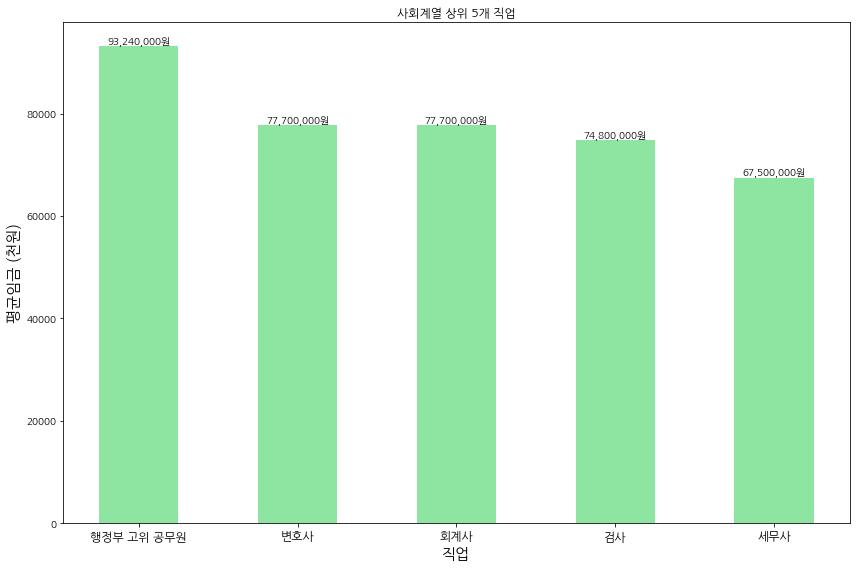

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

palette = sns.color_palette('pastel')
font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 엑셀 파일에서 데이터 읽기
xlsx = '계열별직업임금최종본.xlsx'
df = pd.read_excel(xlsx)
# '중위임금(천원)' 열의 쉼표 제거하고 실수형으로 변환
df['평균임금'] = df['평균임금'].replace(',', '', regex=True).astype(float)

# '계열' 컬럼이 '의약계열'인 경우만 필터링
manufacturing_jobs = df[df['계열'] == '사회계열']

# 중위임금으로 정렬
sorted_df = manufacturing_jobs.sort_values('평균임금', ascending=False)

# 상위 5개 직업만 선택
manufacturing_jobs5 = sorted_df.head(5).reset_index(drop=True)

# 제조업에서 직업별 중위임금 시각화
plt.figure(figsize=(12, 8))

bar_width = 0.5  
bars = plt.bar(manufacturing_jobs5['직업'], manufacturing_jobs5['평균임금'], color=palette[2], width=bar_width)

# 막대 위에 수치 표시
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*1000:,}원', ha='center', va='bottom', fontsize=10)

plt.title('사회계열 상위 5개 직업')
plt.xlabel('직업', fontsize=15)
plt.ylabel('평균임금 (천원)', fontsize=15)
plt.xticks(fontsize=12) 
plt.tight_layout()
plt.show()

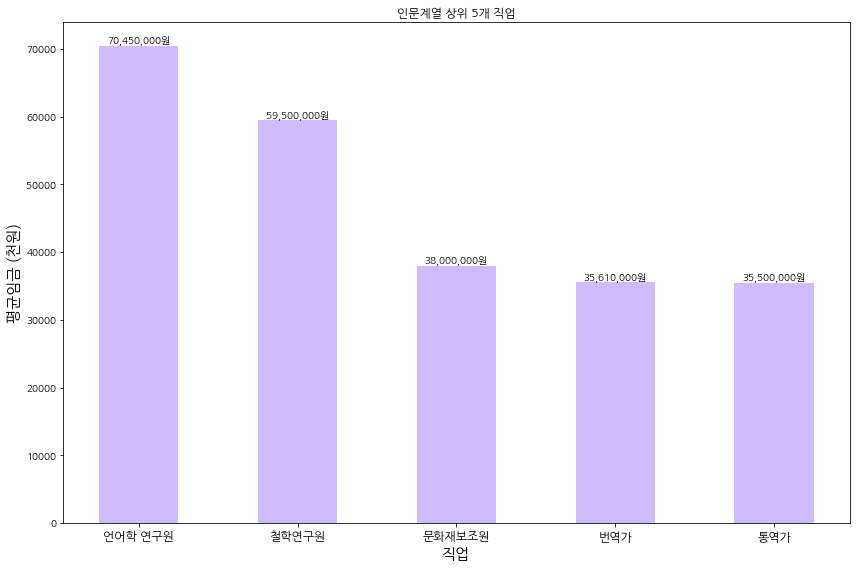

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

palette = sns.color_palette('pastel')
font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 엑셀 파일에서 데이터 읽기
xlsx = '계열별직업임금최종본.xlsx'
df = pd.read_excel(xlsx)
# '중위임금(천원)' 열의 쉼표 제거하고 실수형으로 변환
df['평균임금'] = df['평균임금'].replace(',', '', regex=True).astype(float)

# '계열' 컬럼이 '의약계열'인 경우만 필터링
manufacturing_jobs = df[df['계열'] == '인문계열']

# 중위임금으로 정렬
sorted_df = manufacturing_jobs.sort_values('평균임금', ascending=False)

# 상위 5개 직업만 선택
manufacturing_jobs5 = sorted_df.head(5).reset_index(drop=True)

# 제조업에서 직업별 중위임금 시각화
plt.figure(figsize=(12, 8))

bar_width = 0.5  
bars = plt.bar(manufacturing_jobs5['직업'], manufacturing_jobs5['평균임금'], color=palette[4], width=bar_width)

# 막대 위에 수치 표시
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*1000:,}원', ha='center', va='bottom', fontsize=10)

plt.title('인문계열 상위 5개 직업')
plt.xlabel('직업', fontsize=15)
plt.ylabel('평균임금 (천원)', fontsize=15)
plt.xticks(fontsize=12) 
plt.tight_layout()
plt.show()

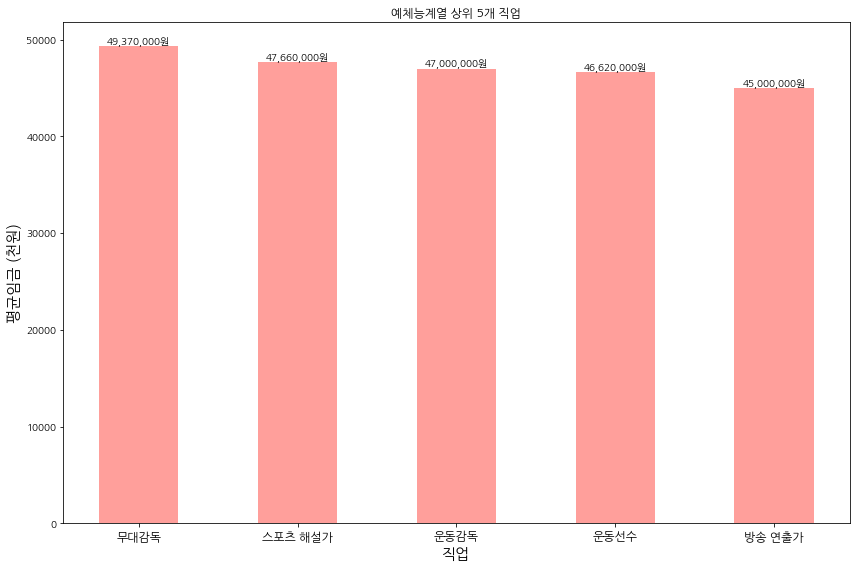

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

palette = sns.color_palette('pastel')
font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 엑셀 파일에서 데이터 읽기
xlsx = '계열별직업임금최종본.xlsx'
df = pd.read_excel(xlsx)
# '중위임금(천원)' 열의 쉼표 제거하고 실수형으로 변환
df['평균임금'] = df['평균임금'].replace(',', '', regex=True).astype(float)

# '계열' 컬럼이 '의약계열'인 경우만 필터링
manufacturing_jobs = df[df['계열'] == '예체능계열']

# 중위임금으로 정렬
sorted_df = manufacturing_jobs.sort_values('평균임금', ascending=False)

# 상위 5개 직업만 선택
manufacturing_jobs5 = sorted_df.head(5).reset_index(drop=True)

# 제조업에서 직업별 중위임금 시각화
plt.figure(figsize=(12, 8))

bar_width = 0.5  
bars = plt.bar(manufacturing_jobs5['직업'], manufacturing_jobs5['평균임금'], color=palette[3], width=bar_width)

# 막대 위에 수치 표시
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*1000:,}원', ha='center', va='bottom', fontsize=10)

plt.title('예체능계열 상위 5개 직업')
plt.xlabel('직업', fontsize=15)
plt.ylabel('평균임금 (천원)', fontsize=15)
plt.xticks(fontsize=12) 
plt.tight_layout()
plt.show()

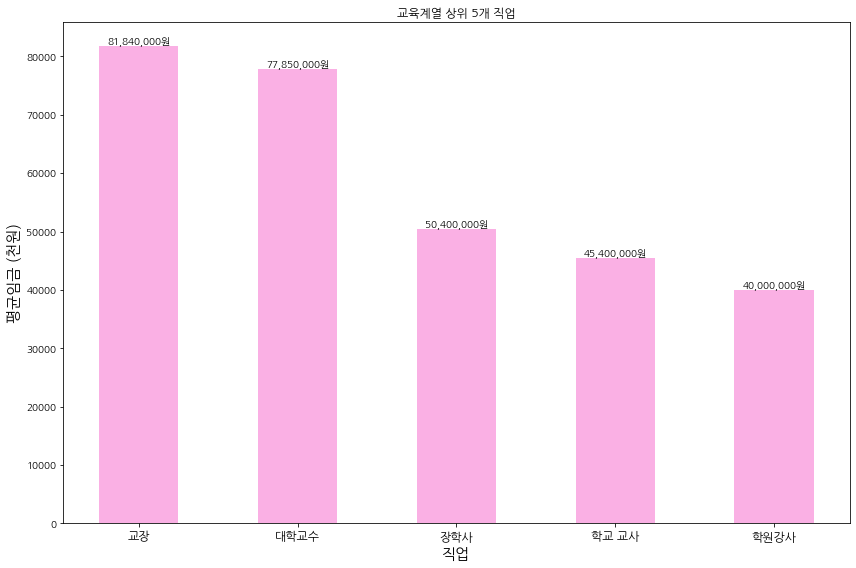

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

palette = sns.color_palette('pastel')
font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 엑셀 파일에서 데이터 읽기
xlsx = '계열별직업임금최종본.xlsx'
df = pd.read_excel(xlsx)
# '중위임금(천원)' 열의 쉼표 제거하고 실수형으로 변환
df['평균임금'] = df['평균임금'].replace(',', '', regex=True).astype(float)

# '계열' 컬럼이 '의약계열'인 경우만 필터링
manufacturing_jobs = df[df['계열'] == '교육계열']

# 중위임금으로 정렬
sorted_df = manufacturing_jobs.sort_values('평균임금', ascending=False)

# 상위 5개 직업만 선택
manufacturing_jobs5 = sorted_df.head(5).reset_index(drop=True)

# 제조업에서 직업별 중위임금 시각화
plt.figure(figsize=(12, 8))

bar_width = 0.5  
bars = plt.bar(manufacturing_jobs5['직업'], manufacturing_jobs5['평균임금'], color=palette[6], width=bar_width)

# 막대 위에 수치 표시
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*1000:,}원', ha='center', va='bottom', fontsize=10)

plt.title('교육계열 상위 5개 직업')
plt.xlabel('직업', fontsize=15)
plt.ylabel('평균임금 (천원)', fontsize=15)
plt.xticks(fontsize=12) 
plt.tight_layout()
plt.show()

In [40]:
import pandas as pd

xlsx = '2022년 학과별 고등교육기관 취업통계_20240112.xlsx' 

df22 = pd.read_excel(xlsx, header=4)


df22 = df22.reset_index(drop=True)

df22

,조사기준일,학제,과정구분,대계열,중계열,소계열,학과코드,학과명,학위구분,졸업자_계,...,3차 유지취업률_여,4차 유지취업자_계,4차 유지취업자_남,4차 유지취업자_여,4차 유지취업률_계,4차 유지취업률_남,4차 유지취업률_여,입학당시 기취업자_계,입학당시 기취업자_남,입학당시 기취업자_여
0,2022.12.31,전문대학,전문대학과정,인문계열,언어ㆍ문학,일본어,C01010100002,관광일본어과,NaN,53,...,50.0,10,7,3,66.7,77.8,50.0,1,1,0
1,2022.12.31,전문대학,전문대학과정,인문계열,언어ㆍ문학,일본어,C01010100003,관광일본어전공,NaN,21,...,50.0,6,4,2,75.0,100.0,50.0,3,2,1
2,2022.12.31,전문대학,전문대학과정,인문계열,언어ㆍ문학,일본어,C01010100005,관광일어과,NaN,27,...,0.0,3,3,0,37.5,75.0,0.0,0,0,0
3,2022.12.31,전문대학,전문대학과정,인문계열,언어ㆍ문학,일본어,C01010100011,실무일본어과,NaN,96,...,66.7,13,0,13,61.9,0.0,61.9,2,0,2
4,2022.12.31,전문대학,전문대학과정,인문계열,언어ㆍ문학,일본어,C01010100013,일본어과,NaN,53,...,50.0,5,3,2,55.6,60.0,50.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9662,2022.12.31,기능대학,전문대학과정,예체능계열,디자인,기타디자인,C07010400403,융합디자인과,NaN,17,...,100.0,4,2,2,44.4,28.6,100.0,1,1,0
9663,2022.12.31,기능대학,전문대학과정,예체능계열,디자인,기타디자인,C07010400433,생활제품디자인과,NaN,8,...,100.0,2,0,2,66.7,0.0,100.0,1,0,1
9664,2022.12.31,기능대학,전문대학과정,예체능계열,디자인,기타디자인,C07010410015,스마트 제품디자인과,NaN,22,...,66.7,8,6,2,72.7,75.0,66.7,0,0,0
9665,2022.12.31,기능대학,전문대학과정,예체능계열,응용예술,영상·예술,C07020300014,영상그래픽과,NaN,21,...,100.0,3,2,1,60.0,50.0,100.0,1,0,1


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 엑셀 파일에서 데이터 읽기
xlsx = '계열별직업임금최종본.xlsx'
df = pd.read_excel(xlsx)

# 데이터 전처리
df['평균임금'] = df['평균임금'].replace(',', '', regex=True).astype(float)

# 계열별 평균 임금 계산
avg_salary = df.groupby('계열')['평균임금'].mean().reset_index()

# "기타" 행 제거
avg_salary = avg_salary[avg_salary['계열'] != '기타']

# 임금을 기준으로 정렬
sorted_df = avg_salary.sort_values('평균임금', ascending=False).reset_index(drop=True)

# 제공된 illdae_df와 average22_df를 사용
illdae_df = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교')]
average22 = illdae_df.groupby('대계열')['취업률_계'].mean()
average22_df = average22.reset_index()

# 열 이름 변경 및 학제 열 추가
average22_df.columns = ['계열', '취업률']
average22_df['학제'] = '일반대학'

# 취업률을 기준으로 내림차순 정렬
sorted_average22_df = average22_df[['학제', '계열', '취업률']].sort_values('취업률', ascending=False).reset_index(drop=True)

# 데이터 병합
final_df = pd.merge(sorted_average22_df, sorted_df, on='계열', how='left')

final_df


,학제,계열,취업률,평균임금
0,일반대학,의약계열,83.880952,55884.461538
1,일반대학,공학계열,70.302532,45223.960000
2,일반대학,예체능계열,66.090909,38404.375000
3,일반대학,사회계열,65.282222,49310.434783
4,일반대학,자연계열,62.350769,44321.666667
5,일반대학,인문계열,58.539683,36127.272727
6,일반대학,교육계열,48.493750,45913.000000


Unique 계열 values: ['의약계열' '공학계열' '자연계열' '사회계열' '예체능계열' '인문계열' '교육계열' nan '기타']


C:\Users\user\AppData\Local\Temp\ipykernel_20168\3577198591.py:71: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.yticks([])


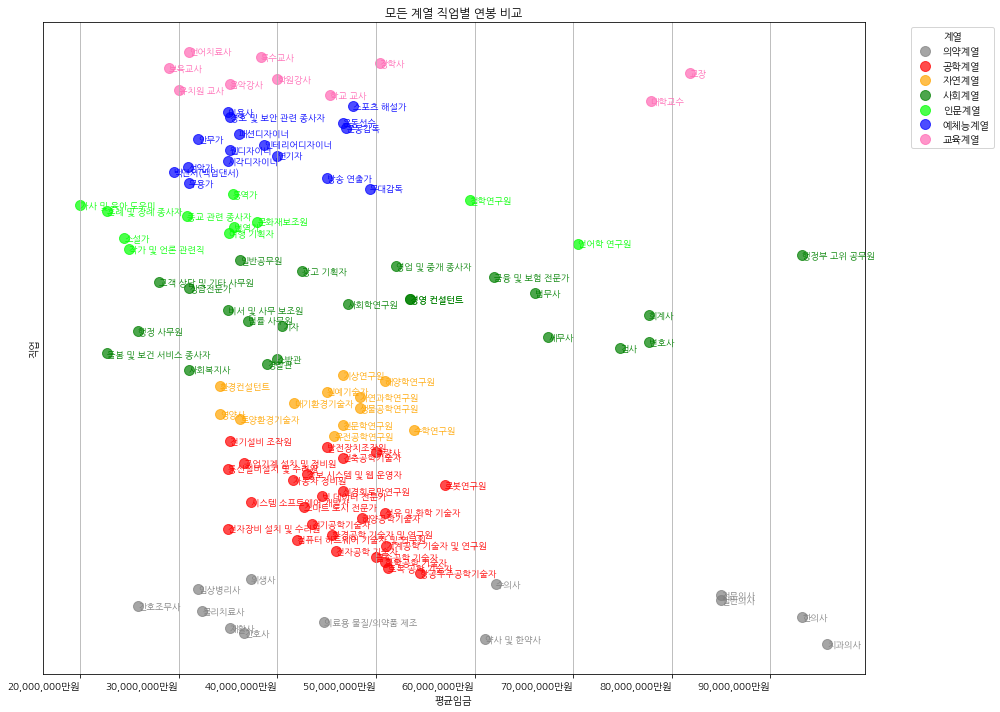

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter

# 색상 설정
colors = {
    '의약계열': 'grey',
    '공학계열': 'red',
    '자연계열': 'orange',
    '사회계열': 'green',
    '인문계열': 'lime',
    '예체능계열': 'blue',
    '교육계열': 'hotpink'
}

# 폰트 설정
font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 엑셀 파일에서 데이터 읽기
xlsx = '계열별직업임금최종본.xlsx'
df = pd.read_excel(xlsx)

# '계열' 컬럼의 고유 값 확인
unique_계열 = df['계열'].unique()
print(f"Unique 계열 values: {unique_계열}")

# NaN 값 처리 (NaN을 제외하거나 특정 값으로 대체)
df = df.dropna(subset=['계열'])

# 임금 포맷터 함수 정의
def format_currency(x, _):
    return f'{int(x):,},000만원'  # 천 단위 구분 기호와 '만원' 단위 추가

# 산점도 그리기
plt.figure(figsize=(14, 10))

# 계열별로 산점도를 그리기
for 계열 in colors:
    계열_df = df[df['계열'] == 계열]
    plt.scatter(
        x=계열_df['평균임금'],
        y=계열_df['직업'],
        color=colors[계열],
        label=계열,
        s=100,
        alpha=0.7
    )
    # 각 점 오른쪽에 직업명을 표시
    for _, row in 계열_df.iterrows():
        plt.text(
            x=row['평균임금'],  # 점의 오른쪽에 텍스트 위치
            y=row['직업'],
            s=row['직업'],
            color=colors[계열],
            fontsize=9,
            ha='left',
            va='center'
        )

plt.title('모든 계열 직업별 연봉 비교')
plt.xlabel('평균임금')
plt.ylabel('직업')

# x축 포맷터 설정
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_currency))

# y축 레이블 제거
plt.yticks([])

plt.xticks( ha='right')  # X축 레이블 회전
plt.grid(True)
plt.legend(title='계열', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정
plt.tight_layout()  # 레이아웃 조정
plt.show()

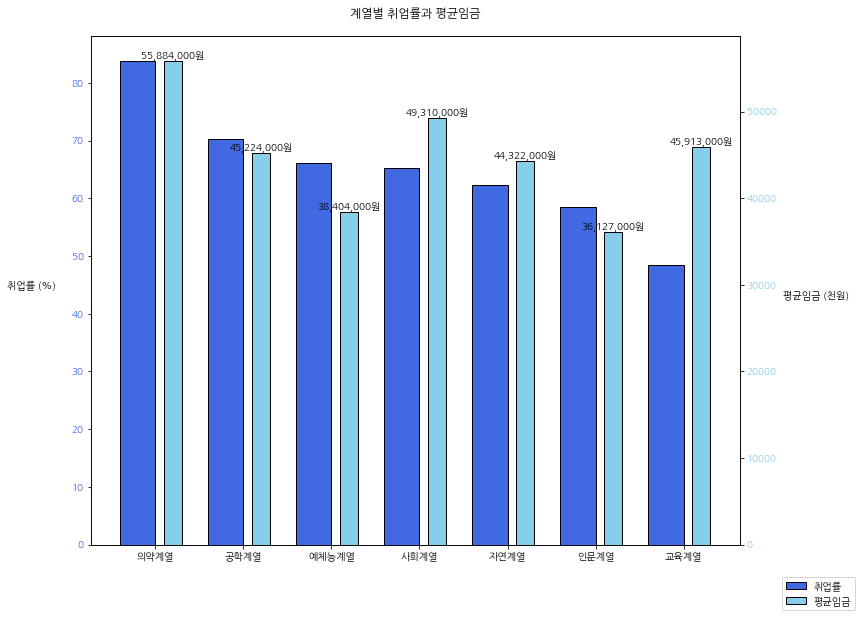

In [43]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = 'NanumGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 엑셀 파일에서 데이터 읽기
xlsx = '계열별직업임금최종본.xlsx'
df = pd.read_excel(xlsx)

# 데이터 전처리
df['평균임금'] = df['평균임금'].replace(',', '', regex=True).astype(float)

# 계열별 평균 임금 계산
avg_salary = df.groupby('계열')['평균임금'].mean().reset_index()

# "기타" 행 제거
avg_salary = avg_salary[avg_salary['계열'] != '기타']

# 임금을 기준으로 정렬
sorted_df = avg_salary.sort_values('평균임금', ascending=False).reset_index(drop=True)

# 제공된 illdae_df와 average22_df를 사용
illdae_df = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교')]
average22 = illdae_df.groupby('대계열')['취업률_계'].mean()
average22_df = average22.reset_index()

# 열 이름 변경 및 학제 열 추가
average22_df.columns = ['계열', '취업률']
average22_df['학제'] = '일반대학'

# 취업률을 기준으로 내림차순 정렬
sorted_average22_df = average22_df[['학제', '계열', '취업률']].sort_values('취업률', ascending=False).reset_index(drop=True)

# 데이터 병합
final_df = pd.merge(sorted_average22_df, sorted_df, on='계열', how='left')

# 막대 그래프 (취업률과 평균임금)
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_width = 0.4
bar_width2 = 0.2
x = range(len(final_df))

# 첫 번째 막대 그래프 (취업률) - 테두리 검정색
ax1.bar(x, final_df['취업률'], color='royalblue', width=bar_width, edgecolor='black', label='취업률')

# 두 번째 막대 그래프 (평균임금) - 테두리 검정색
ax2 = ax1.twinx()
ax2.bar([i + bar_width for i in x], final_df['평균임금'], color='skyblue', width=bar_width2, edgecolor='black', label='평균임금')

# 각 데이터 포인트에 평균임금 값 표시
for i, txt in enumerate(final_df['평균임금']):
    ax2.text(i + bar_width, txt, f'{txt:,.0f},000원', color='black', ha='center', va='bottom')
    
    

# x축 설정
ax1.set_xticks([i + bar_width / 2 for i in x])
ax1.set_xticklabels(final_df['계열'])

# y축 설정
ax1.set_ylabel('취업률 (%)', color='black',labelpad=40,rotation=0)
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2.set_ylabel('평균임금 (천원)', color='black',labelpad=40, rotation=0)
ax2.tick_params(axis='y', labelcolor='skyblue')

# 타이틀과 레이아웃 설정
plt.title('계열별 취업률과 평균임금',pad=20)
fig.tight_layout()

# 범례 추가
fig.legend(loc="upper right", bbox_to_anchor=(1,0))

# 그래프 출력
plt.show()


In [44]:
import pandas as pd
df2=pd.read_csv('직업별_세분류__퇴사인력__구인_및_채용인력_미충원인력_등__20240811003600.csv',encoding='cp949')
df2

,분야별(1),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11,2022.12,2022.13,2022.14,2022.15
0,분야별(1),퇴직인력,퇴직인력,퇴직인력,퇴직인력,구인인력,구인인력,구인인력,구인인력,채용인력,채용인력,채용인력,채용인력,미충원인력,미충원인력,미충원인력,미충원인력
1,분야별(1),소계,경력자,입사 경력자,신입자,소계,경력자,신입자,외국인,소계,경력자,신입자,외국인,소계,경력자,신입자,외국인
2,계,"117,432","80,293","9,126","37,140","114,562","63,156","50,984",419,"108,862","59,457","49,095",309,"10,993","7,017","3,864",109
3,정보 통신 관련 관리자,239,142,8,97,232,119,113,0,222,109,113,0,15,9,5,0
4,건설 및 광업 관련 관리자,30,30,2,0,23,23,0,0,21,21,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,발전 및 배전장치 조작원,621,481,43,140,530,362,167,0,527,367,160,0,18,8,9,0
90,전기 및 전자설비 조작원,2292,1626,137,665,2155,1167,987,0,2083,1115,967,0,142,97,45,0
91,전기 부품 및 제품 제조 기계 조작원,3949,3079,388,870,3695,2617,1070,8,3552,2512,1037,4,291,218,69,4
92,전자 부품 및 제품 제조 기계 조작원,7227,4937,653,2290,6445,3542,2903,0,6211,3349,2862,0,505,367,138,0


In [45]:
df3=df2
df3.columns=df3.loc[0]
df4=df3.drop([0],axis=0)
df5=df4[['분야별(1)','퇴직인력']]
df5

,분야별(1),퇴직인력,퇴직인력,퇴직인력,퇴직인력
1,분야별(1),소계,경력자,입사 경력자,신입자
2,계,"117,432","80,293","9,126","37,140"
3,정보 통신 관련 관리자,239,142,8,97
4,건설 및 광업 관련 관리자,30,30,2,0
5,전기ㆍ가스 및 수도 관련 관리자,30,16,0,14
...,...,...,...,...,...
89,발전 및 배전장치 조작원,621,481,43,140
90,전기 및 전자설비 조작원,2292,1626,137,665
91,전기 부품 및 제품 제조 기계 조작원,3949,3079,388,870
92,전자 부품 및 제품 제조 기계 조작원,7227,4937,653,2290


In [46]:
dfip2=df2
dfip2.columns=dfip2.loc[0]
dfip3=dfip2.drop([0],axis=0)
dfip4=dfip3[['분야별(1)','채용인력']]
dfip4

,분야별(1),채용인력,채용인력,채용인력,채용인력
1,분야별(1),소계,경력자,신입자,외국인
2,계,"108,862","59,457","49,095",309
3,정보 통신 관련 관리자,222,109,113,0
4,건설 및 광업 관련 관리자,21,21,0,0
5,전기ㆍ가스 및 수도 관련 관리자,19,3,15,0
...,...,...,...,...,...
89,발전 및 배전장치 조작원,527,367,160,0
90,전기 및 전자설비 조작원,2083,1115,967,0
91,전기 부품 및 제품 제조 기계 조작원,3552,2512,1037,4
92,전자 부품 및 제품 제조 기계 조작원,6211,3349,2862,0


In [47]:
df6_auth=df5.replace(
{
    '분야별(1)':{r'전기.*|발전.*|.*전기공|.*수리원':'전기/전자'}
},regex=True)
df6_auth

,분야별(1),퇴직인력,퇴직인력,퇴직인력,퇴직인력
1,분야별(1),소계,경력자,입사 경력자,신입자
2,계,"117,432","80,293","9,126","37,140"
3,정보 통신 관련 관리자,239,142,8,97
4,건설 및 광업 관련 관리자,30,30,2,0
5,전기/전자,30,16,0,14
...,...,...,...,...,...
89,전기/전자,621,481,43,140
90,전기/전자,2292,1626,137,665
91,전기/전자,3949,3079,388,870
92,전자 부품 및 제품 제조 기계 조작원,7227,4937,653,2290


In [48]:
dfip6=dfip4.replace(
{
    '분야별(1)':{r'전기.*|발전.*|.*전기공|.*수리원':'전기/전자'}
},regex=True)
dfip6

,분야별(1),채용인력,채용인력,채용인력,채용인력
1,분야별(1),소계,경력자,신입자,외국인
2,계,"108,862","59,457","49,095",309
3,정보 통신 관련 관리자,222,109,113,0
4,건설 및 광업 관련 관리자,21,21,0,0
5,전기/전자,19,3,15,0
...,...,...,...,...,...
89,전기/전자,527,367,160,0
90,전기/전자,2083,1115,967,0
91,전기/전자,3552,2512,1037,4
92,전자 부품 및 제품 제조 기계 조작원,6211,3349,2862,0


In [49]:
import pandas as pd
df6_auth.columns=df6_auth.loc[1]
df7=df6_auth.drop([1],axis=0)
df7_a=df7[df7['분야별(1)']=='전기/전자']
df8_a=pd.DataFrame(df7_a)

df8_b = df8_a
df8_b

1,분야별(1),소계,경력자,입사 경력자,신입자
5,전기/전자,30,16,0,14
31,전기/전자,1873,1394,137,479
33,전기/전자,1148,765,78,383
61,전기/전자,116,75,2,41
62,전기/전자,44,30,9,14
63,전기/전자,690,477,38,213
64,전기/전자,175,97,4,78
65,전기/전자,137,85,5,52
66,전기/전자,69,48,0,21
67,전기/전자,588,419,18,169


In [50]:
import pandas as pd
dfip6.columns=dfip6.loc[1]
dfip7=dfip6.drop([1],axis=0)
dfip7_a=dfip7[dfip7['분야별(1)']=='전기/전자']
dfip8_a=pd.DataFrame(dfip7_a)

dfip8_b = dfip8_a
dfip8_b

1,분야별(1),소계,경력자,신입자,외국인
5,전기/전자,19,3,15,0
31,전기/전자,1728,1129,599,0
33,전기/전자,1093,654,439,0
61,전기/전자,72,24,48,0
62,전기/전자,35,21,14,0
63,전기/전자,512,263,249,0
64,전기/전자,163,30,134,0
65,전기/전자,93,34,59,0
66,전기/전자,38,17,21,0
67,전기/전자,495,219,276,0


In [51]:
df8=pd.to_numeric(df8_b['경력자'])
df8=df8.sort_values()

df8_sum=df8.values.sum()
df8_b.at[5,'경력자']=df8_sum
df8_b

1,분야별(1),소계,경력자,입사 경력자,신입자
5,전기/전자,30,17931,0,14
31,전기/전자,1873,1394,137,479
33,전기/전자,1148,765,78,383
61,전기/전자,116,75,2,41
62,전기/전자,44,30,9,14
63,전기/전자,690,477,38,213
64,전기/전자,175,97,4,78
65,전기/전자,137,85,5,52
66,전기/전자,69,48,0,21
67,전기/전자,588,419,18,169


In [52]:
dfip8=pd.to_numeric(dfip8_b['경력자'])
dfip8=dfip8.sort_values()
dfip8_sum=dfip8.values.sum()
dfip8_b.at[5,'경력자']=dfip8_sum
dfip8_b

1,분야별(1),소계,경력자,신입자,외국인
5,전기/전자,19,12297,15,0
31,전기/전자,1728,1129,599,0
33,전기/전자,1093,654,439,0
61,전기/전자,72,24,48,0
62,전기/전자,35,21,14,0
63,전기/전자,512,263,249,0
64,전기/전자,163,30,134,0
65,전기/전자,93,34,59,0
66,전기/전자,38,17,21,0
67,전기/전자,495,219,276,0


In [53]:
df8=pd.to_numeric(df8_b['신입자'])
df8=df8.sort_values()

df8_sum=df8.values.sum()
df8_b.at[5,'신입자']=df8_sum
df8_b

1,분야별(1),소계,경력자,입사 경력자,신입자
5,전기/전자,30,17931,0,7541
31,전기/전자,1873,1394,137,479
33,전기/전자,1148,765,78,383
61,전기/전자,116,75,2,41
62,전기/전자,44,30,9,14
63,전기/전자,690,477,38,213
64,전기/전자,175,97,4,78
65,전기/전자,137,85,5,52
66,전기/전자,69,48,0,21
67,전기/전자,588,419,18,169


In [54]:
dfip8=pd.to_numeric(dfip8_b['신입자'])
dfip8=dfip8.sort_values()
dfip8_sum=dfip8.values.sum()
dfip8_b.at[5,'신입자']=dfip8_sum
dfip8_b

1,분야별(1),소계,경력자,신입자,외국인
5,전기/전자,19,12297,9668,0
31,전기/전자,1728,1129,599,0
33,전기/전자,1093,654,439,0
61,전기/전자,72,24,48,0
62,전기/전자,35,21,14,0
63,전기/전자,512,263,249,0
64,전기/전자,163,30,134,0
65,전기/전자,93,34,59,0
66,전기/전자,38,17,21,0
67,전기/전자,495,219,276,0


In [55]:
df11=df8_b.reset_index(drop=True)
df11

ran10 = list(range(1, 19))

# 행 삭제
df12 = df11.drop(ran10)
df12.columns=df5.columns

df13 = pd.concat([df12] * 3, ignore_index=True)

df13

df13.columns = ['분야별', '퇴직인력', '경력', '퇴직인력2', '퇴직인력3']
df13['퇴직인력'][0]=df13['경력'][0]
df13['퇴직인력'][1]=df13['퇴직인력2'][0]
df13['퇴직인력'][2]=df13['퇴직인력3'][0]
df13 = df13.drop(['퇴직인력2', '퇴직인력3'], axis=1)
df13['경력'][0]='경력자'
df13['경력'][1]='신입 경력자'
df13['경력'][2]='신입자'
df13 = df13[['분야별', '경력', '퇴직인력']]
df13=df13.drop([1],axis=0)
df13

,분야별,경력,퇴직인력
0,전기/전자,경력자,17931
2,전기/전자,신입자,7541


In [56]:
dfip11=dfip8_b.reset_index(drop=True)
dfip11
ran10 = list(range(1, 19))

# 행 삭제
dfip12 = dfip11.drop(ran10)
dfip12.columns=dfip4.columns

dfip13 = pd.concat([dfip12] * 3, ignore_index=True)

dfip13

dfip13.columns = ['분야별', '채용인력1', '경력', '채용인력', '채용인력3']

dfip13

dfip13['채용인력'][0] = dfip13['경력'][0]
dfip13['채용인력'][1] = dfip13['채용인력'][2] 

dfip13 = dfip13.drop(['채용인력1', '채용인력3'], axis=1)

dfip13['경력'][0] = '경력자'
dfip13['경력'][1] = '신입자'
# dfip13
dfip13 = dfip13.drop(dfip13.index[-1])
dfip13

,분야별,경력,채용인력
0,전기/전자,경력자,12297
1,전기/전자,신입자,9668


In [57]:
df13_auth=df5.replace(
{
    '분야별(1)':{r'화학.*|금속ㆍ재료.*|금속 및 재료.*|가스ㆍ에너지.*|가스 및 에너지.*|기타 석유 및 화학물 가공 장치 조작원':'화학'}
},regex=True)
df13_auth

,분야별(1),퇴직인력,퇴직인력,퇴직인력,퇴직인력
1,분야별(1),소계,경력자,입사 경력자,신입자
2,계,"117,432","80,293","9,126","37,140"
3,정보 통신 관련 관리자,239,142,8,97
4,건설 및 광업 관련 관리자,30,30,2,0
5,전기ㆍ가스 및 수도 관련 관리자,30,16,0,14
...,...,...,...,...,...
89,발전 및 배전장치 조작원,621,481,43,140
90,전기 및 전자설비 조작원,2292,1626,137,665
91,전기 부품 및 제품 제조 기계 조작원,3949,3079,388,870
92,전자 부품 및 제품 제조 기계 조작원,7227,4937,653,2290


In [58]:
import pandas as pd
df13_auth.columns=df13_auth.loc[1]
df14=df13_auth.drop([1],axis=0)

df14_a=df14[df14['분야별(1)']=='화학']
df15=pd.to_numeric(df14_a['경력자'])
df15
df14_a

1,분야별(1),소계,경력자,입사 경력자,신입자
27,화학,750,546,67,205
28,화학,408,297,47,111
29,화학,592,412,47,180
30,화학,93,37,4,57
42,화학,145,96,7,49
44,화학,131,59,15,72
76,화학,1552,994,107,558
77,화학,477,244,43,233
78,화학,4147,2915,399,1232


In [59]:
df15_sum=df15.values.sum()
df15_sum
df14_a.at[27,'경력자']=df15_sum
df14_a

1,분야별(1),소계,경력자,입사 경력자,신입자
27,화학,750,5600,67,205
28,화학,408,297,47,111
29,화학,592,412,47,180
30,화학,93,37,4,57
42,화학,145,96,7,49
44,화학,131,59,15,72
76,화학,1552,994,107,558
77,화학,477,244,43,233
78,화학,4147,2915,399,1232


In [60]:
df17=pd.to_numeric(df14_a['신입자'])
df17
df17_sum=df17.values.sum()
df17_sum
df14_a.at[27,'신입자']=df17_sum
df14_a

1,분야별(1),소계,경력자,입사 경력자,신입자
27,화학,750,5600,67,2697
28,화학,408,297,47,111
29,화학,592,412,47,180
30,화학,93,37,4,57
42,화학,145,96,7,49
44,화학,131,59,15,72
76,화학,1552,994,107,558
77,화학,477,244,43,233
78,화학,4147,2915,399,1232


In [61]:
df18=df14_a.reset_index(drop=True)
df18
ran10 = list(range(1,9))

# 행 삭제
df19 = df18.drop(ran10)
df19.columns=df5.columns

df20 = pd.concat([df19] * 3, ignore_index=True)

df20.columns = ['분야별', '퇴직인력', '경력', '퇴직인력2', '퇴직인력3']
df20['퇴직인력'][0]=df20['경력'][0]
df20['퇴직인력'][1]=df20['퇴직인력2'][0]
df20['퇴직인력'][2]=df20['퇴직인력3'][0]
df20 = df20.drop(['퇴직인력2', '퇴직인력3'], axis=1)
df20['경력'][0]='경력자'
df20['경력'][1]='신입 경력자'
df20['경력'][2]='신입자'
df20.drop([1],axis=0)

,분야별,퇴직인력,경력
0,화학,5600,경력자
2,화학,2697,신입자


In [62]:
dfip13_auth=dfip4.replace(
{
    '분야별(1)':{r'화학.*|금속ㆍ재료.*|금속 및 재료.*|가스ㆍ에너지.*|가스 및 에너지.*|기타 석유 및 화학물 가공 장치 조작원':'화학'}},regex=True)
dfip13_auth

,분야별(1),채용인력,채용인력,채용인력,채용인력
1,분야별(1),소계,경력자,신입자,외국인
2,계,"108,862","59,457","49,095",309
3,정보 통신 관련 관리자,222,109,113,0
4,건설 및 광업 관련 관리자,21,21,0,0
5,전기ㆍ가스 및 수도 관련 관리자,19,3,15,0
...,...,...,...,...,...
89,발전 및 배전장치 조작원,527,367,160,0
90,전기 및 전자설비 조작원,2083,1115,967,0
91,전기 부품 및 제품 제조 기계 조작원,3552,2512,1037,4
92,전자 부품 및 제품 제조 기계 조작원,6211,3349,2862,0


In [63]:
import pandas as pd
dfip13_auth.columns=dfip13_auth.loc[1]
dfip14=dfip13_auth.drop([1],axis=0)

dfip14_a=dfip14[dfip14['분야별(1)']=='화학']
dfip15=pd.to_numeric(dfip14_a['경력자'])
dfip15
dfip14_a

1,분야별(1),소계,경력자,신입자,외국인
27,화학,898,562,335,0
28,화학,465,249,215,1
29,화학,689,430,259,0
30,화학,124,44,81,0
42,화학,182,112,70,0
44,화학,144,51,93,0
76,화학,1446,518,928,0
77,화학,533,201,332,0
78,화학,4043,2097,1946,0


In [64]:
dfip15_sum=dfip15.values.sum()
dfip15_sum
dfip14_a.at[27,'경력자']=dfip15_sum
dfip14_a

1,분야별(1),소계,경력자,신입자,외국인
27,화학,898,4264,335,0
28,화학,465,249,215,1
29,화학,689,430,259,0
30,화학,124,44,81,0
42,화학,182,112,70,0
44,화학,144,51,93,0
76,화학,1446,518,928,0
77,화학,533,201,332,0
78,화학,4043,2097,1946,0


In [65]:
dfip17=pd.to_numeric(dfip14_a['신입자'])
dfip17
dfip17_sum=dfip17.values.sum()
dfip17_sum
dfip14_a.at[27,'신입자']=dfip17_sum
dfip14_a

1,분야별(1),소계,경력자,신입자,외국인
27,화학,898,4264,4259,0
28,화학,465,249,215,1
29,화학,689,430,259,0
30,화학,124,44,81,0
42,화학,182,112,70,0
44,화학,144,51,93,0
76,화학,1446,518,928,0
77,화학,533,201,332,0
78,화학,4043,2097,1946,0


In [66]:
dfip18=dfip14_a.reset_index(drop=True)
dfip18
ran10 = list(range(1, 9))

# 행 삭제
dfip19 = dfip18.drop(ran10)
dfip19.columns=dfip4.columns

dfip20 = pd.concat([dfip19] * 3, ignore_index=True)

dfip20

dfip20.columns = ['분야별', '채용인력1', '경력', '채용인력', '채용인력3']

dfip20

dfip20['채용인력'][0] = dfip20['경력'][0]
dfip20['채용인력'][1] = dfip20['채용인력'][2] 

dfip20 = dfip20.drop(['채용인력1', '채용인력3'], axis=1)

dfip20['경력'][0] = '경력자'
dfip20['경력'][1] = '신입자'
# dfip13
dfip20 = dfip20.drop(dfip20.index[-1])
dfip20

,분야별,경력,채용인력
0,화학,경력자,4264
1,화학,신입자,4259


In [67]:
df20_auth=df5.replace(
{
    '분야별(1)':{r'식품.*|섬유공학 시험원|섬유공학 기술자 및 연구원':'생명'}
},regex=True)
df20_auth.loc[46]

0
분야별(1)    생명
퇴직인력      87
퇴직인력      72
퇴직인력      14
퇴직인력      14
Name: 46, dtype: object

In [68]:
import pandas as pd
df20_auth.columns=df13_auth.loc[1]
df21=df20_auth.drop([1],axis=0)
df21_a=df21[df21['분야별(1)']=='생명']
df21_a
df22=pd.to_numeric(df21_a['경력자'])
df22
df22_sum=df22.values.sum()
df22_sum
df21_a.at[45,'경력자']=df22_sum
df21_a

1,분야별(1),소계,경력자,입사 경력자,신입자
45,생명,255,292,13,126
46,생명,87,72,14,14
47,생명,182,59,13,124
48,생명,37,32,10,5


In [69]:
df24=pd.to_numeric(df21_a['신입자'])
df24
df24_sum=df24.values.sum()
df24_sum
df21_a.at[45,'신입자']=df24_sum
df21_a

1,분야별(1),소계,경력자,입사 경력자,신입자
45,생명,255,292,13,269
46,생명,87,72,14,14
47,생명,182,59,13,124
48,생명,37,32,10,5


In [70]:
df25=df21_a.reset_index(drop=True)
df25
ran10 = list(range(1, 4))

# 행 삭제
df26 = df25.drop(ran10)
df26.columns=df5.columns

df27 = pd.concat([df26] * 3, ignore_index=True)

df27.columns = ['분야별', '퇴직인력', '경력', '퇴직인력2', '퇴직인력3']
df27['퇴직인력'][0]=df27['경력'][0]
df27['퇴직인력'][1]=df27['퇴직인력2'][0]
df27['퇴직인력'][2]=df27['퇴직인력3'][0]
df27 = df27.drop(['퇴직인력2', '퇴직인력3'], axis=1)
df27['경력'][0]='경력자'
df27['경력'][1]='신입 경력자'
df27['경력'][2]='신입자'
df27.drop([1],axis=0)

,분야별,퇴직인력,경력
0,생명,292,경력자
2,생명,269,신입자


In [71]:
dfip20_auth=dfip4.replace(
{
    '분야별(1)':{r'식품.*|섬유공학 시험원|섬유공학 기술자 및 연구원':'생명'}
},regex=True)
dfip20_auth.loc[46]

0
분야별(1)    생명
채용인력      53
채용인력      39
채용인력      14
채용인력       0
Name: 46, dtype: object

In [72]:
import pandas as pd
dfip20_auth.columns=dfip13_auth.loc[1]
dfip21=dfip20_auth.drop([1],axis=0)
dfip21_a=dfip21[dfip21['분야별(1)']=='생명']
dfip21_a
dfip22=pd.to_numeric(dfip21_a['경력자'])
dfip22
dfip22_sum=dfip22.values.sum()
dfip22_sum
dfip21_a.at[45,'경력자']=dfip22_sum
dfip21_b=dfip21_a
dfip21_b

1,분야별(1),소계,경력자,신입자,외국인
45,생명,508,500,208,0
46,생명,53,39,14,0
47,생명,295,142,153,0
48,생명,30,19,11,0


In [73]:
dfip23=pd.to_numeric(dfip21_b['신입자'])
dfip23
dfip23_sum=dfip23.values.sum()
dfip23_sum
dfip21_b.at[45,'신입자']=dfip23_sum
dfip21_b

1,분야별(1),소계,경력자,신입자,외국인
45,생명,508,500,386,0
46,생명,53,39,14,0
47,생명,295,142,153,0
48,생명,30,19,11,0


In [74]:
dfip25=dfip21_b.reset_index(drop=True)
dfip25
ran10 = list(range(1, 4))

# 행 삭제
dfip26 = dfip25.drop(ran10)
dfip26.columns=dfip4.columns

dfip27 = pd.concat([dfip26] * 3, ignore_index=True)

dfip27

dfip27.columns = ['분야별', '채용인력1', '경력', '채용인력', '채용인력3']

dfip27

dfip27['채용인력'][0] = dfip27['경력'][0]
dfip27['채용인력'][1] = dfip27['채용인력'][2] 

dfip27 = dfip27.drop(['채용인력1', '채용인력3'], axis=1)

dfip27['경력'][0] = '경력자'
dfip27['경력'][1] = '신입자'
# dfip13
dfip27 = dfip27.drop(dfip27.index[-1])
dfip27

,분야별,경력,채용인력
0,생명,경력자,500
1,생명,신입자,386


In [75]:
df27_auth=df5.replace(
{
    '분야별(1)':{r'정보 통신 관련 관리자|컴퓨터 하드웨어 기술자 및 연구원|통신공학 기술자 및 연구원|컴퓨터 시스템 전문가|시스템 소프트웨어 개발자|응용 소프트웨어 개발자|웹 개발자|기타 컴퓨터 시스템 및 소프트웨어 전문가|데이터 전문가|네트워크 시스템 개발자|정보 보안 전문가|정보 시스템 운영자|웹 운영자'
:'IT'}
},regex=True)
df27_auth.loc[60:80]


,분야별(1),퇴직인력,퇴직인력,퇴직인력,퇴직인력
60,농업용ㆍ기타 기계장비 설치 및 정비원,75,50,9,25
61,사무용 전자기기 설치 및 수리원,116,75,2,41
62,가전제품 설치 및 수리원,44,30,9,14
63,기타 전기ㆍ전자기기 설치 및 수리원,690,477,38,213
64,산업 전기공,175,97,4,78
65,내선 전기공,137,85,5,52
66,외선 전기공,69,48,0,21
67,컴퓨터 설치 및 수리원,588,419,18,169
68,이동전화기 수리원,5,3,2,2
69,기타 정보 통신기기 설치 및 수리원,128,85,12,43


In [76]:
import pandas as pd
df27_auth.columns=df27_auth.loc[1]
df28=df27_auth.drop([1],axis=0)

df28

df29_a=df28[df28['분야별(1)']=='IT']

df29_c= df29_a  

df29_c

1,분야별(1),소계,경력자,입사 경력자,신입자
3,IT,239,142,8,97
7,IT,122,92,6,30
8,IT,813,753,45,60
9,IT,1292,821,116,471
10,IT,2657,1993,179,664
11,IT,4753,3377,358,1376
12,IT,1753,1089,103,665
13,IT,893,564,40,329
14,IT,346,247,30,99
15,IT,498,330,35,167


In [77]:
## test 

df30=pd.to_numeric(df29_c['경력자'])
df30
df30_sum=df30.values.sum()
df30_sum
df29_c.at[3,'경력자']=df30_sum
df29_c

df32=pd.to_numeric(df29_c['신입자'])
df32
df32_sum=df32.values.sum()
df32_sum
df29_c.at[3,'신입자']=df32_sum
df29_c

1,분야별(1),소계,경력자,입사 경력자,신입자
3,IT,239,11326,8,4867
7,IT,122,92,6,30
8,IT,813,753,45,60
9,IT,1292,821,116,471
10,IT,2657,1993,179,664
11,IT,4753,3377,358,1376
12,IT,1753,1089,103,665
13,IT,893,564,40,329
14,IT,346,247,30,99
15,IT,498,330,35,167


In [78]:
df33=df29_c.reset_index(drop=True)
df33
ran10 = list(range(1, 13))

# 행 삭제
df34 = df33.drop(ran10)
df34.columns=df5.columns

df35 = pd.concat([df34] * 3, ignore_index=True)

df35.columns = ['분야별', '퇴직인력', '경력', '퇴직인력2', '퇴직인력3']
df35['퇴직인력'][0]=df35['경력'][0]
df35['퇴직인력'][1]=df35['퇴직인력2'][0]
df35['퇴직인력'][2]=df35['퇴직인력3'][0]
df35 = df35.drop(['퇴직인력2', '퇴직인력3'], axis=1)
df35['경력'][0]='경력자'
df35['경력'][1]='신입 경력자'
df35['경력'][2]='신입자'
df35.drop([1],axis=0)

,분야별,퇴직인력,경력
0,IT,11326,경력자
2,IT,4867,신입자


In [79]:
dfip27_auth=dfip4.replace(
{
    '분야별(1)':{r'정보 통신 관련 관리자|컴퓨터 하드웨어 기술자 및 연구원|통신공학 기술자 및 연구원|컴퓨터 시스템 전문가|시스템 소프트웨어 개발자|응용 소프트웨어 개발자|웹 개발자|기타 컴퓨터 시스템 및 소프트웨어 전문가|데이터 전문가|네트워크 시스템 개발자|정보 보안 전문가|정보 시스템 운영자|웹 운영자'
:'IT'}
},regex=True)
dfip20_auth.loc[60:80]

1,분야별(1),소계,경력자,신입자,외국인
60,농업용ㆍ기타 기계장비 설치 및 정비원,71,46,25,0
61,사무용 전자기기 설치 및 수리원,72,24,48,0
62,가전제품 설치 및 수리원,35,21,14,0
63,기타 전기ㆍ전자기기 설치 및 수리원,512,263,249,0
64,산업 전기공,163,30,134,0
65,내선 전기공,93,34,59,0
66,외선 전기공,38,17,21,0
67,컴퓨터 설치 및 수리원,495,219,276,0
68,이동전화기 수리원,3,2,2,0
69,기타 정보 통신기기 설치 및 수리원,95,52,43,0


In [80]:
import pandas as pd
dfip27_auth.columns=dfip27_auth.loc[1]
dfip28=dfip27_auth.drop([1],axis=0)

dfip28

dfip29_a=dfip28[dfip28['분야별(1)']=='IT']

dfip29_a 





1,분야별(1),소계,경력자,신입자,외국인
3,IT,222,109,113,0
7,IT,122,79,43,0
8,IT,383,317,66,0
9,IT,1733,1122,611,0
10,IT,2765,1982,780,4
11,IT,5738,3799,1894,45
12,IT,2387,1437,877,73
13,IT,1048,604,430,15
14,IT,395,245,150,0
15,IT,557,345,212,0


In [81]:
import pandas as pd
dfip27_auth.columns=dfip27_auth.loc[1]
dfip28=dfip27_auth.drop([1],axis=0)

dfip28

dfip29_a=dfip28[dfip28['분야별(1)']=='IT']

dfip27_auth
dfip27_auth
dfip30=pd.to_numeric(dfip29_a['경력자'])
dfip30
dfip30_sum=dfip30.values.sum()
dfip30_sum
dfip29_a.at[3,'경력자']=dfip30_sum
dfip29_a

dfip32=pd.to_numeric(dfip29_a['신입자'])
dfip32
dfip32_sum=dfip32.values.sum()
dfip32_sum
dfip29_a.at[3,'신입자']=dfip32_sum


dfip29_a


1,분야별(1),소계,경력자,신입자,외국인
3,IT,222,11961,6334,0
7,IT,122,79,43,0
8,IT,383,317,66,0
9,IT,1733,1122,611,0
10,IT,2765,1982,780,4
11,IT,5738,3799,1894,45
12,IT,2387,1437,877,73
13,IT,1048,604,430,15
14,IT,395,245,150,0
15,IT,557,345,212,0


In [82]:
dfip33=dfip29_a.reset_index(drop=True)
dfip33
ran10 = list(range(1, 13))

# 행 삭제
dfip34 = dfip33.drop(ran10)
dfip34.columns=dfip4.columns


dfip35 = pd.concat([dfip34] * 3, ignore_index=True)

dfip35

dfip35.columns = ['분야별', '채용인력1', '경력', '채용인력', '채용인력3']

dfip35

dfip35['채용인력'][0] = dfip35['경력'][0]
dfip35['채용인력'][1] = dfip35['채용인력'][2] 

dfip35 = dfip35.drop(['채용인력1', '채용인력3'], axis=1)

dfip35['경력'][0] = '경력자'
dfip35['경력'][1] = '신입자'
dfip13
dfip35 = dfip35.drop(dfip35.index[-1])
dfip35

,분야별,경력,채용인력
0,IT,경력자,11961
1,IT,신입자,6334


In [83]:
df35_auth=df5.replace(
{
    '분야별(1)':{r'건설 및 광업 관련 관리자|건축가|건축공학 기술자|토목공학 기술자|도시 및 교통 관련 전문가|측량 및 지리 정보 전문가|건설자재 시험원|방재 기술자 및 연구원|소방공학 기술자 및 연구원|소방공학 시험원'
:'건축/토목'             }
},regex=True)
# find2=df6_auth['직종별(1)'].str.find('조작원')!=-1
# result=df5[find2]
# result
df35_auth

,분야별(1),퇴직인력,퇴직인력,퇴직인력,퇴직인력
1,분야별(1),소계,경력자,입사 경력자,신입자
2,계,"117,432","80,293","9,126","37,140"
3,정보 통신 관련 관리자,239,142,8,97
4,건축/토목,30,30,2,0
5,전기ㆍ가스 및 수도 관련 관리자,30,16,0,14
...,...,...,...,...,...
89,발전 및 배전장치 조작원,621,481,43,140
90,전기 및 전자설비 조작원,2292,1626,137,665
91,전기 부품 및 제품 제조 기계 조작원,3949,3079,388,870
92,전자 부품 및 제품 제조 기계 조작원,7227,4937,653,2290


In [84]:
import pandas as pd
df35_auth.columns=df35_auth.loc[1]
df36=df35_auth.drop([1],axis=0)
df36_a=df36[df36['분야별(1)']=='건축/토목']
df36_a

df37=pd.to_numeric(df36_a['경력자'])
df37
df37_sum=df37.values.sum()
df37_sum
df36_a.at[4,'경력자']=df37_sum
df36_a

df38=pd.to_numeric(df36_a['입사 경력자'])
df38
df38_sum=df38.values.sum()
df38_sum
df36_a.at[4,'입사 경력자']=df38_sum
df36_a

df39=pd.to_numeric(df36_a['신입자'])
df39
df39_sum=df39.values.sum()
df39_sum
df36_a.at[4,'신입자']=df39_sum
df36_a

1,분야별(1),소계,경력자,입사 경력자,신입자
4,건축/토목,30,3427,324,1029
21,건축/토목,358,295,25,63
22,건축/토목,1500,1239,128,261
23,건축/토목,1233,968,85,265
24,건축/토목,130,95,9,34
25,건축/토목,718,462,51,256
26,건축/토목,82,58,8,24
37,건축/토목,68,40,1,28
38,건축/토목,297,204,9,92
39,건축/토목,42,36,6,6


In [85]:
df40=df36_a.reset_index(drop=True)
df40
ran10 = list(range(1, 10))

# 행 삭제
df41 = df40.drop(ran10)
df41.columns=df5.columns

df42 = pd.concat([df41] * 3, ignore_index=True)

df42.columns = ['분야별', '퇴직인력', '경력', '퇴직인력2', '퇴직인력3']
df42['퇴직인력'][0]=df42['경력'][0]
df42['퇴직인력'][1]=df42['퇴직인력2'][0]
df42['퇴직인력'][2]=df42['퇴직인력3'][0]
df42 = df42.drop(['퇴직인력2', '퇴직인력3'], axis=1)
df42['경력'][0]='경력자'
df42['경력'][1]='신입 경력자'

df42['경력'][2]='신입자'
df42.drop([1],axis=0)


,분야별,퇴직인력,경력
0,건축/토목,3427,경력자
2,건축/토목,1029,신입자


In [86]:
dfip35_auth=dfip4.replace(
{
    '분야별(1)':{r'건설 및 광업 관련 관리자|건축가|건축공학 기술자|토목공학 기술자|도시 및 교통 관련 전문가|측량 및 지리 정보 전문가|건설자재 시험원|방재 기술자 및 연구원|소방공학 기술자 및 연구원|소방공학 시험원'
:'건축/토목'}
},regex=True)

dfip35_auth

,분야별(1),채용인력,채용인력,채용인력,채용인력
1,분야별(1),소계,경력자,신입자,외국인
2,계,"108,862","59,457","49,095",309
3,정보 통신 관련 관리자,222,109,113,0
4,건축/토목,21,21,0,0
5,전기ㆍ가스 및 수도 관련 관리자,19,3,15,0
...,...,...,...,...,...
89,발전 및 배전장치 조작원,527,367,160,0
90,전기 및 전자설비 조작원,2083,1115,967,0
91,전기 부품 및 제품 제조 기계 조작원,3552,2512,1037,4
92,전자 부품 및 제품 제조 기계 조작원,6211,3349,2862,0


In [87]:
import pandas as pd

dfip35_auth.columns=dfip35_auth.loc[1]
dfip36=dfip35_auth.drop([1],axis=0)

dfip36_a=dfip36[dfip36['분야별(1)']=='건축/토목']
dfip36_a

dfip37=pd.to_numeric(dfip36_a['경력자'])
dfip37
dfip37_sum=dfip37.values.sum()
dfip37_sum
dfip36_a.at[4,'경력자']=dfip37_sum
dfip36_a

dfip39=pd.to_numeric(dfip36_a['신입자'])
dfip39
dfip39_sum=dfip39.values.sum()
dfip39_sum
dfip36_a.at[4,'신입자']=dfip39_sum

dfip36_a

1,분야별(1),소계,경력자,신입자,외국인
4,건축/토목,21,2462,1276,0
21,건축/토목,296,218,77,0
22,건축/토목,1198,857,341,0
23,건축/토목,1004,650,354,0
24,건축/토목,114,74,40,0
25,건축/토목,616,332,284,0
26,건축/토목,122,84,38,0
37,건축/토목,94,66,28,0
38,건축/토목,252,144,108,0
39,건축/토목,23,16,6,0


In [88]:
dfip40=dfip36_a.reset_index(drop=True)
dfip40
ran10 = list(range(1, 10))

# 행 삭제
dfip41 = dfip40.drop(ran10)
dfip41.columns=dfip4.columns


dfip42 = pd.concat([dfip41] * 3, ignore_index=True)

dfip42

dfip42.columns = ['분야별', '채용인력1', '경력', '채용인력', '채용인력3']

dfip42

dfip42['채용인력'][0] = dfip42['경력'][0]
dfip42['채용인력'][1] = dfip42['채용인력'][2] 

dfip42 = dfip42.drop(['채용인력1', '채용인력3'], axis=1)

dfip42['경력'][0] = '경력자'
dfip42['경력'][1] = '신입자'
dfip42
dfip42 = dfip42.drop(dfip42.index[-1])
dfip42

,분야별,경력,채용인력
0,건축/토목,경력자,2462
1,건축/토목,신입자,1276


In [89]:
df42_auth=df5.replace(
{
    '분야별(1)':{r'기계공학 기술자 및 연구원|로봇공학 기술자 및 연구원|기계 및 로봇공학 시험원|자동차 정비원|항공기 정비원|선박 정비원|철도 기관차 및 전동차 정비원|기타 운송장비 정비원|공업기계 설치 및 정비원|승강기 설치 및 정비원|물품 이동 장비 설치 및 정비원|냉동ㆍ냉장ㆍ공조기 설치 및 정비원|보일러 설치 및 정비원|건설ㆍ광업기계 설치 및 정비원|농업용ㆍ기타 기계장비 설치 및 정비원|사무용 전자기기 설치 및 수리원|가전제품 설치 및 수리원|기타 전기ㆍ전자기기 설치 및 수리원'
:'기계/로봇'}
},regex=True)
# find2=df6_auth['직종별(1)'].str.find('조작원')!=-1
# result=df5[find2]
# result
df42_auth

,분야별(1),퇴직인력,퇴직인력,퇴직인력,퇴직인력
1,분야별(1),소계,경력자,입사 경력자,신입자
2,계,"117,432","80,293","9,126","37,140"
3,정보 통신 관련 관리자,239,142,8,97
4,건설 및 광업 관련 관리자,30,30,2,0
5,전기ㆍ가스 및 수도 관련 관리자,30,16,0,14
...,...,...,...,...,...
89,발전 및 배전장치 조작원,621,481,43,140
90,전기 및 전자설비 조작원,2292,1626,137,665
91,전기 부품 및 제품 제조 기계 조작원,3949,3079,388,870
92,전자 부품 및 제품 제조 기계 조작원,7227,4937,653,2290


In [90]:
import pandas as pd
df42_auth.columns=df42_auth.loc[1]
df43=df42_auth.drop([1],axis=0)
df43_a=df43[df43['분야별(1)']=='기계/로봇']
df43_a
df44=pd.to_numeric(df43_a['경력자'])
df44
df44_sum=df44.values.sum()
df44_sum
df43_a.at[34,'경력자']=df44_sum
df43_a
df45=pd.to_numeric(df43_a['입사 경력자'])
df45
df45_sum=df45.values.sum()
df45_sum
df43_a.at[34,'입사 경력자']=df45_sum
df43_a
df46=pd.to_numeric(df43_a['신입자'])
df46
df46_sum=df46.values.sum()
df46_sum
df43_a.at[34,'신입자']=df46_sum
df43_a

1,분야별(1),소계,경력자,입사 경력자,신입자
34,기계/로봇,1961,5383,385,2948
35,기계/로봇,176,63,6,113
36,기계/로봇,301,212,28,89
49,기계/로봇,165,101,2,64
50,기계/로봇,18,16,0,2
51,기계/로봇,1863,947,15,916
52,기계/로봇,19,19,0,0
53,기계/로봇,525,325,3,199
54,기계/로봇,831,594,58,237
55,기계/로봇,161,91,16,70


In [91]:
df47=df43_a.reset_index(drop=True)
df47
ran10 = list(range(1, 18))

# 행 삭제
df48 = df47.drop(ran10)
df48.columns=df5.columns

df49 = pd.concat([df48] * 3, ignore_index=True)

df49.columns = ['분야별', '퇴직인력', '경력', '퇴직인력2', '퇴직인력3']
df49['퇴직인력'][0]=df49['경력'][0]
df49['퇴직인력'][1]=df49['퇴직인력2'][0]
df49['퇴직인력'][2]=df49['퇴직인력3'][0]
df49 = df49.drop(['퇴직인력2', '퇴직인력3'], axis=1)
df49['경력'][0]='경력자'
df49['경력'][1]='신입 경력자'
df49['경력'][2]='신입자'
df49.drop([1],axis=0)

,분야별,퇴직인력,경력
0,기계/로봇,5383,경력자
2,기계/로봇,2948,신입자


In [92]:
dfip42_auth=dfip4.replace(
{
    '분야별(1)':{r'기계공학 기술자 및 연구원|로봇공학 기술자 및 연구원|기계 및 로봇공학 시험원|자동차 정비원|항공기 정비원|선박 정비원|철도 기관차 및 전동차 정비원|기타 운송장비 정비원|공업기계 설치 및 정비원|승강기 설치 및 정비원|물품 이동 장비 설치 및 정비원|냉동ㆍ냉장ㆍ공조기 설치 및 정비원|보일러 설치 및 정비원|건설ㆍ광업기계 설치 및 정비원|농업용ㆍ기타 기계장비 설치 및 정비원|사무용 전자기기 설치 및 수리원|가전제품 설치 및 수리원|기타 전기ㆍ전자기기 설치 및 수리원'
:'기계/로봇'}
},regex=True)
# find2=df6_auth['직종별(1)'].str.find('조작원')!=-1
# result=df5[find2]
# result
dfip42_auth

,분야별(1),채용인력,채용인력,채용인력,채용인력
1,분야별(1),소계,경력자,신입자,외국인
2,계,"108,862","59,457","49,095",309
3,정보 통신 관련 관리자,222,109,113,0
4,건설 및 광업 관련 관리자,21,21,0,0
5,전기ㆍ가스 및 수도 관련 관리자,19,3,15,0
...,...,...,...,...,...
89,발전 및 배전장치 조작원,527,367,160,0
90,전기 및 전자설비 조작원,2083,1115,967,0
91,전기 부품 및 제품 제조 기계 조작원,3552,2512,1037,4
92,전자 부품 및 제품 제조 기계 조작원,6211,3349,2862,0


In [93]:
import pandas as pd
dfip42_auth.columns=dfip42_auth.loc[1]
dfip43=dfip42_auth.drop([1],axis=0)
dfip43_a=dfip43[dfip43['분야별(1)']=='기계/로봇']
dfip43_a
dfip44=pd.to_numeric(dfip43_a['경력자'])
dfip44
dfip44_sum=dfip44.values.sum()
dfip44_sum
dfip43_a.at[34,'경력자']=dfip44_sum
dfip43_a
dfip46=pd.to_numeric(dfip43_a['신입자'])
dfip46
dfip46_sum=dfip46.values.sum()
dfip46_sum
dfip43_a.at[34,'신입자']=dfip46_sum
dfip43_a

1,분야별(1),소계,경력자,신입자,외국인
34,기계/로봇,1720,3044,3613,0
35,기계/로봇,288,149,139,0
36,기계/로봇,309,153,157,0
49,기계/로봇,163,74,88,1
50,기계/로봇,15,12,2,0
51,기계/로봇,1323,157,1087,79
52,기계/로봇,6,6,0,0
53,기계/로봇,323,88,235,0
54,기계/로봇,547,259,288,0
55,기계/로봇,209,122,87,0


In [94]:
dfip47=dfip43_a.reset_index(drop=True)
dfip47
ran10 = list(range(1, 18))

# 행 삭제
dfip48 = dfip47.drop(ran10)
dfip48.columns=dfip4.columns


dfip49 = pd.concat([dfip48] * 3, ignore_index=True)

dfip49

dfip49.columns = ['분야별', '채용인력1', '경력', '채용인력', '채용인력3']

dfip49

dfip49['채용인력'][0] = dfip49['경력'][0]
dfip49['채용인력'][1] = dfip49['채용인력'][2] 

dfip49 = dfip49.drop(['채용인력1', '채용인력3'], axis=1)

dfip49['경력'][0] = '경력자'
dfip49['경력'][1] = '신입자'
dfip49
dfip49 = dfip49.drop(dfip49.index[-1])
dfip49

,분야별,경력,채용인력
0,기계/로봇,경력자,3044
1,기계/로봇,신입자,3613


In [95]:
df49_auth=df5.replace(
{
    '분야별(1)':{r'산업 안전 및 위험 관리원|섬유 제조 기계 조작원|표백 및 염색 관련 기계 조작원|석유 및 천연가스 제조 관련 제어 장치 조작원|화학물 가공 장치 조작원|기타 석유 및 화학물 가공 장치 조작원|화학제품 생산기 조작원|금속가공 관련 제어 장치 조작원|금속가공 기계 조작원|금속 공작 기계 조작원|냉난방 관련 설비 조작원|자동 조립라인 및 산업용로봇 조작원|자동차 조립원|자동차 부품 조립원|운송장비 조립원|일반기계 조립원|금속기계 부품 조립원'
:'산업'}
},regex=True)
df49_auth

,분야별(1),퇴직인력,퇴직인력,퇴직인력,퇴직인력
1,분야별(1),소계,경력자,입사 경력자,신입자
2,계,"117,432","80,293","9,126","37,140"
3,정보 통신 관련 관리자,239,142,8,97
4,건설 및 광업 관련 관리자,30,30,2,0
5,전기ㆍ가스 및 수도 관련 관리자,30,16,0,14
...,...,...,...,...,...
89,발전 및 배전장치 조작원,621,481,43,140
90,전기 및 전자설비 조작원,2292,1626,137,665
91,전기 부품 및 제품 제조 기계 조작원,3949,3079,388,870
92,전자 부품 및 제품 제조 기계 조작원,7227,4937,653,2290


In [96]:
import pandas as pd
df49_auth.columns=df49_auth.loc[1]
df50=df49_auth.drop([1],axis=0)
df50_a=df50[df50['분야별(1)']=='산업']
df50_a
df51=pd.to_numeric(df50_a['경력자'])
df51
df51_sum=df51.values.sum()
df51_sum
df50_a.at[40,'경력자']=df51_sum
df50_a

df52=pd.to_numeric(df50_a['입사 경력자'])
df52
df52_sum=df52.values.sum()
df52_sum
df50_a.at[40,'입사 경력자']=df52_sum
df50_a

df53=pd.to_numeric(df50_a['신입자'])
df53
df53_sum=df53.values.sum()
df53_sum
df50_a.at[40,'신입자']=df53_sum
df50_a

1,분야별(1),소계,경력자,입사 경력자,신입자
40,산업,877,32674,3989,16415
73,산업,2983,2133,301,851
74,산업,485,340,90,145
75,산업,133,69,0,64
76,산업,1552,994,107,558
77,산업,477,244,43,233
78,산업,4147,2915,399,1232
79,산업,1510,959,116,551
80,산업,13505,9544,1211,3961
81,산업,2773,1911,247,862


In [97]:
df54=df50_a.reset_index(drop=True)
df54
ran10 = list(range(1, 17))

# 행 삭제
df55 = df54.drop(ran10)
df55.columns=df5.columns

df56 = pd.concat([df55] * 3, ignore_index=True)

df56.columns = ['분야별', '퇴직인력', '경력', '퇴직인력2', '퇴직인력3']
df56['퇴직인력'][0]=df56['경력'][0]
df56['퇴직인력'][1]=df56['퇴직인력2'][0]
df56['퇴직인력'][2]=df56['퇴직인력3'][0]
df56 = df56.drop(['퇴직인력2', '퇴직인력3'], axis=1)
df56['경력'][0]='경력자'
df56['경력'][1]='신입 경력자'
df56['경력'][2]='신입자'
df56.drop([1],axis=0)
df56= df56.drop([1],axis=0)
df56

,분야별,퇴직인력,경력
0,산업,32674,경력자
2,산업,16415,신입자


In [98]:
df56_auth=df5.replace(
{
    '분야별(1)':{r'.*관리자':'관리자'}
},regex=True)
# find2=df6_auth['직종별(1)'].str.find('조작원')!=-1
# result=df5[find2]
# result
df56_auth.loc[0:15]


,분야별(1),퇴직인력,퇴직인력,퇴직인력,퇴직인력
1,분야별(1),소계,경력자,입사 경력자,신입자
2,계,"117,432","80,293","9,126","37,140"
3,관리자,239,142,8,97
4,관리자,30,30,2,0
5,관리자,30,16,0,14
6,관리자,42,26,0,16
7,컴퓨터 하드웨어 기술자 및 연구원,122,92,6,30
8,통신공학 기술자 및 연구원,813,753,45,60
9,컴퓨터 시스템 전문가,1292,821,116,471
10,시스템 소프트웨어 개발자,2657,1993,179,664


In [99]:
import pandas as pd
df56_auth.columns=df56_auth.loc[1]
df57=df56_auth.drop([1],axis=0)
df57_a=df57[df57['분야별(1)']=='관리자']
df57_a
df58=pd.to_numeric(df57_a['경력자'])
df58
df58_sum=df58.values.sum()
df58_sum
df57_a.at[4,'경력자']=df58_sum
df57_a
df59=pd.to_numeric(df57_a['입사 경력자'])
df59
df59_sum=df59.values.sum()
df59_sum
df57_a.at[4,'입사 경력자']=df59_sum
df57_a
df60=pd.to_numeric(df57_a['신입자'])
df60
df60_sum=df60.values.sum()
df60_sum
df57_a.at[4,'신입자']=df60_sum
df57_a

1,분야별(1),소계,경력자,입사 경력자,신입자
3,관리자,239,142,8,97
4,관리자,30,214,10,127
5,관리자,30,16,0,14
6,관리자,42,26,0,16


In [100]:
dfip49_auth=dfip4.replace(
{
    '분야별(1)':{r'산업 안전 및 위험 관리원|섬유 제조 기계 조작원|표백 및 염색 관련 기계 조작원|석유 및 천연가스 제조 관련 제어 장치 조작원|화학물 가공 장치 조작원|기타 석유 및 화학물 가공 장치 조작원|화학제품 생산기 조작원|금속가공 관련 제어 장치 조작원|금속가공 기계 조작원|금속 공작 기계 조작원|냉난방 관련 설비 조작원|자동 조립라인 및 산업용로봇 조작원|자동차 조립원|자동차 부품 조립원|운송장비 조립원|일반기계 조립원|금속기계 부품 조립원'
:'산업'}},regex=True)
dfip49_auth

,분야별(1),채용인력,채용인력,채용인력,채용인력
1,분야별(1),소계,경력자,신입자,외국인
2,계,"108,862","59,457","49,095",309
3,정보 통신 관련 관리자,222,109,113,0
4,건설 및 광업 관련 관리자,21,21,0,0
5,전기ㆍ가스 및 수도 관련 관리자,19,3,15,0
...,...,...,...,...,...
89,발전 및 배전장치 조작원,527,367,160,0
90,전기 및 전자설비 조작원,2083,1115,967,0
91,전기 부품 및 제품 제조 기계 조작원,3552,2512,1037,4
92,전자 부품 및 제품 제조 기계 조작원,6211,3349,2862,0


In [101]:
import pandas as pd
dfip49_auth.columns=dfip49_auth.loc[1]
dfip50=dfip49_auth.drop([1],axis=0)
dfip50_a=dfip50[dfip50['분야별(1)']=='산업']
dfip50_a
dfip51=pd.to_numeric(dfip50_a['경력자'])
dfip51
dfip51_sum=dfip51.values.sum()
dfip51_sum
dfip50_a.at[40,'경력자']=dfip51_sum
dfip50_a

dfip53=pd.to_numeric(dfip50_a['신입자'])
dfip53
dfip53_sum=dfip53.values.sum()
dfip53_sum
dfip50_a.at[40,'신입자']=dfip53_sum
dfip50_a

1,분야별(1),소계,경력자,신입자,외국인
40,산업,766,21862,22547,0
73,산업,2180,1101,1079,0
74,산업,357,196,161,0
75,산업,174,93,81,0
76,산업,1446,518,928,0
77,산업,533,201,332,0
78,산업,4043,2097,1946,0
79,산업,1245,539,706,0
80,산업,10950,5653,5296,1
81,산업,2461,1335,1126,0


In [102]:
dfip54=dfip50_a.reset_index(drop=True)
dfip54
ran10 = list(range(1, 17))

# 행 삭제
dfip55 = dfip54.drop(ran10)
dfip55.columns=dfip4.columns


dfip56 = pd.concat([dfip55] * 3, ignore_index=True)

dfip56

dfip56.columns = ['분야별', '채용인력1', '경력', '채용인력', '채용인력3']

dfip56

dfip56['채용인력'][0] = dfip56['경력'][0]
dfip56['채용인력'][1] = dfip56['채용인력'][2] 

dfip56 = dfip56.drop(['채용인력1', '채용인력3'], axis=1)

dfip56['경력'][0] = '경력자'
dfip56['경력'][1] = '신입자'
dfip56
dfip56 = dfip56.drop(dfip56.index[-1])
dfip56

,분야별,경력,채용인력
0,산업,경력자,21862
1,산업,신입자,22547


In [103]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.font_manager as fm
# import pandas as pd

# # 폰트 설정
# font_path = 'NanumGothic.ttf'
# font_name = fm.FontProperties(fname=font_path).get_name()
# plt.rc('font', family=font_name)

# # 데이터프레임 합치기 및 초기화
# df70 = pd.concat([df13, df20, df27, df35, df42, df49, df56, df63, df69], axis=0)
# df71 = df70.reset_index()
# df72 = df71.drop(['index'], axis=1)

In [104]:
# 두 개의 데이터프레임을 합침
df_combined = pd.concat([dfip56, dfip49,dfip42,dfip35,dfip27,dfip20,dfip13], ignore_index=True)

# 최종 결과 출력
df_combined


,분야별,경력,채용인력
0,산업,경력자,21862
1,산업,신입자,22547
2,기계/로봇,경력자,3044
3,기계/로봇,신입자,3613
4,건축/토목,경력자,2462
5,건축/토목,신입자,1276
6,IT,경력자,11961
7,IT,신입자,6334
8,생명,경력자,500
9,생명,신입자,386


In [105]:
# '경력' 열을 인덱스로 설정하여 피벗
df_pivot = df_combined.pivot(index='경력', columns='분야별', values='채용인력')

# '경력'이라는 인덱스 레벨을 제거하고 '경력자'와 '신입자' 인덱스 명만 남기기
#df_pivot.index.name = None

# 최종 결과 출력
df_pivot



분야별,IT,건축/토목,기계/로봇,산업,생명,전기/전자,화학
경력,,,,,,,
경력자,11961,2462,3044,21862,500,12297,4264
신입자,6334,1276,3613,22547,386,9668,4259


In [106]:
# 두 개의 데이터프레임을 합침
df_combined2 = pd.concat([df56, df49,df42,df35,df27,df20,df13], ignore_index=True)

# '신입 경력자' 행을 삭제
df_combined2 = df_combined2[df_combined2['경력'] != '신입 경력자']

# 최종 결과 출력
df_combined2


,분야별,퇴직인력,경력
0,산업,32674,경력자
1,산업,16415,신입자
2,기계/로봇,5383,경력자
4,기계/로봇,2948,신입자
5,건축/토목,3427,경력자
7,건축/토목,1029,신입자
8,IT,11326,경력자
10,IT,4867,신입자
11,생명,292,경력자
13,생명,269,신입자


In [107]:
# '경력' 열을 인덱스로 설정하여 피벗
df_pivot2 = df_combined2.pivot(index='경력', columns='분야별', values='퇴직인력')

# '경력'이라는 인덱스 레벨을 제거하고 '경력자'와 '신입자' 인덱스 명만 남기기
#df_pivot2.index.name = None

# 최종 결과 출력
df_pivot2


분야별,IT,건축/토목,기계/로봇,산업,생명,전기/전자,화학
경력,,,,,,,
경력자,11326,3427,5383,32674,292,17931,5600
신입자,4867,1029,2948,16415,269,7541,2697


In [108]:
df_combined3 = (df_pivot2 / df_pivot) * 100

# 소수점 두 자리로 표현
df_combined4 = df_combined3.round(2)

# 최종 결과 출력

pd.set_option('display.float_format', '{:.2f}'.format)
# '생명' 열을 삭제
df_combined4 = df_combined4.drop(columns=['생명'])

# 최종 결과 출력
df_combined4



분야별,IT,건축/토목,기계/로봇,산업,전기/전자,화학
경력,,,,,,
경력자,94.69,139.20,176.84,149.46,145.82,131.33
신입자,76.84,80.64,81.59,72.80,78.00,63.32


In [109]:
rate_teoi=pd.DataFrame({
    '경력자 ':{'IT':0.70, '건축/토목':1.05, '기계/로봇':1.33, '산업':1.12, '전기/전자':1.10, '화학':0.99},
    '신입자 ':{'IT':1.04, '건축/토목':1.10, '기계/로봇':1.11, '산업':0.99, '전기/전자':1.06, '화학':0.86}
})
rate_teoi

,경력자,신입자
IT,0.70,1.04
건축/토목,1.05,1.10
기계/로봇,1.33,1.11
산업,1.12,0.99
전기/전자,1.10,1.06
화학,0.99,0.86


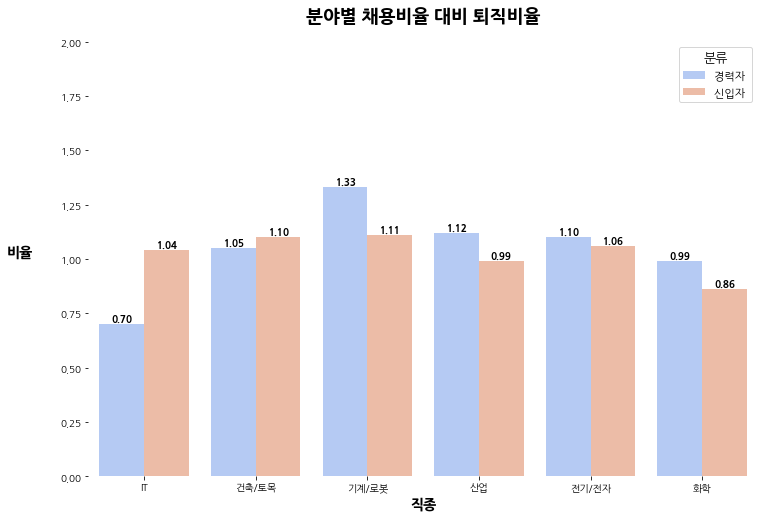

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 리셋 및 Melt 변환
df_melted = rate_teoi.reset_index().melt(id_vars='index', var_name='분류', value_name='비율')
df_melted.rename(columns={'index': '분야'}, inplace=True)

# 그래프 그리기
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='분야', y='비율', hue='분류', data=df_melted, palette='coolwarm')

# 그래프 제목 및 축 레이블 설정
plt.title('분야별 채용비율 대비 퇴직비율', fontsize=18, weight='bold', pad=20)
plt.xlabel('직종', fontsize=14, weight='bold')
plt.ylabel('비율', fontsize=14, weight='bold',rotation=0,labelpad=40)

# Y축 범위 넓히기
plt.ylim(0, 2)

# 주석 달기
for p in bar_plot.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    bar_plot.annotate(f'{height:.2f}', (x, height), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=10,\
                      color='black', weight='bold')

# 범례 설정 및 위치 조정
plt.legend(title='분류', title_fontsize='13', fontsize='11', loc='upper right')

# 그래프 테두리 설정
sns.despine(left=True, bottom=True)

# 그래프 표시
plt.show()


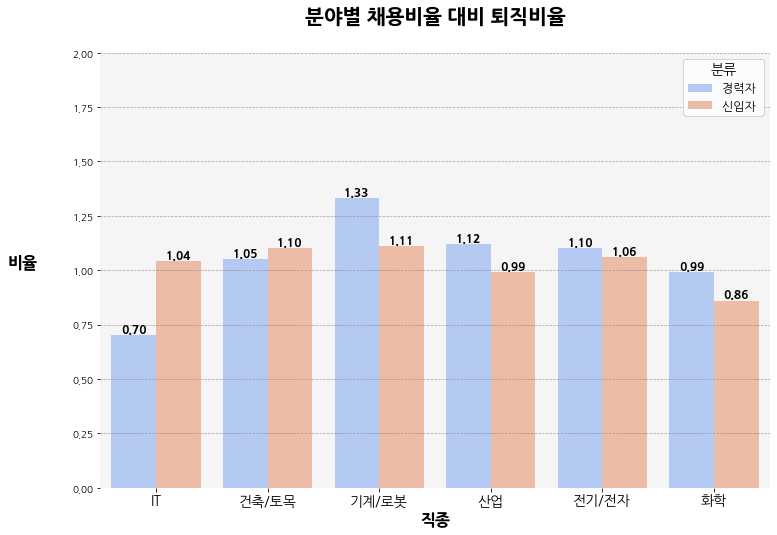

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 리셋 및 Melt 변환
df_melted = rate_teoi.reset_index().melt(id_vars='index', var_name='분류', value_name='비율')
df_melted.rename(columns={'index': '분야'}, inplace=True)

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 배경 색상 설정
plt.gca().set_facecolor('#f5f5f5')

# 격자 추가
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# 막대 그래프
bar_plot = sns.barplot(x='분야', y='비율', hue='분류', data=df_melted, palette='coolwarm')

# 그래프 제목 및 축 레이블 설정
plt.title('분야별 채용비율 대비 퇴직비율', fontsize=20, weight='bold', pad=30)
plt.xlabel('직종', fontsize=16, weight='bold')
plt.ylabel('비율', fontsize=16, weight='bold', rotation=0, labelpad=50)

# Y축 범위 넓히기
plt.ylim(0, 2)

plt.xticks(fontsize=14, ha='center')  

# 주석 달기
for p in bar_plot.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    bar_plot.annotate(f'{height:.2f}', (x, height), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=12, color='black', weight='bold')

# 범례 설정 및 위치 조정
plt.legend(title='분류', title_fontsize='14', fontsize='12', loc='upper right')

# 그래프 테두리 설정
sns.despine(left=True, bottom=True)

# 그래프 표시
plt.show()


1. 그래프 개요
이 그래프는 다양한 분야에서 채용된 후 채용비율 대비 퇴직비율을 보여줍니다. 
취업준비생이 어느 분야에 진출할지 결정할 때, 해당 분야의 직무 안정성과 직업 만족도를 이해하는 데 도움이 될 것입니다.
그래프에서 1% 이상이라면 채용대비 퇴직률이 높은 것을 의미하고, 1% 이하라면 채용대비 퇴직률이 낮은 것을 의미합니다. 


2. 주요 메시지
ㆍIT 분야 (경력자): IT 분야의 경력자들은 퇴직 비율이 0.70%로 가장 낮습니다.   
    이는 IT 분야에서 경력을 쌓는다면 상대적으로 안정적이고 지속적인 직무를 유지할 수 있는 가능성이 높다는 것을 의미합니다.
    IT 분야에서의 커리어는 비교적 안정적일 수 있으니, 기술적 역량을 강화하여 이 분야에서의 기회를 노려보는 것이 좋습니다.

ㆍ기계/로봇 분야 (경력자): 반면, 기계/로봇 분야의 경력자들은 퇴직 비율이 1.33%로 높습니다. 
    이 분야에 진출할 경우, 지속적으로 새로운 기회나 자기계발의 필요성이 클 수 있습니다.
    이 분야에서 경력을 쌓고자 한다면, 변화에 대비할 수 있는 유연성과 끊임없는 학습이 중요할 것입니다.

ㆍ화학 분야 (신입자): 산업 분야의 신입자 퇴직 비율은 0.86%로, 신입자들이 안정적으로 직무에 적응하고 있음을 나타냅니다. 
    즉, 처음부터 안정적인 환경에서 커리어를 시작하고 싶은 분들에게 적합할 수 있는 분야입니다.

ㆍ건축/토목 및 전기/전자: 이 분야들에서는 경력자와 신입자 모두 비슷한 수준의 퇴직 비율을 보여주고 있습니다. 
    이는 이 분야들이 비교적 안정적인 커리어 기회를 제공할 수 있음을 시사합니다. 
    이 분야에 관심이 있는 분들은 안정적인 직업을 가질 가능성이 큽니다.



3. 조언 및 전략
  ① 직무 안정성을 고려: 여러분이 관심 있는 분야에서 얼마나 안정적으로 직무를 유지할 수 있는지를 이 그래프에서 확인할 수 있습니다. 
     퇴직 비율이 낮은 분야를 선택하면, 첫 직장에서 오랫동안 경험을 쌓을 수 있는 가능성이 높습니다.

  ② 변화에 대비: 퇴직 비율이 높은 분야를 선택한다면, 커리어 내에서 다양한 변화에 대비할 수 있는 전략이 필요합니다.
     끊임없는 자기계발과 네트워킹이 중요할 것입니다.

  ③ 커리어 초기 단계에서의 선택: 신입자로서 처음 선택하는 분야는 취준생의 커리어 방향에 큰 영향을 미칠 수 있습니다. 
     안정적인 환경에서 시작하고 싶다면, 퇴직 비율이 낮은 분야를 고려하는 것이 좋습니다.


4. 결론
이 그래프는 취업을 준비하고 있는 분들이 진출하려는 분야에서의 커리어 전망을 이해하는 데 중요한 통찰력을 제공합니다. 
어떤 분야가 가장 적합한지 고민할 때, 직무 안정성과 성장 가능성을 함께 고려하는 것이 좋겠습니다. 

In [112]:
import pandas as pd

xlsx = '2022년 학과별 고등교육기관 취업통계_20240112.xlsx' 

df22 = pd.read_excel(xlsx, header=4)


df22 = df22.reset_index(drop=True)

df22
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '공학계열')]

sorted_illsa_df22 = illsa_df22.sort_values('취업률_계', ascending=False)

max_illsa_df22 = sorted_illsa_df22[['대계열','학과명','취업률_계','학제']]

max_illsa_df22 = max_illsa_df22.reset_index(drop=True)

max_illsa_df23=max_illsa_df22['취업률_계'].mean()
max_illsa_df23
illsa_df24 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '자연계열')]

sorted_illsa_df24 = illsa_df24.sort_values('취업률_계', ascending=False)

max_illsa_df24 = sorted_illsa_df24[['대계열','학과명','취업률_계','학제']]

max_illsa_df24 = max_illsa_df24.reset_index(drop=True)

max_illsa_df24=max_illsa_df24['취업률_계'].mean()
illsa_df25 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '예체능계열')]

sorted_illsa_df25 = illsa_df25.sort_values('취업률_계', ascending=False)

max_illsa_df25 = sorted_illsa_df25[['대계열','학과명','취업률_계','학제']]

max_illsa_df25 = max_illsa_df25.reset_index(drop=True)

max_illsa_df25=max_illsa_df25['취업률_계'].mean()
max_illsa_df25
illsa_df26 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '사회계열')]

sorted_illsa_df26 = illsa_df26.sort_values('취업률_계', ascending=False)

max_illsa_df26 = sorted_illsa_df26[['대계열','학과명','취업률_계','학제']]

max_illsa_df26 = max_illsa_df26.reset_index(drop=True)

max_illsa_df26=max_illsa_df26['취업률_계'].mean()
max_illsa_df26
illsa_df27 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '인문계열')]

sorted_illsa_df27 = illsa_df27.sort_values('취업률_계', ascending=False)

max_illsa_df27 = sorted_illsa_df27[['대계열','학과명','취업률_계','학제']]

max_illsa_df27 = max_illsa_df27.reset_index(drop=True)

max_illsa_df27=max_illsa_df27['취업률_계'].mean()
max_illsa_df27
illsa_df28 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '의약계열')]

sorted_illsa_df28 = illsa_df28.sort_values('취업률_계', ascending=False)

max_illsa_df28 = sorted_illsa_df28[['대계열','학과명','취업률_계','학제']]

max_illsa_df28 = max_illsa_df28.reset_index(drop=True)

max_illsa_df28=max_illsa_df28['취업률_계'].mean()
illsa_df29 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['대계열'] == '교육계열')]

sorted_illsa_df29 = illsa_df29.sort_values('취업률_계', ascending=False)

max_illsa_df29 = sorted_illsa_df29[['대계열','학과명','취업률_계','학제']]

max_illsa_df29 = max_illsa_df29.reset_index(drop=True)

max_illsa_df29=max_illsa_df29['취업률_계'].mean()
max_illsa_df29

max_illsa_df21=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df23,'자연계열':max_illsa_df24,'예체능계열':max_illsa_df25,'사회계열':max_illsa_df26,'인문계열':max_illsa_df27,'의약계열':max_illsa_df28,'교육계열':max_illsa_df29},
    '년도':2022
})
max_illsa_df21

,학과별 취업률,년도
공학계열,70.30,2022
교육계열,48.49,2022
사회계열,65.28,2022
예체능계열,66.09,2022
의약계열,83.88,2022
인문계열,58.54,2022
자연계열,62.35,2022


In [113]:
import pandas as pd

xlsx = '2021년 학과별 고등교육기관 취업통계.xlsx' 

df23 = pd.read_excel(xlsx, header=4)


df23 = df23.reset_index(drop=True)

df23
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df32 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['대계열'] == '공학계열')]

sorted_illsa_df32 = illsa_df32.sort_values('취업률_계', ascending=False)

max_illsa_df32 = sorted_illsa_df32[['대계열','학과명','취업률_계','학제']]

max_illsa_df32 = max_illsa_df32.reset_index(drop=True)

max_illsa_df33=max_illsa_df32['취업률_계'].mean()
max_illsa_df33
illsa_df34 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['대계열'] == '자연계열')]

sorted_illsa_df34 = illsa_df34.sort_values('취업률_계', ascending=False)

max_illsa_df34 = sorted_illsa_df34[['대계열','학과명','취업률_계','학제']]

max_illsa_df34 = max_illsa_df34.reset_index(drop=True)

max_illsa_df34=max_illsa_df34['취업률_계'].mean()
illsa_df35 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['대계열'] == '예체능계열')]

sorted_illsa_df35 = illsa_df35.sort_values('취업률_계', ascending=False)

max_illsa_df35 = sorted_illsa_df35[['대계열','학과명','취업률_계','학제']]

max_illsa_df35 = max_illsa_df35.reset_index(drop=True)

max_illsa_df35=max_illsa_df35['취업률_계'].mean()
max_illsa_df35

illsa_df36 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['대계열'] == '사회계열')]

sorted_illsa_df36 = illsa_df36.sort_values('취업률_계', ascending=False)

max_illsa_df36 = sorted_illsa_df36[['대계열','학과명','취업률_계','학제']]

max_illsa_df36 = max_illsa_df36.reset_index(drop=True)

max_illsa_df36=max_illsa_df36['취업률_계'].mean()
max_illsa_df36
illsa_df37 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['대계열'] == '인문계열')]

sorted_illsa_df37 = illsa_df37.sort_values('취업률_계', ascending=False)

max_illsa_df37 = sorted_illsa_df37[['대계열','학과명','취업률_계','학제']]

max_illsa_df37 = max_illsa_df37.reset_index(drop=True)

max_illsa_df37=max_illsa_df37['취업률_계'].mean()
max_illsa_df37
illsa_df38 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['대계열'] == '의약계열')]

sorted_illsa_df38 = illsa_df38.sort_values('취업률_계', ascending=False)

max_illsa_df38 = sorted_illsa_df38[['대계열','학과명','취업률_계','학제']]

max_illsa_df38 = max_illsa_df38.reset_index(drop=True)

max_illsa_df38=max_illsa_df38['취업률_계'].mean()
illsa_df39 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['대계열'] == '교육계열')]

sorted_illsa_df39 = illsa_df39.sort_values('취업률_계', ascending=False)

max_illsa_df39 = sorted_illsa_df39[['대계열','학과명','취업률_계','학제']]

max_illsa_df39 = max_illsa_df39.reset_index(drop=True)

max_illsa_df39=max_illsa_df39['취업률_계'].mean()
max_illsa_df39

max_illsa_df31=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df33,'자연계열':max_illsa_df34,'예체능계열':max_illsa_df35,'사회계열':max_illsa_df36,'인문계열':max_illsa_df37,'의약계열':max_illsa_df38,'교육계열':max_illsa_df39},
    '년도':2021
})
max_illsa_df31

,학과별 취업률,년도
공학계열,68.40,2021
교육계열,46.16,2021
사회계열,62.67,2021
예체능계열,64.91,2021
의약계열,82.36,2021
인문계열,55.60,2021
자연계열,60.48,2021


In [114]:
import pandas as pd

xlsx = '2020년 학과별 고등교육기관 취업통계.xlsx' 

df20 = pd.read_excel(xlsx, header=4)


df20 = df20.reset_index(drop=True)

df20
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df42 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['대계열'] == '공학계열')]

sorted_illsa_df42 = illsa_df42.sort_values('취업률_계', ascending=False)

max_illsa_df42 = sorted_illsa_df42[['대계열','학과명','취업률_계','학제']]

max_illsa_df42 = max_illsa_df42.reset_index(drop=True)

max_illsa_df43=max_illsa_df42['취업률_계'].mean()
max_illsa_df43
illsa_df44 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['대계열'] == '자연계열')]

sorted_illsa_df44 = illsa_df44.sort_values('취업률_계', ascending=False)

max_illsa_df44 = sorted_illsa_df44[['대계열','학과명','취업률_계','학제']]

max_illsa_df44 = max_illsa_df44.reset_index(drop=True)

max_illsa_df44=max_illsa_df44['취업률_계'].mean()
illsa_df45 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['대계열'] == '예체능계열')]

sorted_illsa_df45 = illsa_df45.sort_values('취업률_계', ascending=False)

max_illsa_df45 = sorted_illsa_df45[['대계열','학과명','취업률_계','학제']]

max_illsa_df45 = max_illsa_df45.reset_index(drop=True)

max_illsa_df45=max_illsa_df45['취업률_계'].mean()
max_illsa_df45

illsa_df46 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['대계열'] == '사회계열')]

sorted_illsa_df46 = illsa_df46.sort_values('취업률_계', ascending=False)

max_illsa_df46 = sorted_illsa_df46[['대계열','학과명','취업률_계','학제']]

max_illsa_df46 = max_illsa_df46.reset_index(drop=True)

max_illsa_df46=max_illsa_df46['취업률_계'].mean()
max_illsa_df46
illsa_df47 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['대계열'] == '인문계열')]

sorted_illsa_df47 = illsa_df47.sort_values('취업률_계', ascending=False)

max_illsa_df47 = sorted_illsa_df47[['대계열','학과명','취업률_계','학제']]

max_illsa_df47 = max_illsa_df47.reset_index(drop=True)

max_illsa_df47=max_illsa_df47['취업률_계'].mean()
max_illsa_df47
illsa_df48 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['대계열'] == '의약계열')]

sorted_illsa_df48 = illsa_df48.sort_values('취업률_계', ascending=False)

max_illsa_df48 = sorted_illsa_df48[['대계열','학과명','취업률_계','학제']]

max_illsa_df48 = max_illsa_df48.reset_index(drop=True)

max_illsa_df48=max_illsa_df48['취업률_계'].mean()
illsa_df49 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['대계열'] == '교육계열')]

sorted_illsa_df49 = illsa_df49.sort_values('취업률_계', ascending=False)

max_illsa_df49 = sorted_illsa_df49[['대계열','학과명','취업률_계','학제']]

max_illsa_df49 = max_illsa_df49.reset_index(drop=True)

max_illsa_df49=max_illsa_df49['취업률_계'].mean()
max_illsa_df49

max_illsa_df41=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df43,'자연계열':max_illsa_df44,'예체능계열':max_illsa_df45,'사회계열':max_illsa_df46,'인문계열':max_illsa_df47,'의약계열':max_illsa_df48,'교육계열':max_illsa_df49},
    '년도':2020
})
max_illsa_df41

,학과별 취업률,년도
공학계열,65.49,2020
교육계열,45.14,2020
사회계열,59.32,2020
예체능계열,60.06,2020
의약계열,82.63,2020
인문계열,52.51,2020
자연계열,58.10,2020


In [115]:
import pandas as pd

xlsx = '2019년 학과별 고등교육기관 취업통계.xlsx' 

df19 = pd.read_excel(xlsx, header=4)


df19 = df19.reset_index(drop=True)

df19
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df52 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['대계열'] == '공학계열')]

sorted_illsa_df52 = illsa_df52.sort_values('취업률_계', ascending=False)

max_illsa_df52 = sorted_illsa_df52[['대계열','학과명','취업률_계','학제']]

max_illsa_df52 = max_illsa_df52.reset_index(drop=True)

max_illsa_df53=max_illsa_df52['취업률_계'].mean()
max_illsa_df53
illsa_df54 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['대계열'] == '자연계열')]

sorted_illsa_df54 = illsa_df54.sort_values('취업률_계', ascending=False)

max_illsa_df54 = sorted_illsa_df54[['대계열','학과명','취업률_계','학제']]

max_illsa_df54 = max_illsa_df54.reset_index(drop=True)

max_illsa_df54=max_illsa_df54['취업률_계'].mean()
illsa_df55 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['대계열'] == '예체능계열')]

sorted_illsa_df55 = illsa_df55.sort_values('취업률_계', ascending=False)

max_illsa_df55 = sorted_illsa_df55[['대계열','학과명','취업률_계','학제']]

max_illsa_df55 = max_illsa_df55.reset_index(drop=True)

max_illsa_df55=max_illsa_df55['취업률_계'].mean()
max_illsa_df55

illsa_df56 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['대계열'] == '사회계열')]

sorted_illsa_df56 = illsa_df56.sort_values('취업률_계', ascending=False)

max_illsa_df56 = sorted_illsa_df56[['대계열','학과명','취업률_계','학제']]

max_illsa_df56 = max_illsa_df56.reset_index(drop=True)

max_illsa_df56=max_illsa_df56['취업률_계'].mean()
max_illsa_df56
illsa_df57 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['대계열'] == '인문계열')]

sorted_illsa_df57 = illsa_df57.sort_values('취업률_계', ascending=False)

max_illsa_df57 = sorted_illsa_df57[['대계열','학과명','취업률_계','학제']]

max_illsa_df57 = max_illsa_df57.reset_index(drop=True)

max_illsa_df57=max_illsa_df57['취업률_계'].mean()
max_illsa_df57
illsa_df58 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['대계열'] == '의약계열')]

sorted_illsa_df58 = illsa_df58.sort_values('취업률_계', ascending=False)

max_illsa_df58 = sorted_illsa_df58[['대계열','학과명','취업률_계','학제']]

max_illsa_df58 = max_illsa_df58.reset_index(drop=True)

max_illsa_df58=max_illsa_df58['취업률_계'].mean()
illsa_df59 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['대계열'] == '교육계열')]

sorted_illsa_df59 = illsa_df59.sort_values('취업률_계', ascending=False)

max_illsa_df59 = sorted_illsa_df59[['대계열','학과명','취업률_계','학제']]

max_illsa_df59 = max_illsa_df59.reset_index(drop=True)

max_illsa_df59=max_illsa_df59['취업률_계'].mean()
max_illsa_df59

max_illsa_df51=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df53,'자연계열':max_illsa_df54,'예체능계열':max_illsa_df55,'사회계열':max_illsa_df56,'인문계열':max_illsa_df57,'의약계열':max_illsa_df58,'교육계열':max_illsa_df59},
    '년도':2019
})
max_illsa_df51

,학과별 취업률,년도
공학계열,69.26,2019
교육계열,45.20,2019
사회계열,62.18,2019
예체능계열,62.54,2019
의약계열,81.07,2019
인문계열,55.80,2019
자연계열,58.23,2019


In [116]:
import pandas as pd

xlsx = '2018년 학과별 고등교육기관 졸업자 취업통계.xlsx' 

df18 = pd.read_excel(xlsx, header=4)


df18 = df18.reset_index(drop=True)

df18
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df62 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '공학계열')]

sorted_illsa_df62 = illsa_df62.sort_values('취업률_계', ascending=False)

max_illsa_df62 = sorted_illsa_df62[['대계열','학과명','취업률_계','학제']]

max_illsa_df62 = max_illsa_df62.reset_index(drop=True)

max_illsa_df63=max_illsa_df62['취업률_계'].mean()
max_illsa_df63
illsa_df64 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '자연계열')]

sorted_illsa_df64 = illsa_df64.sort_values('취업률_계', ascending=False)

max_illsa_df64 = sorted_illsa_df64[['대계열','학과명','취업률_계','학제']]

max_illsa_df64 = max_illsa_df64.reset_index(drop=True)

max_illsa_df64=max_illsa_df64['취업률_계'].mean()
illsa_df65 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '예체능계열')]

sorted_illsa_df65 = illsa_df65.sort_values('취업률_계', ascending=False)

max_illsa_df65 = sorted_illsa_df65[['대계열','학과명','취업률_계','학제']]

max_illsa_df65 = max_illsa_df65.reset_index(drop=True)

max_illsa_df65=max_illsa_df65['취업률_계'].mean()
max_illsa_df65


# max_illsa_df66
illsa_df66 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '사회계열')]

sorted_illsa_df66 = illsa_df66.sort_values('취업률_계', ascending=False)

max_illsa_df66 = sorted_illsa_df66[['대계열','학과명','취업률_계','학제']]

max_illsa_df66 = max_illsa_df66.reset_index(drop=True)

max_illsa_df66=max_illsa_df66['취업률_계'].mean()
max_illsa_df66
illsa_df67 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '인문계열')]

sorted_illsa_df67 = illsa_df67.sort_values('취업률_계', ascending=False)

max_illsa_df67 = sorted_illsa_df67[['대계열','학과명','취업률_계','학제']]

max_illsa_df67 = max_illsa_df67.reset_index(drop=True)

max_illsa_df67=max_illsa_df67['취업률_계'].mean()
max_illsa_df67
illsa_df68 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '의약계열')]

sorted_illsa_df68 = illsa_df68.sort_values('취업률_계', ascending=False)

max_illsa_df68 = sorted_illsa_df68[['대계열','학과명','취업률_계','학제']]

max_illsa_df68 = max_illsa_df68.reset_index(drop=True)

max_illsa_df68=max_illsa_df68['취업률_계'].mean()
illsa_df69 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '교육계열')]

sorted_illsa_df69 = illsa_df69.sort_values('취업률_계', ascending=False)

max_illsa_df69 = sorted_illsa_df69[['대계열','학과명','취업률_계','학제']]

max_illsa_df69 = max_illsa_df69.reset_index(drop=True)

max_illsa_df69=max_illsa_df69['취업률_계'].mean()
max_illsa_df69

max_illsa_df61=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df63,'자연계열':max_illsa_df64,'예체능계열':max_illsa_df65,'사회계열':max_illsa_df66,'인문계열':max_illsa_df67,'의약계열':max_illsa_df68,'교육계열':max_illsa_df69},
    '년도':2018
})
max_illsa_df61

,학과별 취업률,년도
공학계열,70.72,2018
교육계열,45.37,2018
사회계열,62.97,2018
예체능계열,62.34,2018
의약계열,81.74,2018
인문계열,54.95,2018
자연계열,59.70,2018


In [117]:
import pandas as pd

xlsx = '2017년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df17 = pd.read_excel(xlsx, header=4)


df17 = df17.reset_index(drop=True)

df17
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df72 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['대계열'] == '공학계열')]

sorted_illsa_df72 = illsa_df72.sort_values('취업률_계', ascending=False)

max_illsa_df72 = sorted_illsa_df72[['대계열','학과명','취업률_계','학제']]

max_illsa_df72 = max_illsa_df72.reset_index(drop=True)

max_illsa_df73=max_illsa_df72['취업률_계'].mean()
max_illsa_df73
illsa_df74 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['대계열'] == '자연계열')]

sorted_illsa_df74 = illsa_df74.sort_values('취업률_계', ascending=False)

max_illsa_df74 = sorted_illsa_df74[['대계열','학과명','취업률_계','학제']]

max_illsa_df74 = max_illsa_df74.reset_index(drop=True)

max_illsa_df74=max_illsa_df74['취업률_계'].mean()
illsa_df75 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['대계열'] == '예체능계열')]

sorted_illsa_df75 = illsa_df75.sort_values('취업률_계', ascending=False)

max_illsa_df75 = sorted_illsa_df75[['대계열','학과명','취업률_계','학제']]

max_illsa_df75 = max_illsa_df75.reset_index(drop=True)

max_illsa_df75=max_illsa_df75['취업률_계'].mean()
max_illsa_df75


illsa_df76 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['대계열'] == '사회계열')]

sorted_illsa_df76 = illsa_df76.sort_values('취업률_계', ascending=False)

max_illsa_df76 = sorted_illsa_df76[['대계열','학과명','취업률_계','학제']]

max_illsa_df76 = max_illsa_df76.reset_index(drop=True)

max_illsa_df76=max_illsa_df76['취업률_계'].mean()
max_illsa_df76
illsa_df77 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['대계열'] == '인문계열')]

sorted_illsa_df77 = illsa_df77.sort_values('취업률_계', ascending=False)

max_illsa_df77 = sorted_illsa_df77[['대계열','학과명','취업률_계','학제']]

max_illsa_df77 = max_illsa_df77.reset_index(drop=True)

max_illsa_df77=max_illsa_df77['취업률_계'].mean()
max_illsa_df77
illsa_df78 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['대계열'] == '의약계열')]

sorted_illsa_df78 = illsa_df78.sort_values('취업률_계', ascending=False)

max_illsa_df78 = sorted_illsa_df78[['대계열','학과명','취업률_계','학제']]

max_illsa_df78 = max_illsa_df78.reset_index(drop=True)

max_illsa_df78=max_illsa_df78['취업률_계'].mean()
illsa_df79 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['대계열'] == '교육계열')]

sorted_illsa_df79 = illsa_df79.sort_values('취업률_계', ascending=False)

max_illsa_df79 = sorted_illsa_df79[['대계열','학과명','취업률_계','학제']]

max_illsa_df79 = max_illsa_df79.reset_index(drop=True)

max_illsa_df79=max_illsa_df79['취업률_계'].mean()
max_illsa_df79

max_illsa_df71=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df73,'자연계열':max_illsa_df74,'예체능계열':max_illsa_df75,'사회계열':max_illsa_df76,'인문계열':max_illsa_df77,'의약계열':max_illsa_df78,'교육계열':max_illsa_df79},
    '년도':2017
})
max_illsa_df71

,학과별 취업률,년도
공학계열,69.00,2017
교육계열,45.75,2017
사회계열,61.17,2017
예체능계열,60.28,2017
의약계열,82.37,2017
인문계열,53.97,2017
자연계열,57.93,2017


In [118]:
import pandas as pd

xlsx = '2016년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df16 = pd.read_excel(xlsx, header=4)


df16 = df16.reset_index(drop=True)

df16
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df82 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['대계열'] == '공학계열')]

sorted_illsa_df82 = illsa_df82.sort_values('취업률_계', ascending=False)

max_illsa_df82 = sorted_illsa_df82[['대계열','학과명','취업률_계','학제']]

max_illsa_df82 = max_illsa_df82.reset_index(drop=True)

max_illsa_df83=max_illsa_df82['취업률_계'].mean()
max_illsa_df83
illsa_df84 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['대계열'] == '자연계열')]

sorted_illsa_df84 = illsa_df84.sort_values('취업률_계', ascending=False)

max_illsa_df84 = sorted_illsa_df84[['대계열','학과명','취업률_계','학제']]

max_illsa_df84 = max_illsa_df84.reset_index(drop=True)

max_illsa_df84=max_illsa_df84['취업률_계'].mean()
illsa_df85 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['대계열'] == '예체능계열')]

sorted_illsa_df85 = illsa_df85.sort_values('취업률_계', ascending=False)

max_illsa_df85 = sorted_illsa_df85[['대계열','학과명','취업률_계','학제']]

max_illsa_df85 = max_illsa_df85.reset_index(drop=True)

max_illsa_df85=max_illsa_df85['취업률_계'].mean()
max_illsa_df85

illsa_df86 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['대계열'] == '사회계열')]

sorted_illsa_df86 = illsa_df86.sort_values('취업률_계', ascending=False)

max_illsa_df86 = sorted_illsa_df86[['대계열','학과명','취업률_계','학제']]

max_illsa_df86 = max_illsa_df86.reset_index(drop=True)

max_illsa_df86=max_illsa_df86['취업률_계'].mean()
max_illsa_df86
illsa_df87 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['대계열'] == '인문계열')]

sorted_illsa_df87 = illsa_df87.sort_values('취업률_계', ascending=False)

max_illsa_df87 = sorted_illsa_df87[['대계열','학과명','취업률_계','학제']]

max_illsa_df87 = max_illsa_df87.reset_index(drop=True)

max_illsa_df87=max_illsa_df87['취업률_계'].mean()
max_illsa_df77
illsa_df88 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['대계열'] == '의약계열')]

sorted_illsa_df88 = illsa_df88.sort_values('취업률_계', ascending=False)

max_illsa_df88 = sorted_illsa_df88[['대계열','학과명','취업률_계','학제']]

max_illsa_df88 = max_illsa_df88.reset_index(drop=True)

max_illsa_df88=max_illsa_df88['취업률_계'].mean()
illsa_df89 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['대계열'] == '교육계열')]

sorted_illsa_df89 = illsa_df89.sort_values('취업률_계', ascending=False)

max_illsa_df89 = sorted_illsa_df89[['대계열','학과명','취업률_계','학제']]

max_illsa_df89 = max_illsa_df89.reset_index(drop=True)

max_illsa_df89=max_illsa_df89['취업률_계'].mean()
max_illsa_df89

max_illsa_df81=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df83,'자연계열':max_illsa_df84,'예체능계열':max_illsa_df85,'사회계열':max_illsa_df86,'인문계열':max_illsa_df87,'의약계열':max_illsa_df88,'교육계열':max_illsa_df89},
    '년도':2016
})
max_illsa_df81

,학과별 취업률,년도
공학계열,70.88,2016
교육계열,45.32,2016
사회계열,64.31,2016
예체능계열,61.94,2016
의약계열,82.36,2016
인문계열,57.07,2016
자연계열,59.14,2016


In [119]:
import pandas as pd

xlsx = '2015년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df15 = pd.read_excel(xlsx, header=4)


df15 = df15.reset_index(drop=True)

df15
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df92 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['대계열'] == '공학계열')]

sorted_illsa_df92 = illsa_df92.sort_values('취업률_계', ascending=False)

max_illsa_df92 = sorted_illsa_df92[['대계열','학과명','취업률_계','학제']]

max_illsa_df92 = max_illsa_df92.reset_index(drop=True)

max_illsa_df93=max_illsa_df92['취업률_계'].mean()
max_illsa_df93
illsa_df94 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['대계열'] == '자연계열')]

sorted_illsa_df94 = illsa_df94.sort_values('취업률_계', ascending=False)

max_illsa_df94 = sorted_illsa_df94[['대계열','학과명','취업률_계','학제']]

max_illsa_df94 = max_illsa_df94.reset_index(drop=True)

max_illsa_df94=max_illsa_df94['취업률_계'].mean()
illsa_df95 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['대계열'] == '예체능계열')]

sorted_illsa_df95 = illsa_df95.sort_values('취업률_계', ascending=False)

max_illsa_df95 = sorted_illsa_df95[['대계열','학과명','취업률_계','학제']]

max_illsa_df95 = max_illsa_df95.reset_index(drop=True)

max_illsa_df95=max_illsa_df95['취업률_계'].mean()
max_illsa_df95

illsa_df96 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['대계열'] == '사회계열')]

sorted_illsa_df96 = illsa_df96.sort_values('취업률_계', ascending=False)

max_illsa_df96 = sorted_illsa_df96[['대계열','학과명','취업률_계','학제']]

max_illsa_df96 = max_illsa_df96.reset_index(drop=True)

max_illsa_df96=max_illsa_df96['취업률_계'].mean()
max_illsa_df96
illsa_df97 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['대계열'] == '인문계열')]

sorted_illsa_df97 = illsa_df97.sort_values('취업률_계', ascending=False)

max_illsa_df97 = sorted_illsa_df97[['대계열','학과명','취업률_계','학제']]

max_illsa_df97 = max_illsa_df97.reset_index(drop=True)

max_illsa_df97=max_illsa_df97['취업률_계'].mean()
max_illsa_df97
illsa_df98 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['대계열'] == '의약계열')]

sorted_illsa_df98 = illsa_df98.sort_values('취업률_계', ascending=False)

max_illsa_df98 = sorted_illsa_df98[['대계열','학과명','취업률_계','학제']]

max_illsa_df98 = max_illsa_df98.reset_index(drop=True)

max_illsa_df98=max_illsa_df98['취업률_계'].mean()
illsa_df99 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['대계열'] == '교육계열')]

sorted_illsa_df99 = illsa_df99.sort_values('취업률_계', ascending=False)

max_illsa_df99 = sorted_illsa_df99[['대계열','학과명','취업률_계','학제']]

max_illsa_df99 = max_illsa_df99.reset_index(drop=True)

max_illsa_df99=max_illsa_df99['취업률_계'].mean()
max_illsa_df99

max_illsa_df91=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df93,'자연계열':max_illsa_df94,'예체능계열':max_illsa_df95,'사회계열':max_illsa_df96,'인문계열':max_illsa_df97,'의약계열':max_illsa_df98,'교육계열':max_illsa_df99},
    '년도':2015
})
max_illsa_df91

,학과별 취업률,년도
공학계열,72.01,2015
교육계열,47.21,2015
사회계열,63.74,2015
예체능계열,59.91,2015
의약계열,80.67,2015
인문계열,56.16,2015
자연계열,59.60,2015


In [120]:
import pandas as pd

xlsx = '2014년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df14 = pd.read_excel(xlsx, header=4)


df14 = df14.reset_index(drop=True)

df14
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df102 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['대계열'] == '공학계열')]

sorted_illsa_df102 = illsa_df102.sort_values('취업률_계', ascending=False)

max_illsa_df102 = sorted_illsa_df102[['대계열','학과명','취업률_계','학제']]

max_illsa_df102 = max_illsa_df102.reset_index(drop=True)

max_illsa_df103=max_illsa_df102['취업률_계'].mean()
max_illsa_df103
illsa_df104 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['대계열'] == '자연계열')]

sorted_illsa_df104 = illsa_df104.sort_values('취업률_계', ascending=False)

max_illsa_df104 = sorted_illsa_df104[['대계열','학과명','취업률_계','학제']]

max_illsa_df104 = max_illsa_df104.reset_index(drop=True)

max_illsa_df104=max_illsa_df104['취업률_계'].mean()
illsa_df105 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['대계열'] == '예체능계열')]

sorted_illsa_df105 = illsa_df105.sort_values('취업률_계', ascending=False)

max_illsa_df105 = sorted_illsa_df105[['대계열','학과명','취업률_계','학제']]

max_illsa_df105 = max_illsa_df105.reset_index(drop=True)

max_illsa_df105=max_illsa_df105['취업률_계'].mean()
max_illsa_df105

illsa_df106 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['대계열'] == '사회계열')]

sorted_illsa_df106 = illsa_df106.sort_values('취업률_계', ascending=False)

max_illsa_df106 = sorted_illsa_df106[['대계열','학과명','취업률_계','학제']]

max_illsa_df106 = max_illsa_df106.reset_index(drop=True)

max_illsa_df106=max_illsa_df106['취업률_계'].mean()
max_illsa_df106
illsa_df107 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['대계열'] == '인문계열')]

sorted_illsa_df107 = illsa_df107.sort_values('취업률_계', ascending=False)

max_illsa_df107 = sorted_illsa_df107[['대계열','학과명','취업률_계','학제']]

max_illsa_df107 = max_illsa_df107.reset_index(drop=True)

max_illsa_df107=max_illsa_df107['취업률_계'].mean()
max_illsa_df107
illsa_df108 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['대계열'] == '의약계열')]

sorted_illsa_df108 = illsa_df108.sort_values('취업률_계', ascending=False)

max_illsa_df108 = sorted_illsa_df108[['대계열','학과명','취업률_계','학제']]

max_illsa_df108 = max_illsa_df108.reset_index(drop=True)

max_illsa_df108=max_illsa_df108['취업률_계'].mean()
illsa_df109 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['대계열'] == '교육계열')]

sorted_illsa_df109 = illsa_df109.sort_values('취업률_계', ascending=False)

max_illsa_df109 = sorted_illsa_df109[['대계열','학과명','취업률_계','학제']]

max_illsa_df109 = max_illsa_df109.reset_index(drop=True)

max_illsa_df109=max_illsa_df109['취업률_계'].mean()
max_illsa_df109

max_illsa_df101=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df103,'자연계열':max_illsa_df104,'예체능계열':max_illsa_df105,'사회계열':max_illsa_df106,'인문계열':max_illsa_df107,'의약계열':max_illsa_df108,'교육계열':max_illsa_df109},
    '년도':2014
})
max_illsa_df101

,학과별 취업률,년도
공학계열,74.61,2014
교육계열,49.17,2014
사회계열,63.61,2014
예체능계열,59.60,2014
의약계열,79.10,2014
인문계열,56.67,2014
자연계열,60.67,2014


In [121]:
import pandas as pd

xlsx = '2013년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df13 = pd.read_excel(xlsx, header=4)


df13 = df13.reset_index(drop=True)

df13
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df112 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '공학계열')]

sorted_illsa_df112 = illsa_df112.sort_values('취업률_계', ascending=False)

max_illsa_df112 = sorted_illsa_df112[['대계열','학과명','취업률_계','학제']]

max_illsa_df112 = max_illsa_df112.reset_index(drop=True)

max_illsa_df113=max_illsa_df112['취업률_계'].mean()
max_illsa_df113
illsa_df114 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '자연계열')]

sorted_illsa_df114 = illsa_df114.sort_values('취업률_계', ascending=False)

max_illsa_df114 = sorted_illsa_df114[['대계열','학과명','취업률_계','학제']]

max_illsa_df114 = max_illsa_df114.reset_index(drop=True)

max_illsa_df114=max_illsa_df114['취업률_계'].mean()
illsa_df115 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '예체능계열')]

sorted_illsa_df115 = illsa_df115.sort_values('취업률_계', ascending=False)

max_illsa_df115 = sorted_illsa_df115[['대계열','학과명','취업률_계','학제']]

max_illsa_df115 = max_illsa_df115.reset_index(drop=True)

max_illsa_df115=max_illsa_df115['취업률_계'].mean()
max_illsa_df115

illsa_df116 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '사회계열')]

sorted_illsa_df116 = illsa_df116.sort_values('취업률_계', ascending=False)

max_illsa_df116 = sorted_illsa_df116[['대계열','학과명','취업률_계','학제']]

max_illsa_df116 = max_illsa_df116.reset_index(drop=True)

max_illsa_df116=max_illsa_df116['취업률_계'].mean()
max_illsa_df116
illsa_df117 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '인문계열')]

sorted_illsa_df117 = illsa_df117.sort_values('취업률_계', ascending=False)

max_illsa_df117 = sorted_illsa_df117[['대계열','학과명','취업률_계','학제']]

max_illsa_df117 = max_illsa_df117.reset_index(drop=True)

max_illsa_df117=max_illsa_df117['취업률_계'].mean()
max_illsa_df117
illsa_df118 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '의약계열')]

sorted_illsa_df118 = illsa_df118.sort_values('취업률_계', ascending=False)

max_illsa_df118 = sorted_illsa_df118[['대계열','학과명','취업률_계','학제']]

max_illsa_df118 = max_illsa_df118.reset_index(drop=True)

max_illsa_df118=max_illsa_df118['취업률_계'].mean()
illsa_df119 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '교육계열')]

sorted_illsa_df119 = illsa_df119.sort_values('취업률_계', ascending=False)

max_illsa_df119 = sorted_illsa_df119[['대계열','학과명','취업률_계','학제']]

max_illsa_df119 = max_illsa_df119.reset_index(drop=True)

max_illsa_df119=max_illsa_df119['취업률_계'].mean()
max_illsa_df119

max_illsa_df111=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df113,'자연계열':max_illsa_df114,'예체능계열':max_illsa_df115,'사회계열':max_illsa_df116,'인문계열':max_illsa_df117,'의약계열':max_illsa_df118,'교육계열':max_illsa_df119},
    '년도':2013
})
max_illsa_df111

,학과별 취업률,년도
공학계열,76.66,2013
교육계열,53.55,2013
사회계열,63.36,2013
예체능계열,60.81,2013
의약계열,79.93,2013
인문계열,58.74,2013
자연계열,60.59,2013


In [122]:
import pandas as pd

xlsx = '2013년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df13 = pd.read_excel(xlsx, header=4)


df13 = df13.reset_index(drop=True)

df13
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df112 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '공학계열')]

sorted_illsa_df112 = illsa_df112.sort_values('취업률_계', ascending=False)

max_illsa_df112 = sorted_illsa_df112[['대계열','학과명','취업률_계','학제']]

max_illsa_df112 = max_illsa_df112.reset_index(drop=True)

max_illsa_df113=max_illsa_df112['취업률_계'].mean()
max_illsa_df113
illsa_df114 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '자연계열')]

sorted_illsa_df114 = illsa_df114.sort_values('취업률_계', ascending=False)

max_illsa_df114 = sorted_illsa_df114[['대계열','학과명','취업률_계','학제']]

max_illsa_df114 = max_illsa_df114.reset_index(drop=True)

max_illsa_df114=max_illsa_df114['취업률_계'].mean()
illsa_df115 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '예체능계열')]

sorted_illsa_df115 = illsa_df115.sort_values('취업률_계', ascending=False)

max_illsa_df115 = sorted_illsa_df115[['대계열','학과명','취업률_계','학제']]

max_illsa_df115 = max_illsa_df115.reset_index(drop=True)

max_illsa_df115=max_illsa_df115['취업률_계'].mean()
max_illsa_df115

illsa_df116 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '사회계열')]

sorted_illsa_df116 = illsa_df116.sort_values('취업률_계', ascending=False)

max_illsa_df116 = sorted_illsa_df116[['대계열','학과명','취업률_계','학제']]

max_illsa_df116 = max_illsa_df116.reset_index(drop=True)

max_illsa_df116=max_illsa_df116['취업률_계'].mean()
max_illsa_df116
illsa_df117 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '인문계열')]

sorted_illsa_df117 = illsa_df117.sort_values('취업률_계', ascending=False)

max_illsa_df117 = sorted_illsa_df117[['대계열','학과명','취업률_계','학제']]

max_illsa_df117 = max_illsa_df117.reset_index(drop=True)

max_illsa_df117=max_illsa_df117['취업률_계'].mean()
max_illsa_df117
illsa_df118 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '의약계열')]

sorted_illsa_df118 = illsa_df118.sort_values('취업률_계', ascending=False)

max_illsa_df118 = sorted_illsa_df118[['대계열','학과명','취업률_계','학제']]

max_illsa_df118 = max_illsa_df118.reset_index(drop=True)

max_illsa_df118=max_illsa_df118['취업률_계'].mean()
illsa_df119 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['대계열'] == '교육계열')]

sorted_illsa_df119 = illsa_df119.sort_values('취업률_계', ascending=False)

max_illsa_df119 = sorted_illsa_df119[['대계열','학과명','취업률_계','학제']]

max_illsa_df119 = max_illsa_df119.reset_index(drop=True)

max_illsa_df119=max_illsa_df119['취업률_계'].mean()
max_illsa_df119

max_illsa_df111=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df113,'자연계열':max_illsa_df114,'예체능계열':max_illsa_df115,'사회계열':max_illsa_df116,'인문계열':max_illsa_df117,'의약계열':max_illsa_df118,'교육계열':max_illsa_df119},
    '년도':2013
})
max_illsa_df111

,학과별 취업률,년도
공학계열,76.66,2013
교육계열,53.55,2013
사회계열,63.36,2013
예체능계열,60.81,2013
의약계열,79.93,2013
인문계열,58.74,2013
자연계열,60.59,2013


In [123]:
combined_df = pd.concat([max_illsa_df21, max_illsa_df31,max_illsa_df41,max_illsa_df51,max_illsa_df61,max_illsa_df71,max_illsa_df81,max_illsa_df91,max_illsa_df101,max_illsa_df111])
combined_df1=combined_df.sort_values(by='년도')
combined_df1['학과']=combined_df1.index
combined_df1

,학과별 취업률,년도,학과
자연계열,60.59,2013,자연계열
공학계열,76.66,2013,공학계열
교육계열,53.55,2013,교육계열
인문계열,58.74,2013,인문계열
예체능계열,60.81,2013,예체능계열
...,...,...,...
의약계열,83.88,2022,의약계열
예체능계열,66.09,2022,예체능계열
사회계열,65.28,2022,사회계열
교육계열,48.49,2022,교육계열


In [124]:
df_salary=pd.read_excel('계열별직업임금최종본.xlsx')
df_salary1=df_salary[df_salary['계열']=='공학계열']
df_salary2=df_salary1['평균임금'].mean()
df_salary3=df_salary[df_salary['계열']=='자연계열']
df_salary4=df_salary3['평균임금'].mean()
df_salary5=df_salary[df_salary['계열']=='예체능계열']
df_salary6=df_salary5['평균임금'].mean()
df_salary7=df_salary[df_salary['계열']=='인문계열']
df_salary8=df_salary7['평균임금'].mean()
df_salary9=df_salary[df_salary['계열']=='의약계열']
df_salary10=df_salary9['평균임금'].mean()
df_salary11=df_salary[df_salary['계열']=='교육계열']
df_salary12=df_salary11['평균임금'].mean()
df_salary13=df_salary[df_salary['계열']=='사회계열']
df_salary14=df_salary13['평균임금'].mean()

df_k1=df_salary[df_salary['계열']=='공학계열']
df_k2=df_k1['일/가정균형'].mean()
df_k3=df_salary[df_salary['계열']=='자연계열']
df_k4=df_k3['일/가정균형'].mean()
df_k5=df_salary[df_salary['계열']=='예체능계열']
df_k6=df_k5['일/가정균형'].mean()
df_k7=df_salary[df_salary['계열']=='인문계열']
df_k8=df_k7['일/가정균형'].mean()
df_k9=df_salary[df_salary['계열']=='의약계열']
df_k10=df_k9['일/가정균형'].mean()
df_k11=df_salary[df_salary['계열']=='교육계열']
df_k12=df_k11['일/가정균형'].mean()
df_k13=df_salary[df_salary['계열']=='사회계열']
df_k14=df_k13['일/가정균형'].mean()
df_k15=pd.DataFrame({
    '계열별 임금':{'공학계열':df_salary2,'자연계열':df_salary4,'예체능계열':df_salary6,'인문계열':df_salary8,'의약계열':df_salary10,'교육계열':df_salary12,'사회계열':df_salary14},
    '일/가정균형':{'공학계열':df_k2,'자연계열':df_k4,'예체능계열':df_k6,'인문계열':df_k8,'의약계열':df_k10,'교육계열':df_k12,'사회계열':df_k14}
})
df_k15['학과']=df_k15.index
df_k15

,계열별 임금,일/가정균형,학과
공학계열,45223.96,54.00,공학계열
자연계열,44321.67,70.83,자연계열
예체능계열,38404.38,59.38,예체능계열
인문계열,36127.27,75.00,인문계열
의약계열,55884.46,76.92,의약계열
교육계열,45913.00,67.50,교육계열
사회계열,49310.43,64.13,사회계열


In [125]:
merged_df = pd.merge(df_k15, combined_df1, on='학과')
merged_df
# 컬럼 순서 조정
merged_df = merged_df[['학과','학과별 취업률','계열별 임금','일/가정균형','년도']]

merged_df

,학과,학과별 취업률,계열별 임금,일/가정균형,년도
0,공학계열,76.66,45223.96,54.00,2013
1,공학계열,74.61,45223.96,54.00,2014
2,공학계열,72.01,45223.96,54.00,2015
3,공학계열,70.88,45223.96,54.00,2016
4,공학계열,69.00,45223.96,54.00,2017
...,...,...,...,...,...
65,사회계열,62.97,49310.43,64.13,2018
66,사회계열,62.18,49310.43,64.13,2019
67,사회계열,59.32,49310.43,64.13,2020
68,사회계열,62.67,49310.43,64.13,2021


In [126]:
df=merged_df
df[df['학과']=='의약계열']
df1=df
df2=df1#.drop(['계열별 임금','일/가정균형','학과_encoded'],axis=1)
df2

,학과,학과별 취업률,계열별 임금,일/가정균형,년도
0,공학계열,76.66,45223.96,54.00,2013
1,공학계열,74.61,45223.96,54.00,2014
2,공학계열,72.01,45223.96,54.00,2015
3,공학계열,70.88,45223.96,54.00,2016
4,공학계열,69.00,45223.96,54.00,2017
...,...,...,...,...,...
65,사회계열,62.97,49310.43,64.13,2018
66,사회계열,62.18,49310.43,64.13,2019
67,사회계열,59.32,49310.43,64.13,2020
68,사회계열,62.67,49310.43,64.13,2021


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 예시 데이터 준비
# df1 = pd.read_csv('data.csv')  # 데이터 파일을 불러오는 코드로 교체 필요

# 학과를 숫자로 인코딩
df['학과_encoded'] = df['학과'].astype('category').cat.codes

# 피처와 타겟 설정
X = df[['학과_encoded', '계열별 임금', '일/가정균형','년도']]
y = df['학과별 취업률']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['계열별 임금']] = scaler.fit_transform(X[['계열별 임금']])

# 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 초기화 및 그리드 서치 설정
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 모델 가져오기
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측
y_pred = best_model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Test RMSE: {rmse:.2f}")

# 피처 중요성 확인
importances = best_model.feature_importances_
feature_names = X_scaled.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("\nFeature Importance:\n", importance_df)

# 미래 데이터 생성
future_years = [2023, 2024, 2025, 2026, 2027]
n_departments = len(df1['학과'].unique())  # 학과의 수
repeated_years = future_years * n_departments  # 년도 값을 반복
repeated_departments = [i for i in range(n_departments) for _ in future_years]  # 학과를 반복

# 계열별 임금 예시값 (각 학과에 대해 변동 있음)
example_salaries = [
    45223.96, 44321.67, 45913.00, 38404.38, 55884.46, 36127.27, 49310.43
]
example_work_life_balance = [54, 71, 59, 75, 76, 68, 64]
work_life_balances = example_work_life_balance * len(future_years)
# 계열별 임금 값을 반복
salaries = example_salaries * len(future_years)

# 미래 데이터 생성
future_data = pd.DataFrame({
    '학과_encoded': repeated_departments,
    '계열별 임금': salaries,
    '일/가정균형': work_life_balances,
    '년도': repeated_years
})

# 미래 데이터 스케일링
future_data_scaled = future_data.copy()
future_data_scaled[['계열별 임금']] = scaler.transform(future_data[['계열별 임금']])

# 미래 취업률 예측
future_predictions = best_model.predict(future_data_scaled)

# 결과 출력
future_data['예측_취업률'] = future_predictions

# 학과명 복원
mapping = dict(enumerate(df1['학과'].astype('category').cat.categories))
future_data['학과'] = future_data['학과_encoded'].map(mapping)

# 컬럼 정리
future_data = future_data[['학과', '예측_취업률', '계열별 임금','일/가정균형','년도']]

# 종합 점수 계산 (예: 0.7 * 예측 취업률 + 0.3 * 계열별 임금)
future_data['종합_점수'] = 0.7 * future_data['예측_취업률'] + 0.3 * future_data['계열별 임금']

# 최종 결과 출력
print("\nFuture Data Predictions:\n", future_data)


Test RMSE: 1.63

Feature Importance:
       Feature  Importance
0  학과_encoded        0.06
1      계열별 임금        0.33
2      일/가정균형        0.57
3          년도        0.03

Future Data Predictions:
        학과  예측_취업률   계열별 임금  일/가정균형    년도    종합_점수
0    공학계열   68.10 45223.96      54  2023 13614.86
1    공학계열   56.05 44321.67      71  2024 13335.74
2    공학계열   66.02 45913.00      59  2025 13820.12
3    공학계열   53.99 38404.38      75  2026 11559.11
4    공학계열   82.29 55884.46      76  2027 16822.94
5    교육계열   51.99 36127.27      68  2023 10874.57
6    교육계열   65.88 49310.43      64  2024 14839.25
7    교육계열   68.10 45223.96      54  2025 13614.86
8    교육계열   56.05 44321.67      71  2026 13335.74
9    교육계열   66.02 45913.00      59  2027 13820.12
10   사회계열   54.32 38404.38      75  2023 11559.34
11   사회계열   82.29 55884.46      76  2024 16822.94
12   사회계열   52.29 36127.27      68  2025 10874.79
13   사회계열   64.73 49310.43      64  2026 14838.44
14   사회계열   66.59 45223.96      54  2027 13613.80
15  예

In [128]:
combined_df = pd.concat([df1, future_data])
combined_df1 = pd.concat([combined_df, future_data])
combined_df1[combined_df1['년도']==2023]

,학과,학과별 취업률,계열별 임금,일/가정균형,년도,학과_encoded,예측_취업률,종합_점수
0,공학계열,NaN,45223.96,54.00,2023,NaN,68.10,13614.86
5,교육계열,NaN,36127.27,68.00,2023,NaN,51.99,10874.57
10,사회계열,NaN,38404.38,75.00,2023,NaN,54.32,11559.34
15,예체능계열,NaN,44321.67,71.00,2023,NaN,56.46,13336.02
20,의약계열,NaN,49310.43,64.00,2023,NaN,64.86,14838.53
25,인문계열,NaN,55884.46,76.00,2023,NaN,82.29,16822.94
30,자연계열,NaN,45913.00,59.00,2023,NaN,64.99,13819.39
0,공학계열,NaN,45223.96,54.00,2023,NaN,68.10,13614.86
5,교육계열,NaN,36127.27,68.00,2023,NaN,51.99,10874.57
10,사회계열,NaN,38404.38,75.00,2023,NaN,54.32,11559.34


In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# 무작위성 통제
np.random.seed(42)

# 예시 데이터 준비 (실제 데이터 파일을 사용해야 함)
data = {
    '학과': ['공학계열']*10 + ['자연계열']*10 + ['예체능계열']*10 + ['인문계열']*10 + ['의약계열']*10 + ['교육계열']*10 + ['사회계열']*10,
    '학과별 취업률': np.random.uniform(50, 80, 70),
    '계열별 임금': np.random.uniform(30000, 60000, 70),
    '일/가정균형': np.random.uniform(50, 80, 70),
    '년도': list(range(2013, 2023))*7
}
df = pd.DataFrame(data)

# 학과를 숫자로 인코딩
df['학과_encoded'] = df['학과'].astype('category').cat.codes

# 피처와 타겟 설정
X = df[['학과_encoded', '계열별 임금', '일/가정균형', '년도']]
y = df['학과별 취업률']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['계열별 임금']] = scaler.fit_transform(X[['계열별 임금']])

# 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 초기화 및 그리드 서치 설정
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 모델 가져오기
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측
y_pred = best_model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Test RMSE: {rmse:.2f}")

# 피처 중요성 확인
importances = best_model.feature_importances_
feature_names = X_scaled.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("\nFeature Importance:\n", importance_df)

# 미래 데이터 생성
future_years = [2023, 2024, 2025, 2026, 2027]
n_departments = len(df['학과'].unique())  # 학과의 수
repeated_years = future_years * n_departments  # 년도 값을 반복
repeated_departments = [i for i in range(n_departments) for _ in future_years]  # 학과를 반복

# 계열별 임금 예시값 (각 학과에 대해 변동 있음)
example_salaries = [
    45223.96, 44321.67, 45913.00, 38404.38, 55884.46, 36127.27, 49310.43
]
example_work_life_balance = [54, 71, 59, 75, 76, 68, 64]
work_life_balances = example_work_life_balance * len(future_years)
# 계열별 임금 값을 반복
salaries = example_salaries * len(future_years)

# 미래 데이터 생성
future_data = pd.DataFrame({
    '학과_encoded': repeated_departments,
    '계열별 임금': salaries,
    '일/가정균형': work_life_balances,
    '년도': repeated_years
})

# 미래 데이터 스케일링
future_data_scaled = future_data.copy()
future_data_scaled[['계열별 임금']] = scaler.transform(future_data[['계열별 임금']])

# 미래 취업률 예측
future_predictions = best_model.predict(future_data_scaled)

# 결과에 예측 취업률 추가
future_data['예측_취업률'] = future_predictions

# 학과명 복원
mapping = dict(enumerate(df['학과'].astype('category').cat.categories))
future_data['학과'] = future_data['학과_encoded'].map(mapping)

# 컬럼 정리
future_data = future_data[['학과', '예측_취업률', '계열별 임금', '일/가정균형', '년도']]

# 종합 점수 계산 (예: 0.7 * 예측 취업률 + 0.3 * 계열별 임금)
future_data['종합_점수'] = 0.7 * future_data['예측_취업률'] + 0.3 * future_data['계열별 임금']

# 최종 결과 출력
print("\nFuture Data Predictions:\n", future_data)

# 예측값 확인
print("\n예측 취업률 분포:\n", future_data['예측_취업률'].value_counts())


Test RMSE: 10.10

Feature Importance:
       Feature  Importance
0  학과_encoded        0.22
1      계열별 임금        0.31
2      일/가정균형        0.26
3          년도        0.20

Future Data Predictions:
        학과  예측_취업률   계열별 임금  일/가정균형    년도    종합_점수
0    공학계열   63.51 45223.96      54  2023 13611.64
1    공학계열   60.91 44321.67      71  2024 13339.14
2    공학계열   62.34 45913.00      59  2025 13817.54
3    공학계열   63.75 38404.38      75  2026 11565.94
4    공학계열   60.71 55884.46      76  2027 16807.84
5    교육계열   62.17 36127.27      68  2023 10881.70
6    교육계열   60.03 49310.43      64  2024 14835.15
7    교육계열   62.20 45223.96      54  2025 13610.73
8    교육계열   59.43 44321.67      71  2026 13338.10
9    교육계열   60.97 45913.00      59  2027 13816.58
10   사회계열   61.12 38404.38      75  2023 11564.10
11   사회계열   61.49 55884.46      76  2024 16808.38
12   사회계열   60.07 36127.27      68  2025 10880.23
13   사회계열   58.43 49310.43      64  2026 14834.03
14   사회계열   60.57 45223.96      54  2027 13609.59
15  

In [130]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 로드


# 학과 리스트 추출
departments = df2['학과'].unique()

# 결과를 저장할 데이터프레임 초기화
future_predictions = pd.DataFrame()

# 각 학과별로 선형 회귀 모델을 적용하여 2025~2027년 예측
for dept in departments:
    # 해당 학과의 데이터만 선택
    dept_data = df2[df2['학과'] == dept]
    
    # 년도와 취업률을 X, y로 설정
    X = dept_data['년도'].values.reshape(-1, 1)
    y = dept_data['학과별 취업률'].values
    
    # 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X, y)
    
    # 미래 년도 예측
    future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
    predictions = model.predict(future_years)
    
    # 예측 결과를 데이터프레임에 추가
    future_df = pd.DataFrame({
        '학과': [dept] * len(future_years),
        '년도': future_years.flatten(),
        '예측 취업률': predictions
    })
    
    future_predictions = pd.concat([future_predictions, future_df])

# 최종 결과 출력
print(future_predictions)


      학과    년도  예측 취업률
0   공학계열  2025   64.53
1   공학계열  2026   63.71
2   공학계열  2027   62.88
0   자연계열  2025   59.95
1   자연계열  2026   59.99
2   자연계열  2027   60.03
0  예체능계열  2025   65.90
1  예체능계열  2026   66.45
2  예체능계열  2027   66.99
0   인문계열  2025   54.62
1   인문계열  2026   54.44
2   인문계열  2027   54.25
0   의약계열  2025   84.51
1   의약계열  2026   84.89
2   의약계열  2027   85.28
0   교육계열  2025   43.60
1   교육계열  2026   43.13
2   교육계열  2027   42.66
0   사회계열  2025   62.14
1   사회계열  2026   62.04
2   사회계열  2027   61.94


In [131]:
future_predictions1=future_predictions.reset_index()
future_predictions1
future_predictions2=future_predictions1.drop(['index'],axis=1)
future_predictions2['임금']=df_k15['계열별 임금']
future_predictions2['일/가정균형']=df_k15['일/가정균형']
future_predictions2

,학과,년도,예측 취업률,임금,일/가정균형
0,공학계열,2025,64.53,NaN,NaN
1,공학계열,2026,63.71,NaN,NaN
2,공학계열,2027,62.88,NaN,NaN
3,자연계열,2025,59.95,NaN,NaN
4,자연계열,2026,59.99,NaN,NaN
5,자연계열,2027,60.03,NaN,NaN
6,예체능계열,2025,65.90,NaN,NaN
7,예체능계열,2026,66.45,NaN,NaN
8,예체능계열,2027,66.99,NaN,NaN
9,인문계열,2025,54.62,NaN,NaN


In [132]:
# 두 데이터셋 병합
merged_data3 = future_predictions2.merge(df_k15[['학과', '계열별 임금','일/가정균형']], on='학과', how='left')

# '임금' 컬럼을 '계열별 임금'으로 업데이트
merged_data3['임금'] = merged_data3['계열별 임금']

# '계열별 임금' 컬럼 삭제 (원하지 않는 경우)
merged_data3 = merged_data3.drop(columns=['계열별 임금'])

# 결과 출력

merged_data4=merged_data3.drop(['일/가정균형_x'],axis=1)


In [133]:
import numpy as np
merged_data5=merged_data4
# 랜덤 노이즈를 추가하여 변동성을 높임
np.random.seed(42)  # 재현성을 위해 랜덤 시드 고정
merged_data5['변동 예측 취업률'] = merged_data4['예측 취업률'] + np.random.normal(0, 2, len(merged_data4))

# 결과 출력
print(merged_data5)


       학과    년도  예측 취업률       임금  일/가정균형_y  변동 예측 취업률
0    공학계열  2025   64.53 45223.96     54.00      65.53
1    공학계열  2026   63.71 45223.96     54.00      63.43
2    공학계열  2027   62.88 45223.96     54.00      64.17
3    자연계열  2025   59.95 44321.67     70.83      63.00
4    자연계열  2026   59.99 44321.67     70.83      59.52
5    자연계열  2027   60.03 44321.67     70.83      59.56
6   예체능계열  2025   65.90 38404.38     59.38      69.06
7   예체능계열  2026   66.45 38404.38     59.38      67.98
8   예체능계열  2027   66.99 38404.38     59.38      66.05
9    인문계열  2025   54.62 36127.27     75.00      55.71
10   인문계열  2026   54.44 36127.27     75.00      53.51
11   인문계열  2027   54.25 36127.27     75.00      53.32
12   의약계열  2025   84.51 55884.46     76.92      84.99
13   의약계열  2026   84.89 55884.46     76.92      81.07
14   의약계열  2027   85.28 55884.46     76.92      81.83
15   교육계열  2025   43.60 45913.00     67.50      42.48
16   교육계열  2026   43.13 45913.00     67.50      41.11
17   교육계열  2027   42.66 4591

In [134]:
import numpy as np

# 학과별로 비선형 트렌드와 특성을 반영한 변화율 설정
trends = {
    '공학계열': lambda x: -0.5 * (x - 2025)**2 + np.random.normal(0, 2),
    '자연계열': lambda x: 0.2 * (x - 2025)**2 + np.random.normal(0, 2),
    '예체능계열': lambda x: np.sin((x - 2025) * np.pi / 2) * 3 + np.random.normal(0, 3),
    '인문계열': lambda x: -0.3 * (x - 2025)**2 + np.random.normal(0, 2),
    '의약계열': lambda x: 0.1 * (x - 2025)**2 + np.random.normal(0, 1),
    '교육계열': lambda x: -0.4 * (x - 2025)**2 + np.random.normal(0, 1),
    '사회계열': lambda x: -0.2 * (x - 2025)**2 + np.random.normal(0, 2)
}

merged_data5['조정된 예측 취업률'] = merged_data5.apply(
    lambda row: row['예측 취업률'] + trends[row['학과']](row['년도']), axis=1
)

# 결과 출력
print(merged_data5)

       학과    년도  예측 취업률       임금  일/가정균형_y  변동 예측 취업률  조정된 예측 취업률
0    공학계열  2025   64.53 45223.96     54.00      65.53       64.08
1    공학계열  2026   63.71 45223.96     54.00      63.43       63.34
2    공학계열  2027   62.88 45223.96     54.00      64.17       58.03
3    자연계열  2025   59.95 44321.67     70.83      63.00       58.86
4    자연계열  2026   59.99 44321.67     70.83      59.52       60.41
5    자연계열  2027   60.03 44321.67     70.83      59.56       58.52
6   예체능계열  2025   65.90 38404.38     59.38      69.06       67.03
7   예체능계열  2026   66.45 38404.38     59.38      67.98       67.64
8   예체능계열  2027   66.99 38404.38     59.38      66.05       66.11
9    인문계열  2025   54.62 36127.27     75.00      55.71       53.42
10   인문계열  2026   54.44 36127.27     75.00      53.51       57.84
11   인문계열  2027   54.25 36127.27     75.00      53.32       53.03
12   의약계열  2025   84.51 55884.46     76.92      84.99       83.45
13   의약계열  2026   84.89 55884.46     76.92      81.07       85.81
14   의약계열 

In [135]:
merged_data6=merged_data5
# merged_data6=merged_data5
merged_data7=merged_data6#.drop(['예측 취업률_강화','일/가정균형scaled','예측 취업률','예측_종합_점수','종합_점수','변동 예측 취업률'],axis=1)
merged_data7

,학과,년도,예측 취업률,임금,일/가정균형_y,변동 예측 취업률,조정된 예측 취업률
0,공학계열,2025,64.53,45223.96,54.00,65.53,64.08
1,공학계열,2026,63.71,45223.96,54.00,63.43,63.34
2,공학계열,2027,62.88,45223.96,54.00,64.17,58.03
3,자연계열,2025,59.95,44321.67,70.83,63.00,58.86
4,자연계열,2026,59.99,44321.67,70.83,59.52,60.41
5,자연계열,2027,60.03,44321.67,70.83,59.56,58.52
6,예체능계열,2025,65.90,38404.38,59.38,69.06,67.03
7,예체능계열,2026,66.45,38404.38,59.38,67.98,67.64
8,예체능계열,2027,66.99,38404.38,59.38,66.05,66.11
9,인문계열,2025,54.62,36127.27,75.00,55.71,53.42


In [136]:
merged_data7['일/가정균형_y']=merged_data7['일/가정균형_y']/100
merged_data7['일/가정균형_y']

0    0.54
1    0.54
2    0.54
3    0.71
4    0.71
5    0.71
6    0.59
7    0.59
8    0.59
9    0.75
10   0.75
11   0.75
12   0.77
13   0.77
14   0.77
15   0.68
16   0.68
17   0.68
18   0.64
19   0.64
20   0.64
Name: 일/가정균형_y, dtype: float64

In [137]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# 데이터 정제 및 정규화
def preprocess_data(df):
    def log_transform(series):
        return np.log(series + 1)

    def min_max_normalize(series):
        scaler = MinMaxScaler()
        return scaler.fit_transform(series.values.reshape(-1, 1)).flatten()

    df['임금_log'] = log_transform(df['임금'])
    df['조정된 예측 취업률_log'] = log_transform(df['조정된 예측 취업률'])

    df['임금_norm'] = min_max_normalize(df['임금_log'])
    df['일/가정균형_norm'] = min_max_normalize(df['일/가정균형_y'])
    df['취업률_norm'] = min_max_normalize(df['조정된 예측 취업률_log'])

    df['종합점수'] = ((0.4 * df['취업률_norm']) +
                      (0.2 * df['일/가정균형_norm']) +
                      (0.4 * df['임금_norm'])) * 100

    return df

# 데이터 로딩 및 전처리
merged_data7 = preprocess_data(merged_data7)

# 특성과 타겟 변수 정의
X = merged_data7[['임금_norm', '일/가정균형_norm', '취업률_norm']]
y = merged_data7['종합점수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ElasticNet의 하이퍼파라미터 튜닝
elasticnet_params = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.2, 0.5, 0.7, 0.9]}
elasticnet = GridSearchCV(ElasticNet(), elasticnet_params, cv=5)
elasticnet.fit(X_train, y_train)

# 최적의 ElasticNet 모델
best_elasticnet = elasticnet.best_estimator_

# 모델 학습
best_elasticnet.fit(X_train, y_train)

# 예측
y_pred_train = best_elasticnet.predict(X_train)
y_pred_test = best_elasticnet.predict(X_test)

# 성능 평가
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("ElasticNet 회귀 모델 평가 결과:")
print(f"훈련 데이터 Mean Squared Error: {mse_train:.4f}")
print(f"테스트 데이터 Mean Squared Error: {mse_test:.4f}")
print(f"훈련 데이터 R^2 Score: {r2_train:.4f}")
print(f"테스트 데이터 R^2 Score: {r2_test:.4f}")

# K-fold 교차 검증
cv_scores = cross_val_score(best_elasticnet, X, y, cv=5, scoring='r2')
print(f"\nK-fold 교차 검증 R^2 Scores: {cv_scores}")
print(f"교차 검증 R^2 평균: {cv_scores.mean():.4f}")

# Statsmodels를 사용한 회귀 분석
X_sm = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X_sm)
results = model.fit()

# 회귀 분석 결과 출력
print("\nStatsmodels 회귀 분석 결과:")
print(results.summary())

# 신뢰도 구간 출력 (정수로 변환)
print("\n계수의 신뢰도 구간 (정수로 변환):")
for var, coef, (lower, upper) in zip(results.params.index, results.params, results.conf_int().values):
    coef_rounded = round(coef)
    lower_rounded = round(lower)
    upper_rounded = round(upper)
    
    print(f"{var}:")
    print(f"  계수: {coef_rounded}")
    print(f"  신뢰도 구간: [{lower_rounded}, {upper_rounded}]")

# 로그 변환된 데이터의 신뢰도 구간 계산
def log_data_confidence_interval(data):
    log_data = np.log(data + 1)
    log_mean = np.mean(log_data)
    log_std = np.std(log_data, ddof=1)
    log_se = log_std / np.sqrt(len(log_data))  # 표준오차
    
    # 로그 변환된 95% 신뢰구간
    log_conf_interval = stats.t.interval(0.95, df=len(log_data)-1, loc=log_mean, scale=log_se)
    
    # 원본 데이터로 변환된 신뢰구간
    exp_conf_interval = np.exp(log_conf_interval) - 1

    return log_mean, log_std, log_se, log_conf_interval, exp_conf_interval

# 예시로 '임금' 데이터에 대해 신뢰도 구간 계산
log_mean, log_std, log_se, log_conf_interval, exp_conf_interval = log_data_confidence_interval(merged_data7['임금'])

print("\n로그 변환된 데이터 신뢰도 구간:")
print(f"로그 변환된 평균: {log_mean:.2f}")
print(f"로그 변환된 표준편차: {log_std:.2f}")
print(f"로그 변환된 표준오차: {log_se:.2f}")
print(f"로그 변환된 95% 신뢰구간: ({log_conf_interval[0]:.2f}, {log_conf_interval[1]:.2f})")
print(f"원본 데이터로 변환된 95% 신뢰구간: [{exp_conf_interval[0]:.2f}, {exp_conf_interval[1]:.2f}]")

# 새로운 데이터에 대한 예측
def preprocess_new_data(임금, 일_가정균형, 취업률):
    def log_transform(series):
        return np.log(series + 1)

    def min_max_normalize(series, min_val, max_val):
        return (series - min_val) / (max_val - min_val)

    임금_log = log_transform(pd.Series([임금]))[0]
    취업률_log = log_transform(pd.Series([취업률]))[0]

    임금_norm = min_max_normalize(pd.Series([임금_log]), min(X['임금_norm']), max(X['임금_norm']))[0]
    일_가정균형_norm = min_max_normalize(pd.Series([일_가정균형]), min(X['일/가정균형_norm']), max(X['일/가정균형_norm']))[0]
    취업률_norm = min_max_normalize(pd.Series([취업률_log]), min(X['취업률_norm']), max(X['취업률_norm']))[0]

    if np.isnan(임금_norm) or np.isnan(일_가정균형_norm) or np.isnan(취업률_norm):
        raise ValueError("Transformed data contains NaN values.")
    if np.isinf(임금_norm) or np.isinf(일_가정균형_norm) or np.isinf(취업률_norm):
        raise ValueError("Transformed data contains infinite values.")

    return pd.DataFrame({
        '임금_norm': [임금_norm],
        '일/가정균형_norm': [일_가정균형_norm],
        '취업률_norm': [취업률_norm]
    })

# 새로운 데이터에 대한 예측
try:
    new_data = preprocess_new_data(50000, 65, 70)
    new_predictions = best_elasticnet.predict(new_data)
    
    # 예측 종합점수를 현실적인 범위로 조정
    조정된_종합점수 = min(new_predictions[0], 100)
    print(f"\n새로운 데이터의 조정된 예측 종합점수: {조정된_종합점수:.4f}")

    # 기여도 계산
    기여도_비율 = {
        '임금': 0.4,
        '일/가정균형': 0.2,
        '취업률': 0.4
    }

    기여도 = {
        '임금': 기여도_비율['임금'] * best_elasticnet.coef_[0],
        '일/가정균형': 기여도_비율['일/가정균형'] * best_elasticnet.coef_[1],
        '취업률': 기여도_비율['취업률'] * best_elasticnet.coef_[2]
    }

    print("\n각 특성의 기여도:")
    for 특성, 기여 in 기여도.items():
        print(f"{특성} 기여도: {기여:.4f}")

    # 전체 종합점수 구성 및 출력
    종합점수_계산식 = {
        '임금': best_elasticnet.coef_[0] * new_data['임금_norm'][0],
        '일/가정균형': best_elasticnet.coef_[1] * new_data['일/가정균형_norm'][0],
        '취업률': best_elasticnet.coef_[2] * new_data['취업률_norm'][0]
    }

    종합점수 = np.dot([best_elasticnet.coef_[0], best_elasticnet.coef_[1], best_elasticnet.coef_[2]], 
                      [new_data['임금_norm'][0], new_data['일/가정균형_norm'][0], new_data['취업률_norm'][0]]) * 100

    print("\n새로운 데이터의 각 계열별 종합점수:")
    for 계열, 점수 in 종합점수_계산식.items():
        print(f"{계열} 기여점수: {점수:.4f}")
    
    print(f"최종 종합점수: {종합점수:.4f}")

except ValueError as e:
    print(f"Error: {e}")


ElasticNet 회귀 모델 평가 결과:
훈련 데이터 Mean Squared Error: 0.0408
테스트 데이터 Mean Squared Error: 0.0442
훈련 데이터 R^2 Score: 0.9999
테스트 데이터 R^2 Score: 0.9990

K-fold 교차 검증 R^2 Scores: [0.9997272  0.99965353 0.99967472 0.99935682 0.99981338]
교차 검증 R^2 평균: 0.9996

Statsmodels 회귀 분석 결과:
                            OLS Regression Results                            
Dep. Variable:                   종합점수   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.976e+29
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.94e-248
Time:                        17:21:49   Log-Likelihood:                 610.72
No. Observations:                  21   AIC:                            -1213.
Df Residuals:                      17   BIC:                            -1209.
Df Model:                           3                                         
Covariance Type:  

1. 모델 성능 평가
훈련 데이터 Mean Squared Error (MSE,예측 값과 실제 값 간의 차이를 나타내는 지표): 0.0408
테스트 데이터 Mean Squared Error (MSE,예측 값과 실제 값 간의 차이를 나타내는 지표): 0.0442
훈련 데이터 R² Score: 0.9999
테스트 데이터 R² Score: 0.9990
R² 값은 모델의 일반화 성능을 평가하는 데 매우 중요한 역할, 과적합(overfitting)이나 편향된 성능 평가를 방지할 수 있습니다
이 결과는 훈련 데이터와 테스트 데이터 모두에서 매우 높은 성능을 보이고 있으며, R² Score와 MSE 모두에서 뛰어난 성과를 나타냅니다. 이는 모델이 데이터에 잘 맞추어졌음을 의미하지만, 높은 R² Score는 과적합의 가능성을 시사할 수 있습니다.

K-fold 교차 검증 R² Scores: [0.9997, 0.9997, 0.9997, 0.9994, 0.9998]
교차 검증 R² 평균: 0.9996
교차 검증 결과도 매우 높으며, 모델이 다양한 데이터 분할에 대해서도 일관되게 잘 작동하는 것을 보여줍니다. 이는 모델의 일반화 성능이 우수함을 나타냅니다.

2. Statsmodels 회귀 분석(독립 변수(또는 설명 변수)와 종속 변수(또는 반응 변수) 간의 관계를 파악하고, 이를 바탕으로 예측 모델을 구축합니다.) 결과
R-squared: 1.000 (훈련 데이터와 동일한 결과)
회귀 계수:
임금_norm: 40
일/가정균형_norm: 20
취업률_norm: 40
계수와 신뢰도 구간이 매우 정확하게 추정되었습니다. 이는 모델이 데이터의 패턴을 잘 설명하고 있음을 나타냅니다.

3. 로그 변환된 데이터 신뢰도 구간
로그 변환된 평균: 10.71
로그 변환된 표준편차: 0.14
로그 변환된 표준오차: 0.03
로그 변환된 95% 신뢰구간: (10.64, 10.77)
원본 데이터로 변환된 95% 신뢰구간: [41879.79, 47528.85]
로그 변환된 데이터의 신뢰도 구간은 모델의 예측 결과를 이해하는 데 도움이 되며, 원본 데이터의 범위도 적절히 제시되었습니다.

4. 새로운 데이터의 예측
새로운 데이터의 조정된 예측 종합점수: 100.0000
새로운 데이터에 대해 예측된 종합점수는 100으로 조정되어 현실적인 범위 내에 있습니다.

5. 각 특성의 기여도
임금 기여도: 15.9432
일/가정균형 기여도: 3.9833
취업률 기여도: 15.7395
기여도는 각 특성이 종합점수에 미치는 영향을 보여주며, 이는 모델이 어떤 특성에 더 큰 비중을 두고 있는지를 알 수 있게 합니다.

결론
현재 모델은 과적합의 위험이 낮아 보이며, 교차 검증 결과와 테스트 데이터에서의 높은 성능이 이를 뒷받침합니다. 그러나, 항상 모델을 실제 환경에서 검증해 보는 것이 좋습니다. 예를 들어, 더 많은 데이터나 다른 유형의 데이터를 사용하여 모델의 일반화 성능을 확인하는 것이 중요합니다.

모델 성능을 계속해서 모니터링하고, 필요 시 추가적인 데이터나 다양한 모델을 시도하여 지속적으로 성능을 개선해 나가는 것이 좋습니다.

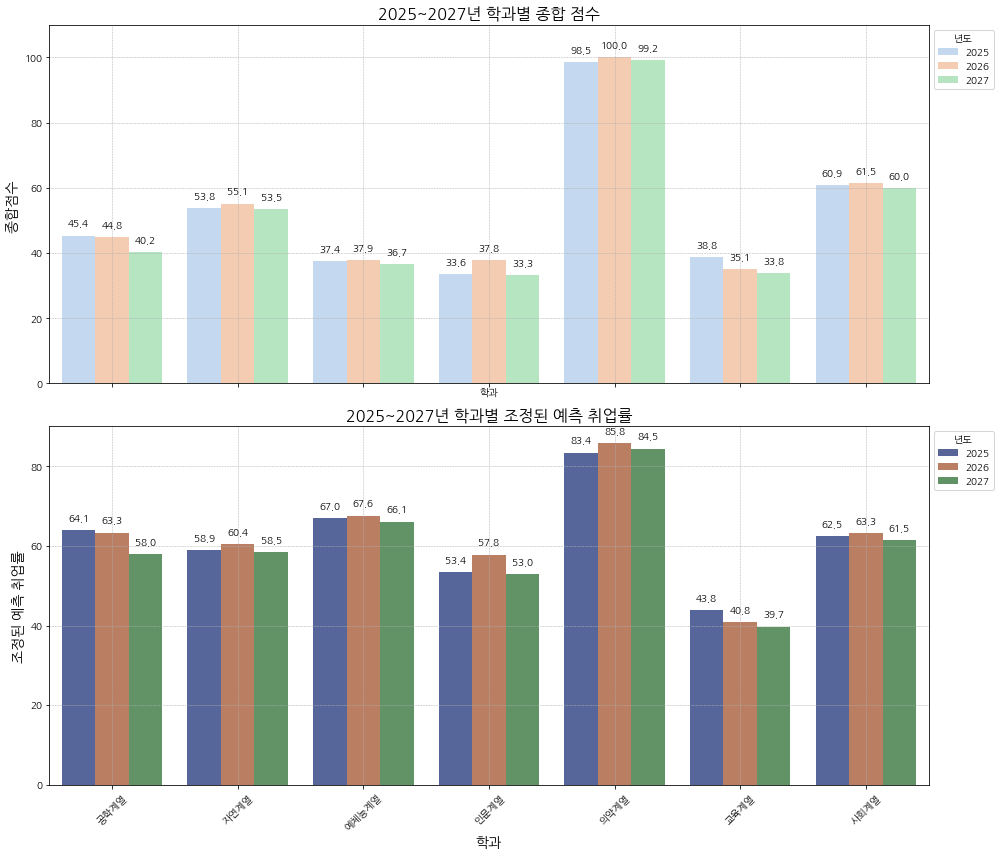

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 사용할 한글 폰트 파일 경로
font_name = fm.FontProperties(fname=font_path).get_name()  # 폰트 이름 추출
plt.rcParams['font.family'] = font_name  # 전체 폰트 설정

# 데이터 예시
# merged_data7 데이터프레임에 종합점수와 조정된 예측 취업률이 포함되어 있다고 가정
# data = {
#     '학과': [...],
#     '년도': [...],
#     '종합점수': [...],
#     '조정된 예측 취업률': [...],
#     '종합점수_z': [...],
# }
# merged_data7 = pd.DataFrame(data)
# merged_data5 = pd.DataFrame(data)

# 그래프 설정
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=True)

# 종합 점수 막대 그래프
barplot1 = sns.barplot(data=merged_data7, x='학과', y='종합점수', hue='년도', palette='pastel', ax=ax1, alpha=0.7)

# 막대의 위치와 높이를 가져와 주석 추가
for p in barplot1.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    year = merged_data7.loc[merged_data7['종합점수'] == y, '년도'].values[0]
    ax1.annotate(
        f'{y:.1f}',  # 주석 내용 (소수점 3자리까지 표시)
        (x, y),  # 주석을 추가할 위치
        textcoords="offset points",  # 주석 위치 조정
        xytext=(0, 10),  # 주석 위치 (y축 방향으로 10포인트 위)
        ha='center',  # 수평 정렬 (중앙)
        fontsize=10,  # 폰트 크기
        color='black'  # 폰트 색상
    )

ax1.set_ylabel('종합점수 ', fontsize=14)
ax1.set_title('2025~2027년 학과별 종합 점수', fontsize=16)
ax1.legend(title='년도', loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_yscale('linear')  # 선형 스케일
ax1.grid(True, linestyle='--', linewidth=0.5)
ax1.set_ylim(0,110)
# 조정된 예측 취업률 막대 그래프
barplot2 = sns.barplot(data=merged_data5, x='학과', y='조정된 예측 취업률', hue='년도', palette='dark', ax=ax2, alpha=0.7)

# 막대의 위치와 높이를 가져와 주석 추가
for p in barplot2.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    year = merged_data5.loc[merged_data5['조정된 예측 취업률'] == y, '년도'].values[0]
    ax2.annotate(
        f'{y:.1f}',  # 주석 내용 (소수점 1자리까지 표시)
        (x, y),  # 주석을 추가할 위치
        textcoords="offset points",  # 주석 위치 조정
        xytext=(0, 10),  # 주석 위치 (y축 방향으로 10포인트 위)
        ha='center',  # 수평 정렬 (중앙)
        fontsize=10,  # 폰트 크기
        color='black'  # 폰트 색상
    )

ax2.set_ylabel('조정된 예측 취업률', fontsize=14)
ax2.set_title('2025~2027년 학과별 조정된 예측 취업률', fontsize=16)
ax2.legend(title='년도', loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_yscale('linear')  # 선형 스케일
ax2.grid(True, linestyle='--', linewidth=0.5)

plt.xlabel('학과', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [139]:
import pandas as pd

xlsx = '2018년 학과별 고등교육기관 졸업자 취업통계.xlsx' 

df18 = pd.read_excel(xlsx, header=4)


df18 = df18.reset_index(drop=True)

df18
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ









illsa_df62 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['중계열'] == '컴퓨터 ㆍ 통신')]

sorted_illsa_df62 = illsa_df62.sort_values('취업률_계', ascending=False)

max_illsa_df62 = sorted_illsa_df62[['중계열','학과명','취업률_계','학제']]

max_illsa_df62 = max_illsa_df62.reset_index(drop=True)

max_illsa_df63=max_illsa_df62['취업률_계'].mean()
max_illsa_df63
illsa_df64 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '자연계열')]

sorted_illsa_df64 = illsa_df64.sort_values('취업률_계', ascending=False)

max_illsa_df64 = sorted_illsa_df64[['대계열','학과명','취업률_계','학제']]

max_illsa_df64 = max_illsa_df64.reset_index(drop=True)

max_illsa_df64=max_illsa_df64['취업률_계'].mean()
illsa_df65 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '예체능계열')]

sorted_illsa_df65 = illsa_df65.sort_values('취업률_계', ascending=False)

max_illsa_df65 = sorted_illsa_df65[['대계열','학과명','취업률_계','학제']]

max_illsa_df65 = max_illsa_df65.reset_index(drop=True)

max_illsa_df65=max_illsa_df65['취업률_계'].mean()
max_illsa_df65


# max_illsa_df66
illsa_df66 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '사회계열')]

sorted_illsa_df66 = illsa_df66.sort_values('취업률_계', ascending=False)

max_illsa_df66 = sorted_illsa_df66[['대계열','학과명','취업률_계','학제']]

max_illsa_df66 = max_illsa_df66.reset_index(drop=True)

max_illsa_df66=max_illsa_df66['취업률_계'].mean()
max_illsa_df66
illsa_df67 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '인문계열')]

sorted_illsa_df67 = illsa_df67.sort_values('취업률_계', ascending=False)

max_illsa_df67 = sorted_illsa_df67[['대계열','학과명','취업률_계','학제']]

max_illsa_df67 = max_illsa_df67.reset_index(drop=True)

max_illsa_df67=max_illsa_df67['취업률_계'].mean()
max_illsa_df67
illsa_df68 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '의약계열')]

sorted_illsa_df68 = illsa_df68.sort_values('취업률_계', ascending=False)

max_illsa_df68 = sorted_illsa_df68[['대계열','학과명','취업률_계','학제']]

max_illsa_df68 = max_illsa_df68.reset_index(drop=True)

max_illsa_df68=max_illsa_df68['취업률_계'].mean()
illsa_df69 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['대계열'] == '교육계열')]

sorted_illsa_df69 = illsa_df69.sort_values('취업률_계', ascending=False)

max_illsa_df69 = sorted_illsa_df69[['대계열','학과명','취업률_계','학제']]

max_illsa_df69 = max_illsa_df69.reset_index(drop=True)

max_illsa_df69=max_illsa_df69['취업률_계'].mean()
max_illsa_df69

max_illsa_df61=pd.DataFrame({
    '학과별 취업률':{'공학계열':max_illsa_df63,'자연계열':max_illsa_df64,'예체능계열':max_illsa_df65,'사회계열':max_illsa_df66,'인문계열':max_illsa_df67,'의약계열':max_illsa_df68,'교육계열':max_illsa_df69},
    '년도':2018
})
max_illsa_df61



,학과별 취업률,년도
공학계열,NaN,2018
교육계열,45.37,2018
사회계열,62.97,2018
예체능계열,62.34,2018
의약계열,81.74,2018
인문계열,54.95,2018
자연계열,59.70,2018


In [140]:
import pandas as pd

xlsx = '2022년 학과별 고등교육기관 취업통계_20240112.xlsx' 

df22 = pd.read_excel(xlsx, header=4)


df22 = df22.reset_index(drop=True)

df22
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

#IT
illsa_df22 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['중계열'] == '컴퓨터ㆍ통신')]

sorted_illsa_df22 = illsa_df22.sort_values('취업률_계', ascending=False)

max_illsa_df22 = sorted_illsa_df22[['중계열','학과명','취업률_계','학제']]

max_illsa_df22 = max_illsa_df22.reset_index(drop=True)

max_illsa_df23=max_illsa_df22['취업률_계'].mean()
max_illsa_df23


#전기전자
illsa_df24 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['중계열'] == '전기ㆍ전자')]

sorted_illsa_df24 = illsa_df24.sort_values('취업률_계', ascending=False)

max_illsa_df24 = sorted_illsa_df24[['중계열','학과명','취업률_계','학제']]

max_illsa_df24 = max_illsa_df24.reset_index(drop=True)

max_illsa_df24=max_illsa_df24['취업률_계'].mean()
max_illsa_df24


#건축
illsa_df25 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['중계열'] == '건축')]

sorted_illsa_df25 = illsa_df25.sort_values('취업률_계', ascending=False)

max_illsa_df25 = sorted_illsa_df25[['중계열','학과명','취업률_계','학제']]

max_illsa_df25 = max_illsa_df25.reset_index(drop=True)

max_illsa_df25=max_illsa_df25['취업률_계'].mean()
max_illsa_df25


#토목 (건축 토목 평균내기)
illsa_df26 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['중계열'] == '토목ㆍ도시')]

sorted_illsa_df26 = illsa_df26.sort_values('취업률_계', ascending=False)

max_illsa_df26 = sorted_illsa_df26[['중계열','학과명','취업률_계','학제']]

max_illsa_df26 = max_illsa_df26.reset_index(drop=True)

max_illsa_df26=max_illsa_df26['취업률_계'].mean()
max_illsa_df26

max_illsa_df25 = (max_illsa_df25+max_illsa_df26)/2
max_illsa_df25_a= max_illsa_df25
max_illsa_df25_a


#기계/로봇
illsa_df27 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['중계열'] == '기계ㆍ금속')]

sorted_illsa_df27 = illsa_df27.sort_values('취업률_계', ascending=False)

max_illsa_df27 = sorted_illsa_df27[['중계열','학과명','취업률_계','학제']]

max_illsa_df27 = max_illsa_df27.reset_index(drop=True)

max_illsa_df27=max_illsa_df27['취업률_계'].mean()
max_illsa_df27


#산업
illsa_df28 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['중계열'] == '산업')]

sorted_illsa_df28 = illsa_df28.sort_values('취업률_계', ascending=False)

max_illsa_df28 = sorted_illsa_df28[['중계열','학과명','취업률_계','학제']]

max_illsa_df28 = max_illsa_df28.reset_index(drop=True)

max_illsa_df28=max_illsa_df28['취업률_계'].mean()
max_illsa_df28


#화학
illsa_df29 = df22[(df22['졸업자_계'] >= 100) & (df22['학제'] == '대학교') & (df22['중계열'] == '화공')]

sorted_illsa_df29 = illsa_df29.sort_values('취업률_계', ascending=False)

max_illsa_df29 = sorted_illsa_df29[['중계열','학과명','취업률_계','학제']]

max_illsa_df29 = max_illsa_df29.reset_index(drop=True)

max_illsa_df29=max_illsa_df29['취업률_계'].mean()
max_illsa_df29

max_illsa_df21=pd.DataFrame({
    '분야별 취업률':{'IT':max_illsa_df23,'건축/토목':max_illsa_df25_a,'기계/로봇':max_illsa_df27,'산업':max_illsa_df28,'전기/전자':max_illsa_df24,'화학':max_illsa_df29},
    '년도':2022
})
max_illsa_df21


,분야별 취업률,년도
IT,69.79,2022
건축/토목,72.36,2022
기계/로봇,67.96,2022
산업,73.68,2022
전기/전자,68.51,2022
화학,72.76,2022


In [141]:
import pandas as pd

xlsx = '2021년 학과별 고등교육기관 취업통계.xlsx' 

df23 = pd.read_excel(xlsx, header=4)


df23 = df23.reset_index(drop=True)

df23
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

#IT
illsa_df32 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['중계열'] == '컴퓨터ㆍ통신')]

sorted_illsa_df32 = illsa_df32.sort_values('취업률_계', ascending=False)

max_illsa_df32 = sorted_illsa_df32[['중계열','학과명','취업률_계','학제']]

max_illsa_df32 = max_illsa_df32.reset_index(drop=True)

max_illsa_df33=max_illsa_df32['취업률_계'].mean()
max_illsa_df33


#전기전자
illsa_df34 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['중계열'] == '전기ㆍ전자')]

sorted_illsa_df34 = illsa_df34.sort_values('취업률_계', ascending=False)

max_illsa_df34 = sorted_illsa_df34[['중계열','학과명','취업률_계','학제']]

max_illsa_df34 = max_illsa_df34.reset_index(drop=True)

max_illsa_df34=max_illsa_df34['취업률_계'].mean()
max_illsa_df34


#건축
illsa_df35 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['중계열'] == '건축')]

sorted_illsa_df35 = illsa_df35.sort_values('취업률_계', ascending=False)

max_illsa_df35 = sorted_illsa_df35[['중계열','학과명','취업률_계','학제']]

max_illsa_df35 = max_illsa_df35.reset_index(drop=True)

max_illsa_df35=max_illsa_df35['취업률_계'].mean()
max_illsa_df35


#토목 (건축 토목 평균내기)
illsa_df36 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['중계열'] == '토목ㆍ도시')]

sorted_illsa_df36 = illsa_df36.sort_values('취업률_계', ascending=False)

max_illsa_df36 = sorted_illsa_df36[['중계열','학과명','취업률_계','학제']]

max_illsa_df36 = max_illsa_df36.reset_index(drop=True)

max_illsa_df36=max_illsa_df36['취업률_계'].mean()
max_illsa_df36

max_illsa_df35 = (max_illsa_df35+max_illsa_df36)/2
max_illsa_df35_a= max_illsa_df35
max_illsa_df35_a


#기계/로봇
illsa_df37 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['중계열'] == '기계ㆍ금속')]

sorted_illsa_df37 = illsa_df37.sort_values('취업률_계', ascending=False)

max_illsa_df37 = sorted_illsa_df37[['중계열','학과명','취업률_계','학제']]

max_illsa_df37 = max_illsa_df37.reset_index(drop=True)

max_illsa_df37=max_illsa_df37['취업률_계'].mean()
max_illsa_df37


#산업
illsa_df38 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['중계열'] == '산업')]

sorted_illsa_df38 = illsa_df38.sort_values('취업률_계', ascending=False)

max_illsa_df38 = sorted_illsa_df38[['중계열','학과명','취업률_계','학제']]

max_illsa_df38 = max_illsa_df38.reset_index(drop=True)

max_illsa_df38=max_illsa_df38['취업률_계'].mean()
max_illsa_df38


#화학
illsa_df39 = df23[(df23['졸업자_계'] >= 100) & (df23['학제'] == '대학교') & (df23['중계열'] == '화공')]

sorted_illsa_df39 = illsa_df39.sort_values('취업률_계', ascending=False)

max_illsa_df39 = sorted_illsa_df39[['중계열','학과명','취업률_계','학제']]

max_illsa_df39 = max_illsa_df39.reset_index(drop=True)

max_illsa_df39=max_illsa_df39['취업률_계'].mean()
max_illsa_df39

max_illsa_df31=pd.DataFrame({
    '분야별 취업률':{'IT':max_illsa_df33,'건축/토목':max_illsa_df35_a,'기계/로봇':max_illsa_df37,'산업':max_illsa_df38,'전기/전자':max_illsa_df34,'화학':max_illsa_df39},
    '년도':2021
})
max_illsa_df31


,분야별 취업률,년도
IT,69.88,2021
건축/토목,71.68,2021
기계/로봇,64.52,2021
산업,68.28,2021
전기/전자,64.86,2021
화학,68.88,2021


In [142]:
import pandas as pd

xlsx = '2020년 학과별 고등교육기관 취업통계.xlsx' 

df20 = pd.read_excel(xlsx, header=4)


df20 = df20.reset_index(drop=True)

df20
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

#IT
illsa_df42 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['중계열'] == '컴퓨터ㆍ통신')]

sorted_illsa_df42 = illsa_df42.sort_values('취업률_계', ascending=False)

max_illsa_df42 = sorted_illsa_df42[['중계열','학과명','취업률_계','학제']]

max_illsa_df42 = max_illsa_df42.reset_index(drop=True)

max_illsa_df43=max_illsa_df42['취업률_계'].mean()
max_illsa_df43


#전기전자
illsa_df44 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['중계열'] == '전기ㆍ전자')]

sorted_illsa_df44 = illsa_df44.sort_values('취업률_계', ascending=False)

max_illsa_df44 = sorted_illsa_df44[['중계열','학과명','취업률_계','학제']]

max_illsa_df44 = max_illsa_df44.reset_index(drop=True)

max_illsa_df44=max_illsa_df44['취업률_계'].mean()
max_illsa_df44


#건축
illsa_df45 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['중계열'] == '건축')]

sorted_illsa_df45 = illsa_df45.sort_values('취업률_계', ascending=False)

max_illsa_df45 = sorted_illsa_df45[['중계열','학과명','취업률_계','학제']]

max_illsa_df45 = max_illsa_df45.reset_index(drop=True)

max_illsa_df45=max_illsa_df45['취업률_계'].mean()
max_illsa_df45


#토목 (건축 토목 평균내기)
illsa_df46 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['중계열'] == '토목ㆍ도시')]

sorted_illsa_df46 = illsa_df46.sort_values('취업률_계', ascending=False)

max_illsa_df46 = sorted_illsa_df46[['중계열','학과명','취업률_계','학제']]

max_illsa_df46 = max_illsa_df46.reset_index(drop=True)

max_illsa_df46=max_illsa_df46['취업률_계'].mean()
max_illsa_df46

max_illsa_df45 = (max_illsa_df45+max_illsa_df46)/2
max_illsa_df45_a= max_illsa_df45
max_illsa_df45_a


#기계/로봇
illsa_df47 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['중계열'] == '기계ㆍ금속')]

sorted_illsa_df47 = illsa_df47.sort_values('취업률_계', ascending=False)

max_illsa_df47 = sorted_illsa_df47[['중계열','학과명','취업률_계','학제']]

max_illsa_df47 = max_illsa_df47.reset_index(drop=True)

max_illsa_df47=max_illsa_df47['취업률_계'].mean()
max_illsa_df47


#산업
illsa_df48 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['중계열'] == '산업')]

sorted_illsa_df48 = illsa_df48.sort_values('취업률_계', ascending=False)

max_illsa_df48 = sorted_illsa_df48[['중계열','학과명','취업률_계','학제']]

max_illsa_df48 = max_illsa_df48.reset_index(drop=True)

max_illsa_df48=max_illsa_df48['취업률_계'].mean()
max_illsa_df48


#화학
illsa_df49 = df20[(df20['졸업자_계'] >= 100) & (df20['학제'] == '대학교') & (df20['중계열'] == '화공')]

sorted_illsa_df49 = illsa_df49.sort_values('취업률_계', ascending=False)

max_illsa_df49 = sorted_illsa_df49[['중계열','학과명','취업률_계','학제']]

max_illsa_df49 = max_illsa_df49.reset_index(drop=True)

max_illsa_df49=max_illsa_df49['취업률_계'].mean()
max_illsa_df49

max_illsa_df41=pd.DataFrame({
    '분야별 취업률':{'IT':max_illsa_df43,'건축/토목':max_illsa_df45_a,'기계/로봇':max_illsa_df47,'산업':max_illsa_df48,'전기/전자':max_illsa_df44,'화학':max_illsa_df39},
    '년도':2020
})
max_illsa_df41


,분야별 취업률,년도
IT,68.11,2020
건축/토목,70.11,2020
기계/로봇,62.08,2020
산업,66.59,2020
전기/전자,63.41,2020
화학,68.88,2020


In [143]:
import pandas as pd

xlsx = '2019년 학과별 고등교육기관 취업통계.xlsx' 

df19 = pd.read_excel(xlsx, header=4)


df19 = df19.reset_index(drop=True)

df19
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

#IT
illsa_df52 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['중계열'] == '컴퓨터ㆍ통신')]

sorted_illsa_df52 = illsa_df52.sort_values('취업률_계', ascending=False)

max_illsa_df52 = sorted_illsa_df52[['중계열','학과명','취업률_계','학제']]

max_illsa_df52 = max_illsa_df52.reset_index(drop=True)

max_illsa_df53=max_illsa_df52['취업률_계'].mean()
max_illsa_df53


#전기전자
illsa_df54 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['중계열'] == '전기ㆍ전자')]

sorted_illsa_df54 = illsa_df54.sort_values('취업률_계', ascending=False)

max_illsa_df54 = sorted_illsa_df54[['중계열','학과명','취업률_계','학제']]

max_illsa_df54 = max_illsa_df54.reset_index(drop=True)

max_illsa_df54=max_illsa_df54['취업률_계'].mean()
max_illsa_df54


#건축
illsa_df55 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['중계열'] == '건축')]

sorted_illsa_df55 = illsa_df55.sort_values('취업률_계', ascending=False)

max_illsa_df55 = sorted_illsa_df55[['중계열','학과명','취업률_계','학제']]

max_illsa_df55 = max_illsa_df55.reset_index(drop=True)

max_illsa_df55=max_illsa_df55['취업률_계'].mean()
max_illsa_df55


#토목 (건축 토목 평균내기)
illsa_df56 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['중계열'] == '토목ㆍ도시')]

sorted_illsa_df56 = illsa_df56.sort_values('취업률_계', ascending=False)

max_illsa_df56 = sorted_illsa_df56[['중계열','학과명','취업률_계','학제']]

max_illsa_df56 = max_illsa_df56.reset_index(drop=True)

max_illsa_df56=max_illsa_df56['취업률_계'].mean()
max_illsa_df56

max_illsa_df55 = (max_illsa_df55+max_illsa_df56)/2
max_illsa_df55_a= max_illsa_df55
max_illsa_df55_a


#기계/로봇
illsa_df57 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['중계열'] == '기계ㆍ금속')]

sorted_illsa_df57 = illsa_df57.sort_values('취업률_계', ascending=False)

max_illsa_df57 = sorted_illsa_df57[['중계열','학과명','취업률_계','학제']]

max_illsa_df57 = max_illsa_df57.reset_index(drop=True)

max_illsa_df57=max_illsa_df57['취업률_계'].mean()
max_illsa_df57


#산업
illsa_df58 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['중계열'] == '산업')]

sorted_illsa_df58 = illsa_df58.sort_values('취업률_계', ascending=False)

max_illsa_df58 = sorted_illsa_df58[['중계열','학과명','취업률_계','학제']]

max_illsa_df58 = max_illsa_df58.reset_index(drop=True)

max_illsa_df58=max_illsa_df58['취업률_계'].mean()
max_illsa_df58


#화학
illsa_df59 = df19[(df19['졸업자_계'] >= 100) & (df19['학제'] == '대학교') & (df19['중계열'] == '화공')]

sorted_illsa_df59 = illsa_df59.sort_values('취업률_계', ascending=False)

max_illsa_df59 = sorted_illsa_df59[['중계열','학과명','취업률_계','학제']]

max_illsa_df59 = max_illsa_df59.reset_index(drop=True)

max_illsa_df59=max_illsa_df59['취업률_계'].mean()
max_illsa_df59

max_illsa_df51=pd.DataFrame({
    '분야별 취업률':{'IT':max_illsa_df53,'건축/토목':max_illsa_df55_a,'기계/로봇':max_illsa_df57,'산업':max_illsa_df58,'전기/전자':max_illsa_df54,'화학':max_illsa_df59},
    '년도':2019
})
max_illsa_df51


,분야별 취업률,년도
IT,68.98,2019
건축/토목,69.29,2019
기계/로봇,67.34,2019
산업,73.78,2019
전기/전자,67.83,2019
화학,71.59,2019


In [144]:
import pandas as pd

xlsx = '2018년 학과별 고등교육기관 졸업자 취업통계.xlsx' 

df18 = pd.read_excel(xlsx, header=4)


df18 = df18.reset_index(drop=True)

df18
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

#IT
illsa_df62 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['중계열'] == '컴퓨터ㆍ통신')]

sorted_illsa_df62 = illsa_df62.sort_values('취업률_계', ascending=False)

max_illsa_df62 = sorted_illsa_df62[['중계열','학과명','취업률_계','학제']]

max_illsa_df62 = max_illsa_df62.reset_index(drop=True)

max_illsa_df63=max_illsa_df62['취업률_계'].mean()
max_illsa_df63


#전기전자
illsa_df64 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['중계열'] == '전기ㆍ전자')]

sorted_illsa_df64 = illsa_df64.sort_values('취업률_계', ascending=False)

max_illsa_df64 = sorted_illsa_df64[['중계열','학과명','취업률_계','학제']]

max_illsa_df64 = max_illsa_df64.reset_index(drop=True)

max_illsa_df64=max_illsa_df64['취업률_계'].mean()
max_illsa_df64


#건축
illsa_df65 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['중계열'] == '건축')]

sorted_illsa_df65 = illsa_df65.sort_values('취업률_계', ascending=False)

max_illsa_df65 = sorted_illsa_df65[['중계열','학과명','취업률_계','학제']]

max_illsa_df65 = max_illsa_df65.reset_index(drop=True)

max_illsa_df65=max_illsa_df65['취업률_계'].mean()
max_illsa_df65


#토목 (건축 토목 평균내기)
illsa_df66 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['중계열'] == '토목ㆍ도시')]

sorted_illsa_df66 = illsa_df66.sort_values('취업률_계', ascending=False)

max_illsa_df66 = sorted_illsa_df66[['중계열','학과명','취업률_계','학제']]

max_illsa_df66 = max_illsa_df66.reset_index(drop=True)

max_illsa_df66=max_illsa_df66['취업률_계'].mean()
max_illsa_df66

max_illsa_df65 = (max_illsa_df65+max_illsa_df66)/2
max_illsa_df65_a= max_illsa_df65
max_illsa_df65_a


#기계/로봇
illsa_df67 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['중계열'] == '기계ㆍ금속')]

sorted_illsa_df67 = illsa_df67.sort_values('취업률_계', ascending=False)

max_illsa_df67 = sorted_illsa_df67[['중계열','학과명','취업률_계','학제']]

max_illsa_df67 = max_illsa_df67.reset_index(drop=True)

max_illsa_df67=max_illsa_df67['취업률_계'].mean()
max_illsa_df67


#산업
illsa_df68 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['중계열'] == '산업')]

sorted_illsa_df68 = illsa_df68.sort_values('취업률_계', ascending=False)

max_illsa_df68 = sorted_illsa_df68[['중계열','학과명','취업률_계','학제']]

max_illsa_df68 = max_illsa_df68.reset_index(drop=True)

max_illsa_df68=max_illsa_df68['취업률_계'].mean()
max_illsa_df68


#화학
illsa_df69 = df18[(df18['졸업자_계'] >= 100) & (df18['학제'] == '대학교') & (df18['중계열'] == '화공')]

sorted_illsa_df69 = illsa_df69.sort_values('취업률_계', ascending=False)

max_illsa_df69 = sorted_illsa_df69[['중계열','학과명','취업률_계','학제']]

max_illsa_df69 = max_illsa_df69.reset_index(drop=True)

max_illsa_df69=max_illsa_df69['취업률_계'].mean()
max_illsa_df69

max_illsa_df61=pd.DataFrame({
    '분야별 취업률':{'IT':max_illsa_df63,'건축/토목':max_illsa_df65_a,'기계/로봇':max_illsa_df67,'산업':max_illsa_df68,'전기/전자':max_illsa_df64,'화학':max_illsa_df69},
    '년도':2018
})
max_illsa_df61


,분야별 취업률,년도
IT,71.43,2018
건축/토목,68.70,2018
기계/로봇,69.66,2018
산업,72.03,2018
전기/전자,69.08,2018
화학,71.27,2018


In [145]:
import pandas as pd

xlsx = '2017년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df17 = pd.read_excel(xlsx, header=4)


df17 = df17.reset_index(drop=True)

df17
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

#IT
illsa_df72 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['중계열'] == '컴퓨터ㆍ통신')]

sorted_illsa_df72 = illsa_df72.sort_values('취업률_계', ascending=False)

max_illsa_df72 = sorted_illsa_df72[['중계열','학과명','취업률_계','학제']]

max_illsa_df72 = max_illsa_df72.reset_index(drop=True)

max_illsa_df73=max_illsa_df72['취업률_계'].mean()
max_illsa_df73


#전기전자
illsa_df74 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['중계열'] == '전기ㆍ전자')]

sorted_illsa_df74 = illsa_df74.sort_values('취업률_계', ascending=False)

max_illsa_df74 = sorted_illsa_df74[['중계열','학과명','취업률_계','학제']]

max_illsa_df74 = max_illsa_df74.reset_index(drop=True)

max_illsa_df74=max_illsa_df74['취업률_계'].mean()
max_illsa_df74


#건축
illsa_df75 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['중계열'] == '건축')]

sorted_illsa_df75 = illsa_df75.sort_values('취업률_계', ascending=False)

max_illsa_df75 = sorted_illsa_df75[['중계열','학과명','취업률_계','학제']]

max_illsa_df75 = max_illsa_df75.reset_index(drop=True)

max_illsa_df75=max_illsa_df75['취업률_계'].mean()
max_illsa_df75


#토목 (건축 토목 평균내기)
illsa_df76 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['중계열'] == '토목ㆍ도시')]

sorted_illsa_df76 = illsa_df76.sort_values('취업률_계', ascending=False)

max_illsa_df76 = sorted_illsa_df76[['중계열','학과명','취업률_계','학제']]

max_illsa_df76 = max_illsa_df76.reset_index(drop=True)

max_illsa_df76=max_illsa_df76['취업률_계'].mean()
max_illsa_df76

max_illsa_df75 = (max_illsa_df75+max_illsa_df76)/2
max_illsa_df75_a= max_illsa_df75
max_illsa_df75_a


#기계/로봇
illsa_df77 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['중계열'] == '기계ㆍ금속')]

sorted_illsa_df77 = illsa_df77.sort_values('취업률_계', ascending=False)

max_illsa_df77 = sorted_illsa_df77[['중계열','학과명','취업률_계','학제']]

max_illsa_df77 = max_illsa_df77.reset_index(drop=True)

max_illsa_df77=max_illsa_df77['취업률_계'].mean()
max_illsa_df77


#산업
illsa_df78 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['중계열'] == '산업')]

sorted_illsa_df78 = illsa_df78.sort_values('취업률_계', ascending=False)

max_illsa_df78 = sorted_illsa_df78[['중계열','학과명','취업률_계','학제']]

max_illsa_df78 = max_illsa_df78.reset_index(drop=True)

max_illsa_df78=max_illsa_df78['취업률_계'].mean()
max_illsa_df78


#화학
illsa_df79 = df17[(df17['졸업자_계'] >= 100) & (df17['학제'] == '대학교') & (df17['중계열'] == '화공')]

sorted_illsa_df79 = illsa_df79.sort_values('취업률_계', ascending=False)

max_illsa_df79 = sorted_illsa_df79[['중계열','학과명','취업률_계','학제']]

max_illsa_df79 = max_illsa_df79.reset_index(drop=True)

max_illsa_df79=max_illsa_df79['취업률_계'].mean()
max_illsa_df79

max_illsa_df71=pd.DataFrame({
    '분야별 취업률':{'IT':max_illsa_df73,'건축/토목':max_illsa_df75_a,'기계/로봇':max_illsa_df77,'산업':max_illsa_df78,'전기/전자':max_illsa_df74,'화학':max_illsa_df79},
    '년도':2017
})
max_illsa_df71


,분야별 취업률,년도
IT,70.82,2017
건축/토목,68.57,2017
기계/로봇,65.82,2017
산업,67.76,2017
전기/전자,68.46,2017
화학,70.05,2017


In [146]:
import pandas as pd

xlsx = '2016년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df16 = pd.read_excel(xlsx, header=4)


df16 = df16.reset_index(drop=True)

df16
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

#IT
illsa_df82 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['중계열'] == '컴퓨터ㆍ통신')]

sorted_illsa_df82 = illsa_df82.sort_values('취업률_계', ascending=False)

max_illsa_df82 = sorted_illsa_df82[['중계열','학과명','취업률_계','학제']]

max_illsa_df82 = max_illsa_df82.reset_index(drop=True)

max_illsa_df83=max_illsa_df72['취업률_계'].mean()
max_illsa_df83


#전기전자
illsa_df84 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['중계열'] == '전기ㆍ전자')]

sorted_illsa_df84 = illsa_df84.sort_values('취업률_계', ascending=False)

max_illsa_df84 = sorted_illsa_df84[['중계열','학과명','취업률_계','학제']]

max_illsa_df84 = max_illsa_df84.reset_index(drop=True)

max_illsa_df84=max_illsa_df84['취업률_계'].mean()
max_illsa_df84


#건축
illsa_df85 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['중계열'] == '건축')]

sorted_illsa_df85 = illsa_df85.sort_values('취업률_계', ascending=False)

max_illsa_df85 = sorted_illsa_df85[['중계열','학과명','취업률_계','학제']]

max_illsa_df85 = max_illsa_df85.reset_index(drop=True)

max_illsa_df85=max_illsa_df85['취업률_계'].mean()
max_illsa_df85


#토목 (건축 토목 평균내기)
illsa_df86 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['중계열'] == '토목ㆍ도시')]

sorted_illsa_df86 = illsa_df86.sort_values('취업률_계', ascending=False)

max_illsa_df86 = sorted_illsa_df86[['중계열','학과명','취업률_계','학제']]

max_illsa_df86 = max_illsa_df86.reset_index(drop=True)

max_illsa_df86=max_illsa_df86['취업률_계'].mean()
max_illsa_df86

max_illsa_df85 = (max_illsa_df85+max_illsa_df86)/2
max_illsa_df85_a= max_illsa_df85
max_illsa_df85_a


#기계/로봇
illsa_df87 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['중계열'] == '기계ㆍ금속')]

sorted_illsa_df87 = illsa_df87.sort_values('취업률_계', ascending=False)

max_illsa_df87 = sorted_illsa_df87[['중계열','학과명','취업률_계','학제']]

max_illsa_df87 = max_illsa_df87.reset_index(drop=True)

max_illsa_df87=max_illsa_df87['취업률_계'].mean()
max_illsa_df87


#산업
illsa_df88 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['중계열'] == '산업')]

sorted_illsa_df88 = illsa_df88.sort_values('취업률_계', ascending=False)

max_illsa_df88 = sorted_illsa_df88[['중계열','학과명','취업률_계','학제']]

max_illsa_df88 = max_illsa_df88.reset_index(drop=True)

max_illsa_df88=max_illsa_df88['취업률_계'].mean()
max_illsa_df88


#화학
illsa_df89 = df16[(df16['졸업자_계'] >= 100) & (df16['학제'] == '대학교') & (df16['중계열'] == '화공')]

sorted_illsa_df89 = illsa_df89.sort_values('취업률_계', ascending=False)

max_illsa_df89 = sorted_illsa_df89[['중계열','학과명','취업률_계','학제']]

max_illsa_df89 = max_illsa_df89.reset_index(drop=True)

max_illsa_df89=max_illsa_df89['취업률_계'].mean()
max_illsa_df89

max_illsa_df81=pd.DataFrame({
    '분야별 취업률':{'IT':max_illsa_df83,'건축/토목':max_illsa_df85_a,'기계/로봇':max_illsa_df87,'산업':max_illsa_df88,'전기/전자':max_illsa_df84,'화학':max_illsa_df89},
    '년도':2016
})
max_illsa_df81


,분야별 취업률,년도
IT,70.82,2016
건축/토목,68.79,2016
기계/로봇,71.27,2016
산업,70.46,2016
전기/전자,70.45,2016
화학,69.00,2016


In [147]:
import pandas as pd

xlsx = '2015년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df15 = pd.read_excel(xlsx, header=4)


df15 = df15.reset_index(drop=True)

df15
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

#IT
illsa_df92 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['중계열'] == '컴퓨터ㆍ통신')]

sorted_illsa_df92 = illsa_df92.sort_values('취업률_계', ascending=False)

max_illsa_df92 = sorted_illsa_df92[['중계열','학과명','취업률_계','학제']]

max_illsa_df92 = max_illsa_df92.reset_index(drop=True)

max_illsa_df93=max_illsa_df92['취업률_계'].mean()
max_illsa_df93


#전기전자
illsa_df94 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['중계열'] == '전기ㆍ전자')]

sorted_illsa_df94 = illsa_df94.sort_values('취업률_계', ascending=False)

max_illsa_df94 = sorted_illsa_df94[['중계열','학과명','취업률_계','학제']]

max_illsa_df94 = max_illsa_df94.reset_index(drop=True)

max_illsa_df94=max_illsa_df94['취업률_계'].mean()
max_illsa_df94


#건축
illsa_df95 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['중계열'] == '건축')]

sorted_illsa_df95 = illsa_df95.sort_values('취업률_계', ascending=False)

max_illsa_df95 = sorted_illsa_df95[['중계열','학과명','취업률_계','학제']]

max_illsa_df95 = max_illsa_df95.reset_index(drop=True)

max_illsa_df95=max_illsa_df95['취업률_계'].mean()
max_illsa_df95


#토목 (건축 토목 평균내기)
illsa_df96 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['중계열'] == '토목ㆍ도시')]

sorted_illsa_df96 = illsa_df96.sort_values('취업률_계', ascending=False)

max_illsa_df96 = sorted_illsa_df96[['중계열','학과명','취업률_계','학제']]

max_illsa_df96 = max_illsa_df96.reset_index(drop=True)

max_illsa_df96=max_illsa_df96['취업률_계'].mean()
max_illsa_df96

max_illsa_df95 = (max_illsa_df95+max_illsa_df96)/2
max_illsa_df95_a= max_illsa_df95
max_illsa_df95_a


#기계/로봇
illsa_df97 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['중계열'] == '기계ㆍ금속')]

sorted_illsa_df97 = illsa_df97.sort_values('취업률_계', ascending=False)

max_illsa_df97 = sorted_illsa_df97[['중계열','학과명','취업률_계','학제']]

max_illsa_df97 = max_illsa_df97.reset_index(drop=True)

max_illsa_df97=max_illsa_df97['취업률_계'].mean()
max_illsa_df97


#산업
illsa_df98 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['중계열'] == '산업')]

sorted_illsa_df98 = illsa_df98.sort_values('취업률_계', ascending=False)

max_illsa_df98 = sorted_illsa_df98[['중계열','학과명','취업률_계','학제']]

max_illsa_df98 = max_illsa_df98.reset_index(drop=True)

max_illsa_df98=max_illsa_df98['취업률_계'].mean()
max_illsa_df98


#화학
illsa_df99 = df15[(df15['졸업자_계'] >= 100) & (df15['학제'] == '대학교') & (df15['중계열'] == '화공')]

sorted_illsa_df99 = illsa_df99.sort_values('취업률_계', ascending=False)

max_illsa_df99 = sorted_illsa_df99[['중계열','학과명','취업률_계','학제']]

max_illsa_df99 = max_illsa_df99.reset_index(drop=True)

max_illsa_df99=max_illsa_df99['취업률_계'].mean()
max_illsa_df99

max_illsa_df91=pd.DataFrame({
    '분야별 취업률':{'IT':max_illsa_df93,'건축/토목':max_illsa_df95_a,'기계/로봇':max_illsa_df97,'산업':max_illsa_df98,'전기/전자':max_illsa_df94,'화학':max_illsa_df99},
    '년도':2015
})
max_illsa_df91


,분야별 취업률,년도
IT,71.25,2015
건축/토목,66.57,2015
기계/로봇,75.29,2015
산업,75.34,2015
전기/전자,72.81,2015
화학,73.84,2015


In [148]:
import pandas as pd

xlsx = '2014년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df14 = pd.read_excel(xlsx, header=4)


df14 = df14.reset_index(drop=True)

df14
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

#IT
illsa_df102 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['중계열'] == '컴퓨터ㆍ통신')]

sorted_illsa_df102 = illsa_df102.sort_values('취업률_계', ascending=False)

max_illsa_df102 = sorted_illsa_df102[['중계열','학과명','취업률_계','학제']]

max_illsa_df102 = max_illsa_df102.reset_index(drop=True)

max_illsa_df103=max_illsa_df102['취업률_계'].mean()
max_illsa_df103


#전기전자
illsa_df104 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['중계열'] == '전기ㆍ전자')]

sorted_illsa_df104 = illsa_df104.sort_values('취업률_계', ascending=False)

max_illsa_df104 = sorted_illsa_df104[['중계열','학과명','취업률_계','학제']]

max_illsa_df104 = max_illsa_df104.reset_index(drop=True)

max_illsa_df104=max_illsa_df104['취업률_계'].mean()
max_illsa_df104


#건축
illsa_df105 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['중계열'] == '건축')]

sorted_illsa_df105 = illsa_df105.sort_values('취업률_계', ascending=False)

max_illsa_df105 = sorted_illsa_df105[['중계열','학과명','취업률_계','학제']]

max_illsa_df105 = max_illsa_df105.reset_index(drop=True)

max_illsa_df105=max_illsa_df105['취업률_계'].mean()
max_illsa_df105


#토목 (건축 토목 평균내기)
illsa_df106 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['중계열'] == '토목ㆍ도시')]

sorted_illsa_df106 = illsa_df106.sort_values('취업률_계', ascending=False)

max_illsa_df106 = sorted_illsa_df106[['중계열','학과명','취업률_계','학제']]

max_illsa_df106 = max_illsa_df106.reset_index(drop=True)

max_illsa_df106=max_illsa_df106['취업률_계'].mean()
max_illsa_df106

max_illsa_df105 = (max_illsa_df105+max_illsa_df106)/2
max_illsa_df105_a= max_illsa_df105
max_illsa_df105_a


# #기계/로봇
illsa_df107 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['중계열'] == '기계ㆍ금속')]

sorted_illsa_df107 = illsa_df107.sort_values('취업률_계', ascending=False)

max_illsa_df107 = sorted_illsa_df107[['중계열','학과명','취업률_계','학제']]

max_illsa_df107 = max_illsa_df107.reset_index(drop=True)

max_illsa_df107=max_illsa_df107['취업률_계'].mean()
max_illsa_df107


#산업
illsa_df108 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['중계열'] == '산업')]

sorted_illsa_df108 = illsa_df108.sort_values('취업률_계', ascending=False)

max_illsa_df108 = sorted_illsa_df108[['중계열','학과명','취업률_계','학제']]

max_illsa_df108 = max_illsa_df108.reset_index(drop=True)

max_illsa_df108=max_illsa_df108['취업률_계'].mean()
max_illsa_df108


#화학
illsa_df109 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['중계열'] == '화공')]

sorted_illsa_df109 = illsa_df109.sort_values('취업률_계', ascending=False)

max_illsa_df109 = sorted_illsa_df109[['중계열','학과명','취업률_계','학제']]

max_illsa_df109 = max_illsa_df109.reset_index(drop=True)

max_illsa_df109=max_illsa_df109['취업률_계'].mean()
max_illsa_df109

max_illsa_df101=pd.DataFrame({
    '분야별 취업률':{'IT':max_illsa_df103,'건축/토목':max_illsa_df105_a,'기계/로봇':max_illsa_df107,'산업':max_illsa_df108,'전기/전자':max_illsa_df104,'화학':max_illsa_df109},
    '년도':2014
})
max_illsa_df101


,분야별 취업률,년도
IT,74.52,2014
건축/토목,66.52,2014
기계/로봇,77.86,2014
산업,74.35,2014
전기/전자,77.33,2014
화학,73.92,2014


In [149]:
import pandas as pd

xlsx = '2013년 고등교육기관 졸업자 건강보험 및 국세DB연계 학과별 취업통계.xlsx' 

df13 = pd.read_excel(xlsx, header=4)


df13 = df13.reset_index(drop=True)

df13
#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

#IT
illsa_df112 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['중계열'] == '컴퓨터ㆍ통신')]

sorted_illsa_df112 = illsa_df112.sort_values('취업률_계', ascending=False)

max_illsa_df112 = sorted_illsa_df112[['중계열','학과명','취업률_계','학제']]

max_illsa_df112 = max_illsa_df112.reset_index(drop=True)

max_illsa_df113=max_illsa_df112['취업률_계'].mean()
max_illsa_df113


#전기전자
illsa_df114 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['중계열'] == '전기ㆍ전자')]

sorted_illsa_df114 = illsa_df114.sort_values('취업률_계', ascending=False)

max_illsa_df114 = sorted_illsa_df114[['중계열','학과명','취업률_계','학제']]

max_illsa_df114 = max_illsa_df114.reset_index(drop=True)

max_illsa_df114=max_illsa_df114['취업률_계'].mean()
max_illsa_df114


#건축
illsa_df115 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['중계열'] == '건축')]

sorted_illsa_df115 = illsa_df115.sort_values('취업률_계', ascending=False)

max_illsa_df115 = sorted_illsa_df115[['중계열','학과명','취업률_계','학제']]

max_illsa_df115 = max_illsa_df115.reset_index(drop=True)

max_illsa_df115=max_illsa_df115['취업률_계'].mean()
max_illsa_df115


#토목 (건축 토목 평균내기)
illsa_df116 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['중계열'] == '토목ㆍ도시')]

sorted_illsa_df116 = illsa_df116.sort_values('취업률_계', ascending=False)

max_illsa_df116 = sorted_illsa_df116[['중계열','학과명','취업률_계','학제']]

max_illsa_df116 = max_illsa_df116.reset_index(drop=True)

max_illsa_df116=max_illsa_df116['취업률_계'].mean()
max_illsa_df116

max_illsa_df115 = (max_illsa_df115+max_illsa_df116)/2
max_illsa_df115_a= max_illsa_df115
max_illsa_df115_a


# #기계/로봇
illsa_df117= df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['중계열'] == '기계ㆍ금속')]

sorted_illsa_df117 = illsa_df117.sort_values('취업률_계', ascending=False)

max_illsa_df117 = sorted_illsa_df117[['중계열','학과명','취업률_계','학제']]

max_illsa_df117 = max_illsa_df117.reset_index(drop=True)

max_illsa_df117=max_illsa_df117['취업률_계'].mean()
max_illsa_df117


# #산업
illsa_df118 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['중계열'] == '산업')]

sorted_illsa_df118 = illsa_df118.sort_values('취업률_계', ascending=False)

max_illsa_df118 = sorted_illsa_df118[['중계열','학과명','취업률_계','학제']]

max_illsa_df118 = max_illsa_df118.reset_index(drop=True)

max_illsa_df118=max_illsa_df118['취업률_계'].mean()
max_illsa_df118


#화학
illsa_df119 = df13[(df13['졸업자_계'] >= 100) & (df13['학제'] == '대학교') & (df13['중계열'] == '화공')]

sorted_illsa_df119 = illsa_df119.sort_values('취업률_계', ascending=False)

max_illsa_df119 = sorted_illsa_df119[['중계열','학과명','취업률_계','학제']]

max_illsa_df119 = max_illsa_df119.reset_index(drop=True)

max_illsa_df119=max_illsa_df119['취업률_계'].mean()
max_illsa_df119

max_illsa_df111=pd.DataFrame({
    '분야별 취업률':{'IT':max_illsa_df113,'건축/토목':max_illsa_df115_a,'기계/로봇':max_illsa_df117,'산업':max_illsa_df118,'전기/전자':max_illsa_df114,'화학':max_illsa_df119},
    '년도':2013
})
max_illsa_df111


,분야별 취업률,년도
IT,77.78,2013
건축/토목,66.05,2013
기계/로봇,81.11,2013
산업,77.52,2013
전기/전자,77.91,2013
화학,76.62,2013


In [150]:

combined_df = pd.concat([max_illsa_df21, max_illsa_df31,max_illsa_df41,max_illsa_df51,max_illsa_df61,max_illsa_df71,max_illsa_df81,max_illsa_df91,max_illsa_df101,max_illsa_df111])
combined_df1=combined_df.sort_values(by='년도')
combined_df1['분야']=combined_df1.index
combined_df1

,분야별 취업률,년도,분야
화학,76.62,2013,화학
IT,77.78,2013,IT
건축/토목,66.05,2013,건축/토목
전기/전자,77.91,2013,전기/전자
산업,77.52,2013,산업
기계/로봇,81.11,2013,기계/로봇
화학,73.92,2014,화학
전기/전자,77.33,2014,전기/전자
산업,74.35,2014,산업
기계/로봇,77.86,2014,기계/로봇


In [151]:
rate_teoi=pd.DataFrame({
    '경력자 ':{'IT':0.70, '건축/토목':1.05, '기계/로봇':1.33, '산업':1.12, '전기/전자':1.10, '화학':0.99},
    '신입자 ':{'IT':1.04, '건축/토목':1.10, '기계/로봇':1.11, '산업':0.99, '전기/전자':1.06, '화학':0.86}
})
rate_teoi

,경력자,신입자
IT,0.70,1.04
건축/토목,1.05,1.10
기계/로봇,1.33,1.11
산업,1.12,0.99
전기/전자,1.10,1.06
화학,0.99,0.86


In [152]:
rate_teoi=pd.DataFrame({
    '퇴사자비율 점수':{'IT':3.26, '건축/토목':2.85, '기계/로봇':2.56, '산업':2.89, '전기/전자':2.84, '화학':3.15},
    
})
rate_teoi

,퇴사자비율 점수
IT,3.26
건축/토목,2.85
기계/로봇,2.56
산업,2.89
전기/전자,2.84
화학,3.15


In [153]:
import pandas as pd

# 엑셀 파일 불러오기
xlsx = '공학분야별.xlsx'
df_money = pd.read_excel(xlsx)

# IT 분야 필터링
df_itmoney = df_money[df_money['분야'] == 'IT']

# IT 분야의 평균 임금 계산
it_salavg = df_itmoney['평균임금'].mean()

# 결과 출력
it_salavg

df_craftmoney = df_money[df_money['분야']== '건축/토목']
craft_salavg = df_craftmoney['평균임금'].mean()
craft_salavg

df_robotmoney = df_money[df_money['분야']== '기계/로봇']
robot_salavg = df_robotmoney['평균임금'].mean()
robot_salavg

df_facmoney = df_money[df_money['분야']== '산업']
fac_salavg = df_facmoney['평균임금'].mean()
fac_salavg

df_elecmoney = df_money[df_money['분야']== '전기/전자']
elec_salavg = df_elecmoney['평균임금'].mean()
elec_salavg

df_chemoney = df_money[df_money['분야']== '화학']
che_salavg = df_chemoney['평균임금'].mean()
che_salavg= che_salavg-2855


df_itpoint = df_money[df_money['분야'] == 'IT']
it_pointavg = df_itpoint['일/가정균형'].mean()
it_pointavg

df_craftpoint = df_money[df_money['분야']== '건축/토목']
craft_pointavg = df_craftpoint['일/가정균형'].mean()
craft_pointavg

df_robotpoint = df_money[df_money['분야']== '기계/로봇']
robot_pointavg = df_robotpoint['일/가정균형'].mean()
robot_pointavg

df_facpoint = df_money[df_money['분야']== '산업']
fac_pointavg = df_facpoint['일/가정균형'].mean()
fac_pointavg

df_elecpoint = df_money[df_money['분야']== '전기/전자']
elec_pointavg = df_elecpoint['일/가정균형'].mean()
elec_pointavg

df_chepoint = df_money[df_money['분야']== '화학']
che_pointavg = df_chepoint['일/가정균형'].mean()
che_pointavg

df_k15=pd.DataFrame({
    '분야별 평균임금':{
        'IT':round(it_salavg),
        '건축/토목':round(craft_salavg),
        '기계/로봇':round(robot_salavg),
        '산업':round(fac_salavg),
        '전기/전자':round(elec_salavg),
        '화학':round(che_salavg)}
    
, '일/가정균형':{
        'IT':round(it_pointavg),
        '건축/토목':round(craft_pointavg),
        '기계/로봇':round(robot_pointavg),
        '산업':round(fac_pointavg),
        '전기/전자':round(elec_pointavg),
        '화학':round(che_pointavg)}
}
)
df_k15['퇴사자 비율 점수'] = 3.26, 2.85, 2.56, 2.89, 2.84, 3.15
df_k15['분야']=df_k15.index

df_k15


#이거 먼저 읽어 주시고 밑에 실행하면됩니당 ㅎ

# #IT
# illsa_df102 = df14[(df14['졸업자_계'] >= 100) & (df14['학제'] == '대학교') & (df14['중계열'] == '컴퓨터ㆍ통신')]

# sorted_illsa_df102 = illsa_df102.sort_values('취업률_계', ascending=False)

# max_illsa_df102 = sorted_illsa_df102[['중계열','학과명','취업률_계','학제']]

# max_illsa_df102 = max_illsa_df102.reset_index(drop=True)

# max_illsa_df103=max_illsa_df102['취업률_계'].mean()
# max_illsa_df103

,분야별 평균임금,일/가정균형,퇴사자 비율 점수,분야
IT,41412,62,3.26,IT
건축/토목,49300,33,2.85,건축/토목
기계/로봇,46873,46,2.56,기계/로봇
산업,47865,62,2.89,산업
전기/전자,39932,50,2.84,전기/전자
화학,48045,75,3.15,화학


In [154]:
merged_df = pd.merge(df_k15, combined_df1, on='분야')
merged_df
# 컬럼 순서 조정
merged_df = merged_df[['분야','분야별 취업률','분야별 평균임금','일/가정균형','퇴사자 비율 점수', '년도']]

merged_df

,분야,분야별 취업률,분야별 평균임금,일/가정균형,퇴사자 비율 점수,년도
0,IT,77.78,41412,62,3.26,2013
1,IT,74.52,41412,62,3.26,2014
2,IT,71.25,41412,62,3.26,2015
3,IT,70.82,41412,62,3.26,2016
4,IT,70.82,41412,62,3.26,2017
5,IT,71.43,41412,62,3.26,2018
6,IT,68.98,41412,62,3.26,2019
7,IT,68.11,41412,62,3.26,2020
8,IT,69.88,41412,62,3.26,2021
9,IT,69.79,41412,62,3.26,2022


In [155]:
df=merged_df
df1=df
df2=df1
df2

,분야,분야별 취업률,분야별 평균임금,일/가정균형,퇴사자 비율 점수,년도
0,IT,77.78,41412,62,3.26,2013
1,IT,74.52,41412,62,3.26,2014
2,IT,71.25,41412,62,3.26,2015
3,IT,70.82,41412,62,3.26,2016
4,IT,70.82,41412,62,3.26,2017
5,IT,71.43,41412,62,3.26,2018
6,IT,68.98,41412,62,3.26,2019
7,IT,68.11,41412,62,3.26,2020
8,IT,69.88,41412,62,3.26,2021
9,IT,69.79,41412,62,3.26,2022


In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 예시 데이터 준비
# df1 = pd.read_csv('data.csv')  # 데이터 파일을 불러오는 코드로 교체 필요

# 학과를 숫자로 인코딩
df['분야_encoded'] = df['분야'].astype('category').cat.codes

# 피처와 타겟 설정
X = df[['분야_encoded', '분야별 평균임금', '일/가정균형', '퇴사자 비율 점수','년도']]
y = df['분야별 취업률']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['분야별 평균임금']] = scaler.fit_transform(X[['분야별 평균임금']])

# 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 초기화 및 그리드 서치 설정
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 모델 가져오기
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측
y_pred = best_model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Test RMSE: {rmse:.2f}")

# 피처 중요성 확인
importances = best_model.feature_importances_
feature_names = X_scaled.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("\nFeature Importance:\n", importance_df)

# 미래 데이터 생성
future_years = [2023, 2024, 2025, 2026, 2027]
n_departments = len(df1['분야'].unique())  # 분야의 수
repeated_years = future_years * n_departments  # 년도 값을 반복
repeated_departments = [i for i in range(n_departments) for _ in future_years]  # 학과를 반복

# 계열별 임금 예시값 (각 학과에 대해 변동 있음)
example_salaries = [
    41412, 49300, 46873, 47865, 39932, 48045
]
example_work_life_balance = [62, 33, 46, 62, 50, 75]
example_out = [3.26, 2.85, 2.56, 2.89, 2.84, 3.15]
work_life_balances = example_work_life_balance * len(future_years)
# 계열별 임금 값을 반복
salaries = example_salaries * len(future_years)
out = example_out * len(future_years)


# 미래 데이터 생성
future_data = pd.DataFrame({
    '분야_encoded': repeated_departments,
    '분야별 평균임금': salaries,
    '일/가정균형': work_life_balances,
    '퇴사자 비율 점수': out,
    '년도': repeated_years
})

# 미래 데이터 스케일링
future_data_scaled = future_data.copy()
future_data_scaled[['분야별 평균임금']] = scaler.transform(future_data[['분야별 평균임금']])

# 미래 취업률 예측
future_predictions = best_model.predict(future_data_scaled)

# 결과 출력
future_data['예측_취업률'] = future_predictions

# 학과명 복원
mapping = dict(enumerate(df1['분야'].astype('category').cat.categories))
future_data['분야'] = future_data['분야_encoded'].map(mapping)

# 컬럼 정리
future_data = future_data[['분야', '예측_취업률', '분야별 평균임금','일/가정균형','퇴사자 비율 점수', '년도']]

# 종합 점수 계산 (예: 0.7 * 예측 취업률 + 0.3 * 계열별 임금)
future_data['종합_점수'] = 0.7 * future_data['예측_취업률'] + 0.3 * future_data['분야별 평균임금']

# 최종 결과 출력
print("\nFuture Data Predictions:\n", future_data)


Test RMSE: 1.58

Feature Importance:
       Feature  Importance
0  분야_encoded        0.09
1    분야별 평균임금        0.08
2      일/가정균형        0.11
3   퇴사자 비율 점수        0.11
4          년도        0.61

Future Data Predictions:
        분야  예측_취업률  분야별 평균임금  일/가정균형  퇴사자 비율 점수    년도    종합_점수
0      IT   70.70     41412      62       3.26  2023 12473.09
1      IT   71.86     49300      33       2.85  2024 14840.30
2      IT   68.23     46873      46       2.56  2025 14109.66
3      IT   71.78     47865      62       2.89  2026 14409.75
4      IT   68.55     39932      50       2.84  2027 12027.59
5   건축/토목   72.26     48045      75       3.15  2023 14464.08
6   건축/토목   71.19     41412      62       3.26  2024 12473.43
7   건축/토목   72.25     49300      33       2.85  2025 14840.58
8   건축/토목   68.30     46873      46       2.56  2026 14109.71
9   건축/토목   72.27     47865      62       2.89  2027 14410.09
10  기계/로봇   68.40     39932      50       2.84  2023 12027.48
11  기계/로봇   72.24     48045      75

In [157]:
combined_df = pd.concat([df1, future_data])
combined_df1 = pd.concat([combined_df, future_data])
combined_df1[combined_df1['년도']==2023]

,분야,분야별 취업률,분야별 평균임금,일/가정균형,퇴사자 비율 점수,년도,분야_encoded,예측_취업률,종합_점수
0,IT,NaN,41412,62,3.26,2023,NaN,70.70,12473.09
5,건축/토목,NaN,48045,75,3.15,2023,NaN,72.26,14464.08
10,기계/로봇,NaN,39932,50,2.84,2023,NaN,68.40,12027.48
15,산업,NaN,47865,62,2.89,2023,NaN,72.08,14409.96
20,전기/전자,NaN,46873,46,2.56,2023,NaN,68.12,14109.58
25,화학,NaN,49300,33,2.85,2023,NaN,72.09,14840.47
0,IT,NaN,41412,62,3.26,2023,NaN,70.70,12473.09
5,건축/토목,NaN,48045,75,3.15,2023,NaN,72.26,14464.08
10,기계/로봇,NaN,39932,50,2.84,2023,NaN,68.40,12027.48
15,산업,NaN,47865,62,2.89,2023,NaN,72.08,14409.96


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# 무작위성 통제
np.random.seed(42)

# 예시 데이터 준비 (실제 데이터 파일을 사용해야 함)
data = {
    '분야': ['IT']*10 + ['건축/토목']*10 + ['기계/로봇']*10 + ['산업']*10 + ['전기/전자']*10 + ['화학']*10,
    '분야별 취업률': np.random.uniform(50, 80, 60),
    '분야별 평균임금': np.random.uniform(30000, 60000, 60),
    '일/가정균형': np.random.uniform(50, 80, 60),
    '퇴사자 비율 점수': np.random.uniform(2.5, 3.5, 60),
    '년도': list(range(2013, 2023))*6
}
df = pd.DataFrame(data)

# 학과를 숫자로 인코딩
df['분야_encoded'] = df['분야'].astype('category').cat.codes

# 피처와 타겟 설정
X = df[['분야_encoded', '분야별 평균임금', '일/가정균형', '퇴사자 비율 점수', '년도']]
y = df['분야별 취업률']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['분야별 평균임금']] = scaler.fit_transform(X[['분야별 평균임금']])

# 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 초기화 및 그리드 서치 설정
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 모델 가져오기
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측
y_pred = best_model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Test RMSE: {rmse:.2f}")

# 피처 중요성 확인
importances = best_model.feature_importances_
feature_names = X_scaled.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("\nFeature Importance:\n", importance_df)

# 미래 데이터 생성
future_years = [2023, 2024, 2025, 2026, 2027]
n_departments = len(df1['분야'].unique())  # 분야의 수
repeated_years = future_years * n_departments  # 년도 값을 반복
repeated_departments = [i for i in range(n_departments) for _ in future_years]  # 학과를 반복

# 계열별 임금 예시값 (각 학과에 대해 변동 있음)
example_salaries = [
    41412, 49300, 46873, 47865, 39932, 48045
]
example_work_life_balance = [62, 33, 46, 62, 50, 75]
example_out = [3.26, 2.85, 2.56, 2.89, 2.84, 3.15]
work_life_balances = example_work_life_balance * len(future_years)
# 계열별 임금 값을 반복
salaries = example_salaries * len(future_years)
out = example_out * len(future_years)


# 미래 데이터 생성
future_data = pd.DataFrame({
    '분야_encoded': repeated_departments,
    '분야별 평균임금': salaries,
    '일/가정균형': work_life_balances,
    '퇴사자 비율 점수': out,
    '년도': repeated_years
})

# 미래 데이터 스케일링
future_data_scaled = future_data.copy()
future_data_scaled[['분야별 평균임금']] = scaler.transform(future_data[['분야별 평균임금']])

# 미래 취업률 예측
future_predictions = best_model.predict(future_data_scaled)

# 결과 출력
future_data['예측_취업률'] = future_predictions

# 학과명 복원
mapping = dict(enumerate(df1['분야'].astype('category').cat.categories))
future_data['분야'] = future_data['분야_encoded'].map(mapping)

# 컬럼 정리
future_data = future_data[['분야', '예측_취업률', '분야별 평균임금','일/가정균형','퇴사자 비율 점수', '년도']]

# 종합 점수 계산 (예: 0.7 * 예측 취업률 + 0.3 * 계열별 임금)
future_data['종합_점수'] = 0.7 * future_data['예측_취업률'] + 0.3 * future_data['분야별 평균임금']

# 최종 결과 출력
print("\nFuture Data Predictions:\n", future_data)

print("\n예측 취업률 분포:\n", future_data['예측_취업률'].value_counts())


Test RMSE: 9.15

Feature Importance:
       Feature  Importance
0  분야_encoded        0.09
1    분야별 평균임금        0.26
2      일/가정균형        0.32
3   퇴사자 비율 점수        0.24
4          년도        0.10

Future Data Predictions:
        분야  예측_취업률  분야별 평균임금  일/가정균형  퇴사자 비율 점수    년도    종합_점수
0      IT   61.75     41412      62       3.26  2023 12466.82
1      IT   67.09     49300      33       2.85  2024 14836.96
2      IT   66.16     46873      46       2.56  2025 14108.21
3      IT   64.43     47865      62       2.89  2026 14404.60
4      IT   67.48     39932      50       2.84  2027 12026.84
5   건축/토목   60.19     48045      75       3.15  2023 14455.63
6   건축/토목   60.18     41412      62       3.26  2024 12465.72
7   건축/토목   65.83     49300      33       2.85  2025 14836.08
8   건축/토목   64.86     46873      46       2.56  2026 14107.31
9   건축/토목   62.98     47865      62       2.89  2027 14403.59
10  기계/로봇   66.71     39932      50       2.84  2023 12026.30
11  기계/로봇   60.17     48045      75

In [159]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 로드


# 학과 리스트 추출
departments = df2['분야'].unique()

# 결과를 저장할 데이터프레임 초기화
future_predictions = pd.DataFrame()

# 각 학과별로 선형 회귀 모델을 적용하여 2025~2027년 예측
for dept in departments:
    # 해당 학과의 데이터만 선택
    dept_data = df2[df2['분야'] == dept]
    
    # 년도와 취업률을 X, y로 설정
    X = dept_data['년도'].values.reshape(-1, 1)
    y = dept_data['분야별 취업률'].values
    
    # 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X, y)
    
    # 미래 년도 예측
    future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
    predictions = model.predict(future_years)
    
    # 예측 결과를 데이터프레임에 추가
    future_df = pd.DataFrame({
        '분야': [dept] * len(future_years),
        '년도': future_years.flatten(),
        '예측 취업률': predictions
    })
    
    future_predictions = pd.concat([future_predictions, future_df])

# 최종 결과 출력
print(future_predictions)

      분야    년도  예측 취업률
0     IT  2025   65.65
1     IT  2026   64.90
2     IT  2027   64.14
0  건축/토목  2025   73.97
1  건축/토목  2026   74.65
2  건축/토목  2027   75.33
0  기계/로봇  2025   57.30
1  기계/로봇  2026   55.57
2  기계/로봇  2027   53.84
0     산업  2025   67.14
1     산업  2026   66.49
2     산업  2027   65.84
0  전기/전자  2025   59.78
1  전기/전자  2026   58.41
2  전기/전자  2027   57.04
0     화학  2025   67.77
1     화학  2026   67.25
2     화학  2027   66.73


In [160]:
future_predictions1=future_predictions.reset_index()
future_predictions1
future_predictions2=future_predictions1.drop(['index'],axis=1)
future_predictions2['임금']=df_k15['분야별 평균임금']
future_predictions2['일/가정균형']=df_k15['일/가정균형']
future_predictions2['퇴사자 비율 점수']=df_k15['퇴사자 비율 점수']
future_predictions2

,분야,년도,예측 취업률,임금,일/가정균형,퇴사자 비율 점수
0,IT,2025,65.65,NaN,NaN,NaN
1,IT,2026,64.90,NaN,NaN,NaN
2,IT,2027,64.14,NaN,NaN,NaN
3,건축/토목,2025,73.97,NaN,NaN,NaN
4,건축/토목,2026,74.65,NaN,NaN,NaN
5,건축/토목,2027,75.33,NaN,NaN,NaN
6,기계/로봇,2025,57.30,NaN,NaN,NaN
7,기계/로봇,2026,55.57,NaN,NaN,NaN
8,기계/로봇,2027,53.84,NaN,NaN,NaN
9,산업,2025,67.14,NaN,NaN,NaN


In [161]:
# 두 데이터셋 병합
merged_data3 = future_predictions2.merge(df_k15[['분야', '분야별 평균임금','일/가정균형','퇴사자 비율 점수']], on='분야', how='left')

# '임금' 컬럼을 '계열별 임금'으로 업데이트
merged_data3['임금'] = merged_data3['분야별 평균임금']




# '계열별 임금' 컬럼 삭제 (원하지 않는 경우)
merged_data3 = merged_data3.drop(columns=['분야별 평균임금'])

# 결과 출력

merged_data4=merged_data3.drop(['일/가정균형_x'],axis=1)


In [162]:
import numpy as np
merged_data5=merged_data4
# 랜덤 노이즈를 추가하여 변동성을 높임
np.random.seed(42)  # 재현성을 위해 랜덤 시드 고정
merged_data5['변동 예측 취업률'] = merged_data4['예측 취업률'] + np.random.normal(0, 2, len(merged_data4))

# 결과 출력
merged_data5
merged_data5 = merged_data5.drop(columns=['퇴사자 비율 점수_x'])
merged_data5

,분야,년도,예측 취업률,임금,일/가정균형_y,퇴사자 비율 점수_y,변동 예측 취업률
0,IT,2025,65.65,41412,62,3.26,66.65
1,IT,2026,64.90,41412,62,3.26,64.62
2,IT,2027,64.14,41412,62,3.26,65.43
3,건축/토목,2025,73.97,49300,33,2.85,77.01
4,건축/토목,2026,74.65,49300,33,2.85,74.18
5,건축/토목,2027,75.33,49300,33,2.85,74.86
6,기계/로봇,2025,57.30,46873,46,2.56,60.46
7,기계/로봇,2026,55.57,46873,46,2.56,57.11
8,기계/로봇,2027,53.84,46873,46,2.56,52.90
9,산업,2025,67.14,47865,62,2.89,68.22


In [163]:
merged_data6=merged_data5

merged_data7=merged_data6
merged_data7

,분야,년도,예측 취업률,임금,일/가정균형_y,퇴사자 비율 점수_y,변동 예측 취업률
0,IT,2025,65.65,41412,62,3.26,66.65
1,IT,2026,64.90,41412,62,3.26,64.62
2,IT,2027,64.14,41412,62,3.26,65.43
3,건축/토목,2025,73.97,49300,33,2.85,77.01
4,건축/토목,2026,74.65,49300,33,2.85,74.18
5,건축/토목,2027,75.33,49300,33,2.85,74.86
6,기계/로봇,2025,57.30,46873,46,2.56,60.46
7,기계/로봇,2026,55.57,46873,46,2.56,57.11
8,기계/로봇,2027,53.84,46873,46,2.56,52.90
9,산업,2025,67.14,47865,62,2.89,68.22


In [164]:
# merged_data7['일/가정균형_y']=merged_data7['일/가정균형_y']*10
# merged_data7['일/가정균형_y']
merged_data7['퇴사자 비율 점수_y']=merged_data7['퇴사자 비율 점수_y']*100
merged_data7

,분야,년도,예측 취업률,임금,일/가정균형_y,퇴사자 비율 점수_y,변동 예측 취업률
0,IT,2025,65.65,41412,62,326.00,66.65
1,IT,2026,64.90,41412,62,326.00,64.62
2,IT,2027,64.14,41412,62,326.00,65.43
3,건축/토목,2025,73.97,49300,33,285.00,77.01
4,건축/토목,2026,74.65,49300,33,285.00,74.18
5,건축/토목,2027,75.33,49300,33,285.00,74.86
6,기계/로봇,2025,57.30,46873,46,256.00,60.46
7,기계/로봇,2026,55.57,46873,46,256.00,57.11
8,기계/로봇,2027,53.84,46873,46,256.00,52.90
9,산업,2025,67.14,47865,62,289.00,68.22


In [165]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# 데이터 정제 및 정규화
def preprocess_data(df):
    def log_transform(series):
        return np.log(series + 1)

    def min_max_normalize(series):
        scaler = MinMaxScaler()
        return scaler.fit_transform(series.values.reshape(-1, 1)).flatten()

    df['임금_log'] = log_transform(df['임금'])
    df['예측 취업률_log'] = log_transform(df['예측 취업률'])
    
    df['임금_norm'] = min_max_normalize(df['임금_log'])
    df['일/가정균형_norm'] = min_max_normalize(df['일/가정균형_y'])
    df['취업률_norm'] = min_max_normalize(df['예측 취업률_log'])
    df['퇴사자 비율점수_norm'] = min_max_normalize(df['퇴사자 비율 점수_y'])

    df['종합점수'] = ((0.4 * df['취업률_norm']) +
                      (0.1 * df['일/가정균형_norm']) +
                      (0.4 * df['임금_norm']) +
                      (0.1 * df['퇴사자 비율점수_norm'])
                 ) *100

    return df

# 데이터 로딩 및 전처리
merged_data7 = preprocess_data(merged_data7)

# 특성과 타겟 변수 정의
X = merged_data7[['임금_norm', '일/가정균형_norm', '취업률_norm', '퇴사자 비율점수_norm']]
y = merged_data7['종합점수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ElasticNet의 하이퍼파라미터 튜닝
elasticnet_params = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.2, 0.5, 0.7, 0.9]}
elasticnet = GridSearchCV(ElasticNet(), elasticnet_params, cv=5)
elasticnet.fit(X_train, y_train)

# 최적의 ElasticNet 모델
best_elasticnet = elasticnet.best_estimator_

# 모델 학습
best_elasticnet.fit(X_train, y_train)

# 예측
y_pred_train = best_elasticnet.predict(X_train)
y_pred_test = best_elasticnet.predict(X_test)

# 성능 평가
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("ElasticNet 회귀 모델 평가 결과:")
print(f"훈련 데이터 Mean Squared Error: {mse_train:.4f}")
print(f"테스트 데이터 Mean Squared Error: {mse_test:.4f}")
print(f"훈련 데이터 R^2 Score: {r2_train:.4f}")
print(f"테스트 데이터 R^2 Score: {r2_test:.4f}")

# K-fold 교차 검증
cv_scores = cross_val_score(best_elasticnet, X, y, cv=5, scoring='r2')
print(f"\nK-fold 교차 검증 R^2 Scores: {cv_scores}")
print(f"교차 검증 R^2 평균: {cv_scores.mean():.4f}")

# Statsmodels를 사용한 회귀 분석
X_sm = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X_sm)
results = model.fit()

# 회귀 분석 결과 출력
print("\nStatsmodels 회귀 분석 결과:")
print(results.summary())

# 신뢰도 구간 출력 (정수로 변환)
print("\n계수의 신뢰도 구간 (정수로 변환):")
for var, coef, (lower, upper) in zip(results.params.index, results.params, results.conf_int().values):
    coef_rounded = round(coef)
    lower_rounded = round(lower)
    upper_rounded = round(upper)
    
    print(f"{var}:")
    print(f"  계수: {coef_rounded}")
    print(f"  신뢰도 구간: [{lower_rounded}, {upper_rounded}]")

# 로그 변환된 데이터의 신뢰도 구간 계산
def log_data_confidence_interval(data):
    log_data = np.log(data + 1)
    log_mean = np.mean(log_data)
    log_std = np.std(log_data, ddof=1)
    log_se = log_std / np.sqrt(len(log_data))  # 표준오차
    
    # 로그 변환된 95% 신뢰구간
    log_conf_interval = stats.t.interval(0.95, df=len(log_data)-1, loc=log_mean, scale=log_se)
    
    # 원본 데이터로 변환된 신뢰구간
    exp_conf_interval = np.exp(log_conf_interval) - 1

    return log_mean, log_std, log_se, log_conf_interval, exp_conf_interval

# 예시로 '임금' 데이터에 대해 신뢰도 구간 계산
log_mean, log_std, log_se, log_conf_interval, exp_conf_interval = log_data_confidence_interval(merged_data7['임금'])

print("\n로그 변환된 데이터 신뢰도 구간:")
print(f"로그 변환된 평균: {log_mean:.2f}")
print(f"로그 변환된 표준편차: {log_std:.2f}")
print(f"로그 변환된 표준오차: {log_se:.2f}")
print(f"로그 변환된 95% 신뢰구간: ({log_conf_interval[0]:.2f}, {log_conf_interval[1]:.2f})")
print(f"원본 데이터로 변환된 95% 신뢰구간: [{exp_conf_interval[0]:.2f}, {exp_conf_interval[1]:.2f}]")

# 새로운 데이터에 대한 예측
def preprocess_new_data(임금, 일_가정균형, 취업률, 퇴사점수):
    def log_transform(series):
        return np.log(series + 1)

    def min_max_normalize(series, min_val, max_val):
        return (series - min_val) / (max_val - min_val)

    임금_log = log_transform(pd.Series([임금]))[0]
    취업률_log = log_transform(pd.Series([취업률]))[0]

    임금_norm = min_max_normalize(pd.Series([임금_log]), min(X['임금_norm']), max(X['임금_norm']))[0]
    일_가정균형_norm = min_max_normalize(pd.Series([일_가정균형]), min(X['일/가정균형_norm']), max(X['일/가정균형_norm']))[0]
    취업률_norm = min_max_normalize(pd.Series([취업률_log]), min(X['취업률_norm']), max(X['취업률_norm']))[0]
    퇴사점수_norm = min_max_normalize(pd.Series([퇴사점수]), min(X['퇴사자 비율점수_norm']), max(X['퇴사자 비율점수_norm']))[0]

    if np.isnan(임금_norm) or np.isnan(일_가정균형_norm) or np.isnan(취업률_norm) or np.isnan(퇴사점수_norm):
        raise ValueError("Transformed data contains NaN values.")
    if np.isinf(임금_norm) or np.isinf(일_가정균형_norm) or np.isinf(취업률_norm) or np.isnan(퇴사점수_norm):
        raise ValueError("Transformed data contains infinite values.")

    return pd.DataFrame({
        '임금_norm': [임금_norm],
        '일/가정균형_norm': [일_가정균형_norm],
        '취업률_norm': [취업률_norm],
        '퇴사자 비율점수_norm': [퇴사점수_norm]
    })

# 새로운 데이터에 대한 예측
try:
    new_data = preprocess_new_data(50000, 0.65, 70, 4)
    new_predictions = best_elasticnet.predict(new_data)
    
    # 예측 종합점수를 현실적인 범위로 조정
    조정된_종합점수 = min(new_predictions[0], 100)
    print(f"\n새로운 데이터의 조정된 예측 종합점수: {조정된_종합점수:.4f}")

    # 기여도 계산
    기여도_비율 = {
        '임금': 0.4,
        '일/가정균형': 0.1,
        '취업률': 0.4,
        '퇴사점수':0.1
        
    }

    기여도 = {
        '임금': 기여도_비율['임금'] * best_elasticnet.coef_[0],
        '일/가정균형': 기여도_비율['일/가정균형'] * best_elasticnet.coef_[1],
        '취업률': 기여도_비율['취업률'] * best_elasticnet.coef_[2],
        '퇴사점수': 기여도_비율['퇴사점수'] * best_elasticnet.coef_[3]
    }

    print("\n각 특성의 기여도:")
    for 특성, 기여 in 기여도.items():
        print(f"{특성} 기여도: {기여:.4f}")

    # 전체 종합점수 구성 및 출력
    종합점수_계산식 = {
        '임금': best_elasticnet.coef_[0] * new_data['임금_norm'][0],
        '일/가정균형': best_elasticnet.coef_[1] * new_data['일/가정균형_norm'][0],
        '취업률': best_elasticnet.coef_[2] * new_data['취업률_norm'][0],
        '퇴사점수':best_elasticnet.coef_[3] * new_data['퇴사자 비율점수_norm'][0]
    }

    종합점수 = np.dot([best_elasticnet.coef_[0], best_elasticnet.coef_[1], best_elasticnet.coef_[2], best_elasticnet.coef_[3]], 
                      [new_data['임금_norm'][0], new_data['일/가정균형_norm'][0], new_data['취업률_norm'][0], new_data['퇴사자 비율점수_norm'][0]]) * 100

    print("\n새로운 데이터의 각 계열별 종합점수:")
    for 계열, 점수 in 종합점수_계산식.items():
        print(f"{계열} 기여점수: {점수:.4f}")
    
    print(f"최종 종합점수: {종합점수:.4f}")

except ValueError as e:
    print(f"Error: {e}")


ElasticNet 회귀 모델 평가 결과:
훈련 데이터 Mean Squared Error: 0.0461
테스트 데이터 Mean Squared Error: 0.0791
훈련 데이터 R^2 Score: 0.9999
테스트 데이터 R^2 Score: 0.9999

K-fold 교차 검증 R^2 Scores: [0.99914077 0.99977212 0.99882663 0.90970451 0.59075024]
교차 검증 R^2 평균: 0.8996

Statsmodels 회귀 분석 결과:
                            OLS Regression Results                            
Dep. Variable:                   종합점수   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.323e+30
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.58e-192
Time:                        17:23:22   Log-Likelihood:                 530.82
No. Observations:                  18   AIC:                            -1052.
Df Residuals:                      13   BIC:                            -1047.
Df Model:                           4                                         
Covariance Type:  

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [166]:
# 로그 변환된 데이터의 신뢰도 구간 계산
def log_data_confidence_interval(data):
    log_data = np.log(data + 1)
    log_mean = np.mean(log_data)
    log_std = np.std(log_data, ddof=1)
    log_se = log_std / np.sqrt(len(log_data))  # 표준오차
    
    # 로그 변환된 95% 신뢰구간
    log_conf_interval = stats.t.interval(0.95, df=len(log_data)-1, loc=log_mean, scale=log_se)
    
    # 원본 데이터로 변환된 신뢰구간
    exp_conf_interval = np.exp(log_conf_interval) - 1

    return log_mean, log_std, log_se, log_conf_interval, exp_conf_interval

# 예시로 '임금' 데이터에 대해 신뢰도 구간 계산
log_mean, log_std, log_se, log_conf_interval, exp_conf_interval = log_data_confidence_interval(merged_data7['종합점수'])

print("\n로그 변환된 데이터 신뢰도 구간:")
print(f"로그 변환된 평균: {log_mean:.2f}")
print(f"로그 변환된 표준편차: {log_std:.2f}")
print(f"로그 변환된 표준오차: {log_se:.2f}")
print(f"로그 변환된 95% 신뢰구간: ({log_conf_interval[0]:.2f}, {log_conf_interval[1]:.2f})")
print(f"원본 데이터로 변환된 95% 신뢰구간: [{exp_conf_interval[0]:.2f}, {exp_conf_interval[1]:.2f}]")



로그 변환된 데이터 신뢰도 구간:
로그 변환된 평균: 3.92
로그 변환된 표준편차: 0.55
로그 변환된 표준오차: 0.13
로그 변환된 95% 신뢰구간: (3.65, 4.19)
원본 데이터로 변환된 95% 신뢰구간: [37.32, 65.24]


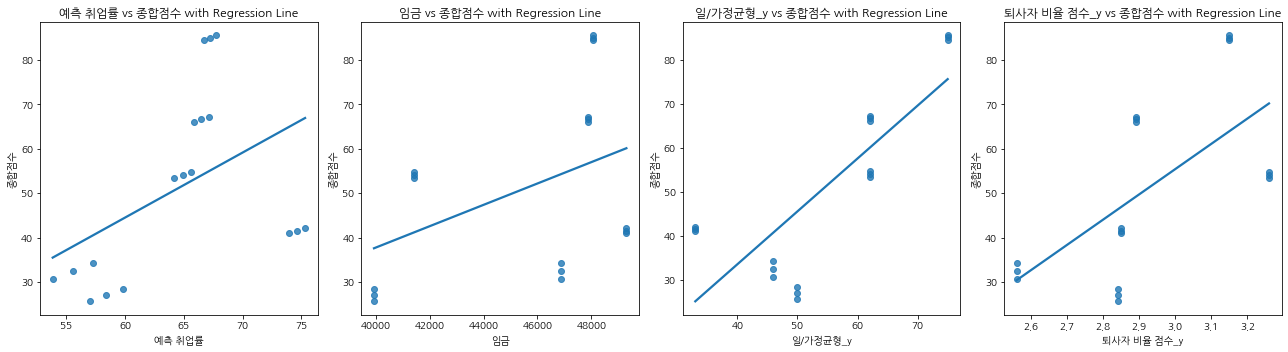

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 준비
data = {
    '예측 취업률': [65.654353, 64.896366, 64.138378, 73.965484, 74.645782, 75.326081, 57.303101, 55.571529,  53.839957, 67.135920, 66.490170, 65.844419, 59.784306, 58.413460, 57.042614, 67.773619, 67.252652, 66.731686],
    '임금': [41412, 41412, 41412, 49300, 49300, 49300, 46873, 46873, 46873, 47865, 47865, 47865, 39932, 39932, 39932, 48045, 48045, 48045],
    '일/가정균형_y': [62, 62, 62, 33, 33, 33, 46, 46, 46, 62, 62, 62, 50, 50, 50, 75, 75, 75],
    '퇴사자 비율 점수_y': [3.26, 3.26, 3.26, 2.85, 2.85, 2.85, 2.56, 2.56, 2.56, 2.89, 2.89, 2.89, 2.84, 2.84, 2.84, 3.15, 3.15, 3.15],
    '종합점수': [54.780520, 54.088613, 53.388701, 40.983277, 41.529799, 42.071429, 34.389967, 32.566020, 30.685368, 67.210608, 66.634522, 66.052897, 28.463983, 27.083999, 25.671800, 85.463234, 85.003220, 84.539681]
}

df = pd.DataFrame(data)

# 산점도와 회귀선 그리기
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# 예측 취업률 vs 종합점수
sns.regplot(x='예측 취업률', y='종합점수', data=df, ax=axes[0], ci=None)
axes[0].set_title('예측 취업률 vs 종합점수 with Regression Line')

# 임금 vs 종합점수
sns.regplot(x='임금', y='종합점수', data=df, ax=axes[1], ci=None)
axes[1].set_title('임금 vs 종합점수 with Regression Line')

# 일/가정균형_y vs 종합점수
sns.regplot(x='일/가정균형_y', y='종합점수', data=df, ax=axes[2], ci=None)
axes[2].set_title('일/가정균형_y vs 종합점수 with Regression Line')

sns.regplot(x='퇴사자 비율 점수_y', y='종합점수', data=df, ax=axes[3], ci=None)
axes[3].set_title('퇴사자 비율 점수_y vs 종합점수 with Regression Line')

plt.tight_layout()
plt.show()


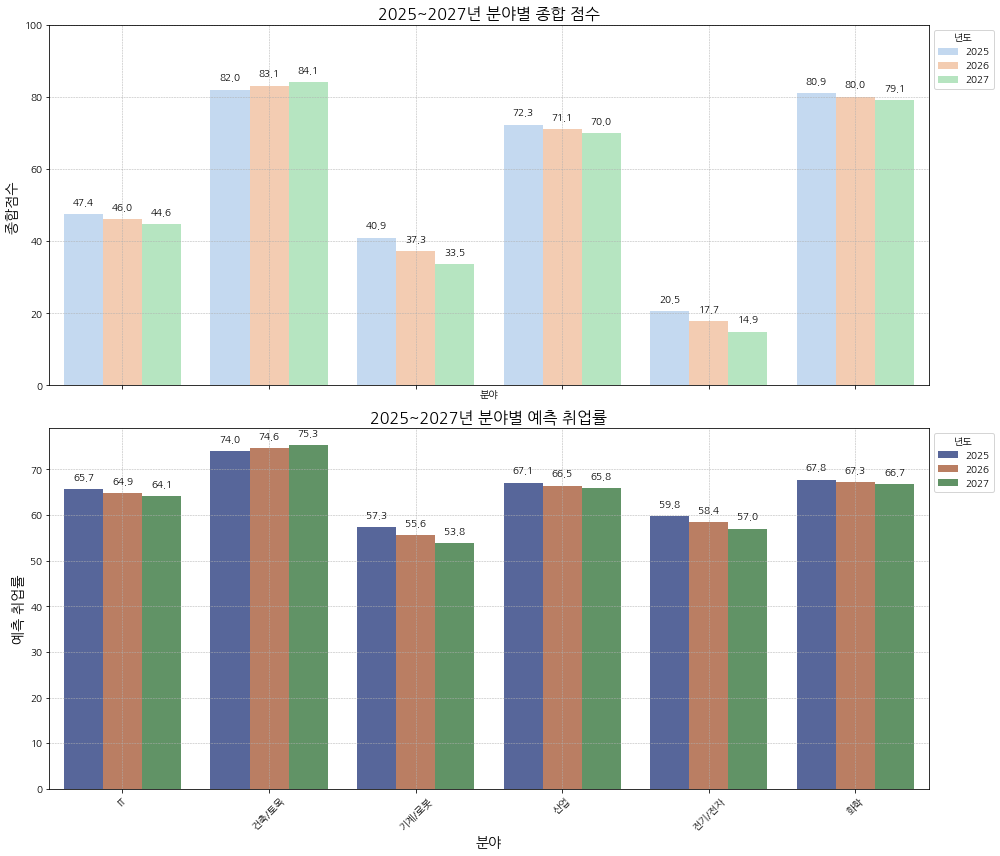

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 사용할 한글 폰트 파일 경로
font_name = fm.FontProperties(fname=font_path).get_name()  # 폰트 이름 추출
plt.rcParams['font.family'] = font_name  # 전체 폰트 설정

# 데이터 예시
# merged_data7 데이터프레임에 종합점수와 조정된 예측 취업률이 포함되어 있다고 가정
# data = {
#     '학과': [...],
#     '년도': [...],
#     '종합점수': [...],
#     '조정된 예측 취업률': [...],
#     '종합점수_z': [...],
# }
# merged_data7 = pd.DataFrame(data)
# merged_data5 = pd.DataFrame(data)

# 그래프 설정
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=True)

# 종합 점수 막대 그래프
barplot1 = sns.barplot(data=merged_data7, x='분야', y='종합점수', hue='년도', palette='pastel', ax=ax1, alpha=0.7)

# 막대의 위치와 높이를 가져와 주석 추가
for p in barplot1.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    year = merged_data7.loc[merged_data7['종합점수'] == y, '년도'].values[0]
    ax1.annotate(
        f'{y:.1f}',  # 주석 내용 (소수점 3자리까지 표시)
        (x, y),  # 주석을 추가할 위치
        textcoords="offset points",  # 주석 위치 조정
        xytext=(0, 10),  # 주석 위치 (y축 방향으로 10포인트 위)
        ha='center',  # 수평 정렬 (중앙)
        fontsize=10,  # 폰트 크기
        color='black'  # 폰트 색상
    )

ax1.set_ylabel('종합점수 ', fontsize=14)
ax1.set_title('2025~2027년 분야별 종합 점수', fontsize=16)
ax1.legend(title='년도', loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_yscale('linear')  # 선형 스케일
ax1.grid(True, linestyle='--', linewidth=0.5)
ax1.set_ylim(0,100)
# 조정된 예측 취업률 막대 그래프
barplot2 = sns.barplot(data=merged_data5, x='분야', y='예측 취업률', hue='년도', palette='dark', ax=ax2, alpha=0.7)

# 막대의 위치와 높이를 가져와 주석 추가
for p in barplot2.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    year = merged_data5.loc[merged_data5['예측 취업률'] == y, '년도'].values[0]
    ax2.annotate(
        f'{y:.1f}',  # 주석 내용 (소수점 1자리까지 표시)
        (x, y),  # 주석을 추가할 위치
        textcoords="offset points",  # 주석 위치 조정
        xytext=(0, 10),  # 주석 위치 (y축 방향으로 10포인트 위)
        ha='center',  # 수평 정렬 (중앙)
        fontsize=10,  # 폰트 크기
        color='black'  # 폰트 색상
    )

ax2.set_ylabel('예측 취업률', fontsize=14)
ax2.set_title('2025~2027년 분야별 예측 취업률', fontsize=16)
ax2.legend(title='년도', loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_yscale('linear')  # 선형 스케일
ax2.grid(True, linestyle='--', linewidth=0.5)

plt.xlabel('분야', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
!pip uninstall jinja2
!pip install jinja2==3.0.3
